# Kelly Allocation with Bayesian Updating

The [Kelly criterion](http://www.herrold.com/brokerage/kelly.pdf), developed by John L. Kelly Jr. at Bell Labs, is an optimal sizing of bets, given an initial pool of wealth, to maximize the doubling rate of wealth in a repeated bets scenario. This has been applied to various games, including horse racing.

However, the major difficulty in applying the criterion is that it assumes that the true probabilities of an event occurring, say for instance, a horse winning a race, is known to the bettor. In reality, these probabilities *have to be estimated by the bettor*. The criterion is sensitive to the estimated probabilities, and since the criterion maximizes the wealth doubling exponent, mistakes made in the estimated probabilities can easily ruin the bettor over time.

For concreteness, we cast the problem to the specific problem of betting on horses at a race track. In order to estimate the probabilities, we cast the problem as a case of Bayesian updating.

In [1]:
import logging
import sys
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import dirichlet
from IPython.display import HTML, display
from core.log import create_logger
from core.simulate import plot_wealth, simulate
from core.util import cgr

logger = create_logger()

# Bayesian Updating in Horse racing

### Simulation

We will simulate a classic horse racing scenario to compare the performance of a Bayesian updating portfolio versus the optimal portfolio, the latter which the bettor knows the probability of each horse's win rate.

Both portfolios will start with an initial wealth pool, the default example being $1.

In this simulator, given $k$ horses, each horse $i$ has a probability of winning the race, $p(i)$. The sum of all these probabilities $p(i)$, $i=1, 2, \cdots, k$ is equal to $1$. This case is no longer equivalent to the classic Beta-Bernoulli scenario as studied in introductory multiarm bandit literature, due to the dependency between the probabilities. Instead, the conjugate prior in this scenario is the Dirichlet distribution.

Horses have odds associated with each of them, determining the payout if a bet is place on the horse and the horse wins. For simplicity, we assume that the probabilities and odds remain the same from race to race, although this is not true in real-life parimutuel betting scenarios.

According to the Kelly criterion, a bet is only placed if the probability and the odd exceeds a certain threshold in a sub-fair odds scenario. Essentially, computation of the Kelly criterion under this scenario results in a water-filling algorithm (see Chapter 6 of Elements of Information Theory, 2nd ed.).

Note that we essentially allocate our portfolio using a **Bayesian updating** mechanism: estimate the probabilities $p(i)$, for all $i$. Based on this, we compute the Kelly allocation to place our bets.

A burn-in period is required to get a reasonably good estimate of the probabilities before betting begins. Typically about 100 trials are required, but this is subject to more investigation. A final compound growth rate (CGR) over the total number of races the bettor has participated is computed. A plot of the growth of the wealth of the bettor under the Bayesian updating portfolio against the optimal portfolio, i.e., where the bettor has knowledge of the exact winning probabilities, will be plotted.


### Parameters of the simulation

We will run the simulation over a set number of horse races. The parameters are
1. `num_races`: number of races the simulation will take place over,
1. `probabilities`: the true probabilities of each horse winning each race (note that the probabilities sum to 1), and
1. `odds`: the payout for each horse should it win the race.
1. `initial_wealth`: the initial wealth gamblers start off with (default: 1)

There is a `burn_in_period` for the Bayesian updating portfolio, since some of races will be required to get a good enough estimate of each horse's probability of winning a race.

In [2]:
# Set simulation parameters
num_races = 2000

probabilities = np.array([0.5, 0.1])
probabilities = np.append(probabilities, 1 - np.sum(probabilities))
odds = np.array([1.3, 7.0, 3.0])

initial_wealth = 1
burn_in_period = 100

In [3]:
bayesian_portfolio_history, optimal_portfolio_history, bayesian_portfolio, optimal_portfolio = simulate(
    initial_wealth,
    probabilities,
    odds,
    num_races,
    burn_in_period,
    logger
)

2019-08-24 00:58:13,247 - root - INFO - Race: 1
2019-08-24 00:58:13,260 - root - INFO - Bayesian updating Kelly exponent : 0.0227
2019-08-24 00:58:13,261 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:13,265 - root - INFO - Horse 1 wins
2019-08-24 00:58:13,265 - root - INFO - Race: 2
2019-08-24 00:58:13,272 - root - INFO - Bayesian updating Kelly exponent : 1.7771
2019-08-24 00:58:13,273 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:13,274 - root - INFO - Horse 0 wins
2019-08-24 00:58:13,275 - root - INFO - Race: 3
2019-08-24 00:58:13,282 - root - INFO - Bayesian updating Kelly exponent : 0.5374
2019-08-24 00:58:13,282 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:13,283 - root - INFO - Horse 0 wins
2019-08-24 00:58:13,284 - root - INFO - Race: 4
2019-08-24 00:58:13,290 - root - INFO - Bayesian updating Kelly exponent : 0.2094
2019-08-24 00:58:13,291 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:13,292 - root - 

2019-08-24 00:58:13,582 - root - INFO - Bayesian updating Kelly exponent : 0.0785
2019-08-24 00:58:13,583 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:13,584 - root - INFO - Horse 1 wins
2019-08-24 00:58:13,585 - root - INFO - Race: 34
2019-08-24 00:58:13,594 - root - INFO - Bayesian updating Kelly exponent : 0.0163
2019-08-24 00:58:13,595 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:13,596 - root - INFO - Horse 2 wins
2019-08-24 00:58:13,597 - root - INFO - Race: 35
2019-08-24 00:58:13,602 - root - INFO - Bayesian updating Kelly exponent : 0.0220
2019-08-24 00:58:13,604 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:13,605 - root - INFO - Horse 2 wins
2019-08-24 00:58:13,606 - root - INFO - Race: 36
2019-08-24 00:58:13,611 - root - INFO - Bayesian updating Kelly exponent : 0.0014
2019-08-24 00:58:13,612 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:13,613 - root - INFO - Horse 2 wins
2019-08-24 00:58:13,614 -

2019-08-24 00:58:13,840 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:13,841 - root - INFO - Horse 0 wins
2019-08-24 00:58:13,842 - root - INFO - Race: 66
2019-08-24 00:58:13,846 - root - INFO - Bayesian updating Kelly exponent : 0.0285
2019-08-24 00:58:13,847 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:13,848 - root - INFO - Horse 2 wins
2019-08-24 00:58:13,849 - root - INFO - Race: 67
2019-08-24 00:58:13,854 - root - INFO - Bayesian updating Kelly exponent : 0.0181
2019-08-24 00:58:13,855 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:13,856 - root - INFO - Horse 0 wins
2019-08-24 00:58:13,857 - root - INFO - Race: 68
2019-08-24 00:58:13,862 - root - INFO - Bayesian updating Kelly exponent : 0.1472
2019-08-24 00:58:13,863 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:13,865 - root - INFO - Horse 1 wins
2019-08-24 00:58:13,866 - root - INFO - Race: 69
2019-08-24 00:58:13,873 - root - INFO - Bayesian updating 

2019-08-24 00:58:14,107 - root - INFO - Horse 0 wins
2019-08-24 00:58:14,108 - root - INFO - Race: 98
2019-08-24 00:58:14,112 - root - INFO - Bayesian updating Kelly exponent : 0.0471
2019-08-24 00:58:14,120 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:14,122 - root - INFO - Horse 1 wins
2019-08-24 00:58:14,122 - root - INFO - Race: 99
2019-08-24 00:58:14,126 - root - INFO - Bayesian updating Kelly exponent : 0.0195
2019-08-24 00:58:14,127 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:14,128 - root - INFO - Horse 0 wins
2019-08-24 00:58:14,128 - root - INFO - Race: 100
2019-08-24 00:58:14,132 - root - INFO - Bayesian updating Kelly exponent : 0.0338
2019-08-24 00:58:14,133 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:14,135 - root - INFO - Horse 0 wins
2019-08-24 00:58:14,136 - root - INFO - Race: 101
2019-08-24 00:58:14,140 - root - INFO - Bayesian updating Kelly exponent : 0.0081
2019-08-24 00:58:14,141 - root - INFO - Optima

2019-08-24 00:58:14,296 - root - INFO - Horse 0 wins
2019-08-24 00:58:14,298 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:14,299 - root - INFO - Allocation: [8.56599075e-01 0.00000000e+00 1.66962968e-04 1.43233962e-01]
2019-08-24 00:58:14,300 - root - INFO - Safe wealth: 1.69
2019-08-24 00:58:14,301 - root - INFO - Amount won: 0.00
2019-08-24 00:58:14,302 - root - INFO - Net wealth change: -14.34%
2019-08-24 00:58:14,303 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:14,305 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:14,306 - root - INFO - Safe wealth: 1.81
2019-08-24 00:58:14,307 - root - INFO - Amount won: 0.00
2019-08-24 00:58:14,308 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:14,309 - root - INFO - Race: 110
2019-08-24 00:58:14,313 - root - INFO - Bayesian updating Kelly exponent : 0.0105
2019-08-24 00:58:14,314 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24

2019-08-24 00:58:14,523 - root - INFO - Amount won: 0.41
2019-08-24 00:58:14,524 - root - INFO - Net wealth change: 27.32%
2019-08-24 00:58:14,525 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:14,526 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:14,527 - root - INFO - Safe wealth: 1.04
2019-08-24 00:58:14,527 - root - INFO - Amount won: 0.35
2019-08-24 00:58:14,529 - root - INFO - Net wealth change: 19.95%
2019-08-24 00:58:14,530 - root - INFO - Race: 118
2019-08-24 00:58:14,537 - root - INFO - Bayesian updating Kelly exponent : 0.0804
2019-08-24 00:58:14,539 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:14,540 - root - INFO - Horse 0 wins
2019-08-24 00:58:14,541 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:14,542 - root - INFO - Allocation: [0.7389285  0.         0.01289721 0.24817429]
2019-08-24 00:58:14,543 - root - INFO - Safe wealth: 0.95
2019-08-24 00:58:14,545 - r

2019-08-24 00:58:14,678 - root - INFO - Amount won: 0.00
2019-08-24 00:58:14,679 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:14,680 - root - INFO - Race: 126
2019-08-24 00:58:14,684 - root - INFO - Bayesian updating Kelly exponent : 0.0750
2019-08-24 00:58:14,685 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:14,687 - root - INFO - Horse 1 wins
2019-08-24 00:58:14,688 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:14,689 - root - INFO - Allocation: [7.64852072e-01 0.00000000e+00 2.75821033e-16 2.35147928e-01]
2019-08-24 00:58:14,689 - root - INFO - Safe wealth: 0.65
2019-08-24 00:58:14,690 - root - INFO - Amount won: 0.00
2019-08-24 00:58:14,691 - root - INFO - Net wealth change: -23.51%
2019-08-24 00:58:14,692 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:14,693 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:14,694 - root - INFO - Safe wealth: 1.27
2019-08-24

2019-08-24 00:58:14,892 - root - INFO - Horse 0 wins
2019-08-24 00:58:14,893 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:14,894 - root - INFO - Allocation: [0.90820278 0.         0.         0.09179722]
2019-08-24 00:58:14,895 - root - INFO - Safe wealth: 0.72
2019-08-24 00:58:14,895 - root - INFO - Amount won: 0.00
2019-08-24 00:58:14,898 - root - INFO - Net wealth change: -9.18%
2019-08-24 00:58:14,899 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:14,900 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:14,902 - root - INFO - Safe wealth: 1.73
2019-08-24 00:58:14,903 - root - INFO - Amount won: 0.00
2019-08-24 00:58:14,904 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:14,905 - root - INFO - Race: 135
2019-08-24 00:58:14,911 - root - INFO - Bayesian updating Kelly exponent : 0.0247
2019-08-24 00:58:14,912 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:14,913 - r

2019-08-24 00:58:15,062 - root - INFO - Amount won: 0.00
2019-08-24 00:58:15,063 - root - INFO - Net wealth change: -15.39%
2019-08-24 00:58:15,064 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:15,065 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:15,066 - root - INFO - Safe wealth: 1.33
2019-08-24 00:58:15,067 - root - INFO - Amount won: 0.00
2019-08-24 00:58:15,069 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:15,070 - root - INFO - Race: 143
2019-08-24 00:58:15,076 - root - INFO - Bayesian updating Kelly exponent : 0.0340
2019-08-24 00:58:15,077 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:15,078 - root - INFO - Horse 2 wins
2019-08-24 00:58:15,078 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:15,080 - root - INFO - Allocation: [8.37196001e-01 1.66425033e-17 4.04442637e-03 1.58759572e-01]
2019-08-24 00:58:15,081 - root - INFO - Safe wealth: 0.37
2019-08-24

2019-08-24 00:58:15,274 - root - INFO - Amount won: 0.80
2019-08-24 00:58:15,275 - root - INFO - Net wealth change: 19.95%
2019-08-24 00:58:15,275 - root - INFO - Race: 151
2019-08-24 00:58:15,279 - root - INFO - Bayesian updating Kelly exponent : 0.0354
2019-08-24 00:58:15,280 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:15,281 - root - INFO - Horse 2 wins
2019-08-24 00:58:15,281 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:15,283 - root - INFO - Allocation: [8.36454453e-01 5.16080234e-17 2.43432625e-03 1.61111220e-01]
2019-08-24 00:58:15,284 - root - INFO - Safe wealth: 0.52
2019-08-24 00:58:15,286 - root - INFO - Amount won: 0.30
2019-08-24 00:58:15,287 - root - INFO - Net wealth change: 31.98%
2019-08-24 00:58:15,289 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:15,290 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:15,291 - root - INFO - Safe wealth: 2.89
2019-08-24 

2019-08-24 00:58:15,469 - root - INFO - Horse 0 wins
2019-08-24 00:58:15,470 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:15,471 - root - INFO - Allocation: [8.42846755e-01 9.95297594e-17 0.00000000e+00 1.57153245e-01]
2019-08-24 00:58:15,472 - root - INFO - Safe wealth: 0.31
2019-08-24 00:58:15,473 - root - INFO - Amount won: 0.00
2019-08-24 00:58:15,474 - root - INFO - Net wealth change: -15.72%
2019-08-24 00:58:15,475 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:15,476 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:15,477 - root - INFO - Safe wealth: 2.21
2019-08-24 00:58:15,478 - root - INFO - Amount won: 0.00
2019-08-24 00:58:15,479 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:15,481 - root - INFO - Race: 160
2019-08-24 00:58:15,485 - root - INFO - Bayesian updating Kelly exponent : 0.0026
2019-08-24 00:58:15,487 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24

2019-08-24 00:58:15,630 - root - INFO - Net wealth change: 3.97%
2019-08-24 00:58:15,631 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:15,632 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:15,633 - root - INFO - Safe wealth: 2.26
2019-08-24 00:58:15,635 - root - INFO - Amount won: 0.75
2019-08-24 00:58:15,636 - root - INFO - Net wealth change: 19.95%
2019-08-24 00:58:15,637 - root - INFO - Race: 168
2019-08-24 00:58:15,644 - root - INFO - Bayesian updating Kelly exponent : 0.0174
2019-08-24 00:58:15,645 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:15,647 - root - INFO - Horse 0 wins
2019-08-24 00:58:15,648 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:15,649 - root - INFO - Allocation: [0.88842312 0.         0.         0.11157688]
2019-08-24 00:58:15,650 - root - INFO - Safe wealth: 0.29
2019-08-24 00:58:15,651 - root - INFO - Amount won: 0.00
2019-08-24 00:58:15,652 - ro

2019-08-24 00:58:15,825 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:15,826 - root - INFO - Race: 176
2019-08-24 00:58:15,831 - root - INFO - Bayesian updating Kelly exponent : 0.0495
2019-08-24 00:58:15,832 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:15,833 - root - INFO - Horse 2 wins
2019-08-24 00:58:15,834 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:15,835 - root - INFO - Allocation: [8.09930458e-01 0.00000000e+00 1.92771146e-16 1.90069542e-01]
2019-08-24 00:58:15,836 - root - INFO - Safe wealth: 0.37
2019-08-24 00:58:15,837 - root - INFO - Amount won: 0.26
2019-08-24 00:58:15,838 - root - INFO - Net wealth change: 38.01%
2019-08-24 00:58:15,839 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:15,840 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:15,841 - root - INFO - Safe wealth: 3.68
2019-08-24 00:58:15,842 - root - INFO - Amount won: 1.22
2019-08-24 

2019-08-24 00:58:15,984 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:15,985 - root - INFO - Allocation: [8.18295030e-01 3.90312782e-18 2.84060969e-17 1.81704970e-01]
2019-08-24 00:58:15,986 - root - INFO - Safe wealth: 0.52
2019-08-24 00:58:15,988 - root - INFO - Amount won: 0.35
2019-08-24 00:58:15,989 - root - INFO - Net wealth change: 36.34%
2019-08-24 00:58:15,989 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:15,990 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:15,991 - root - INFO - Safe wealth: 5.00
2019-08-24 00:58:15,992 - root - INFO - Amount won: 1.66
2019-08-24 00:58:15,993 - root - INFO - Net wealth change: 19.95%
2019-08-24 00:58:15,993 - root - INFO - Race: 185
2019-08-24 00:58:15,997 - root - INFO - Bayesian updating Kelly exponent : 0.0397
2019-08-24 00:58:15,998 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:16,000 - root - INFO - Horse 0 wins
2019-08-24 

2019-08-24 00:58:16,173 - root - INFO - Net wealth change: 17.47%
2019-08-24 00:58:16,174 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:16,175 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:16,176 - root - INFO - Safe wealth: 3.83
2019-08-24 00:58:16,177 - root - INFO - Amount won: 1.27
2019-08-24 00:58:16,179 - root - INFO - Net wealth change: 19.95%
2019-08-24 00:58:16,180 - root - INFO - Race: 193
2019-08-24 00:58:16,185 - root - INFO - Bayesian updating Kelly exponent : 0.0398
2019-08-24 00:58:16,186 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:16,187 - root - INFO - Horse 2 wins
2019-08-24 00:58:16,188 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:16,190 - root - INFO - Allocation: [8.30150371e-01 0.00000000e+00 1.76724954e-17 1.69849629e-01]
2019-08-24 00:58:16,191 - root - INFO - Safe wealth: 0.44
2019-08-24 00:58:16,192 - root - INFO - Amount won: 0.27
2019-08-24 

2019-08-24 00:58:16,363 - root - INFO - Net wealth change: 19.95%
2019-08-24 00:58:16,364 - root - INFO - Race: 201
2019-08-24 00:58:16,369 - root - INFO - Bayesian updating Kelly exponent : 0.0428
2019-08-24 00:58:16,369 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:16,371 - root - INFO - Horse 0 wins
2019-08-24 00:58:16,371 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:16,374 - root - INFO - Allocation: [8.23589374e-01 4.33680869e-17 2.08166817e-17 1.76410626e-01]
2019-08-24 00:58:16,375 - root - INFO - Safe wealth: 0.49
2019-08-24 00:58:16,376 - root - INFO - Amount won: 0.00
2019-08-24 00:58:16,377 - root - INFO - Net wealth change: -17.64%
2019-08-24 00:58:16,378 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:16,379 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:16,380 - root - INFO - Safe wealth: 6.25
2019-08-24 00:58:16,380 - root - INFO - Amount won: 0.00
2019-08-24

2019-08-24 00:58:16,552 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:16,554 - root - INFO - Allocation: [8.96663850e-01 0.00000000e+00 2.13587828e-17 1.03336150e-01]
2019-08-24 00:58:16,554 - root - INFO - Safe wealth: 1.74
2019-08-24 00:58:16,556 - root - INFO - Amount won: 0.00
2019-08-24 00:58:16,557 - root - INFO - Net wealth change: -10.33%
2019-08-24 00:58:16,558 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:16,559 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:16,560 - root - INFO - Safe wealth: 15.08
2019-08-24 00:58:16,561 - root - INFO - Amount won: 0.00
2019-08-24 00:58:16,562 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:16,563 - root - INFO - Race: 210
2019-08-24 00:58:16,568 - root - INFO - Bayesian updating Kelly exponent : 0.0071
2019-08-24 00:58:16,569 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:16,572 - root - INFO - Horse 0 wins
2019-08-2

2019-08-24 00:58:16,726 - root - INFO - Net wealth change: 41.26%
2019-08-24 00:58:16,728 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:16,729 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:16,730 - root - INFO - Safe wealth: 20.50
2019-08-24 00:58:16,731 - root - INFO - Amount won: 6.82
2019-08-24 00:58:16,732 - root - INFO - Net wealth change: 19.95%
2019-08-24 00:58:16,733 - root - INFO - Race: 218
2019-08-24 00:58:16,736 - root - INFO - Bayesian updating Kelly exponent : 0.0507
2019-08-24 00:58:16,737 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:16,739 - root - INFO - Horse 2 wins
2019-08-24 00:58:16,740 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:16,741 - root - INFO - Allocation: [8.07885247e-01 0.00000000e+00 2.17924637e-17 1.92114753e-01]
2019-08-24 00:58:16,742 - root - INFO - Safe wealth: 2.86
2019-08-24 00:58:16,743 - root - INFO - Amount won: 2.04
2019-08-24

2019-08-24 00:58:16,881 - root - INFO - Amount won: 9.27
2019-08-24 00:58:16,882 - root - INFO - Net wealth change: 19.95%
2019-08-24 00:58:16,882 - root - INFO - Race: 226
2019-08-24 00:58:16,890 - root - INFO - Bayesian updating Kelly exponent : 0.0453
2019-08-24 00:58:16,890 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:16,891 - root - INFO - Horse 1 wins
2019-08-24 00:58:16,892 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:16,894 - root - INFO - Allocation: [8.18596708e-01 6.40763484e-17 0.00000000e+00 1.81403292e-01]
2019-08-24 00:58:16,894 - root - INFO - Safe wealth: 4.34
2019-08-24 00:58:16,895 - root - INFO - Amount won: 0.00
2019-08-24 00:58:16,897 - root - INFO - Net wealth change: -18.14%
2019-08-24 00:58:16,898 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:16,901 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:16,902 - root - INFO - Safe wealth: 33.44
2019-08-2

2019-08-24 00:58:17,091 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:17,094 - root - INFO - Allocation: [9.23142079e-01 0.00000000e+00 5.71916646e-18 7.68579211e-02]
2019-08-24 00:58:17,097 - root - INFO - Safe wealth: 5.16
2019-08-24 00:58:17,097 - root - INFO - Amount won: 0.00
2019-08-24 00:58:17,098 - root - INFO - Net wealth change: -7.69%
2019-08-24 00:58:17,099 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:17,100 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:17,102 - root - INFO - Safe wealth: 34.13
2019-08-24 00:58:17,103 - root - INFO - Amount won: 0.00
2019-08-24 00:58:17,104 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:17,105 - root - INFO - Race: 235
2019-08-24 00:58:17,110 - root - INFO - Bayesian updating Kelly exponent : 0.0003
2019-08-24 00:58:17,111 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:17,112 - root - INFO - Horse 2 wins
2019-08-24

2019-08-24 00:58:17,272 - root - INFO - Net wealth change: -14.99%
2019-08-24 00:58:17,274 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:17,275 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:17,276 - root - INFO - Safe wealth: 34.83
2019-08-24 00:58:17,277 - root - INFO - Amount won: 0.00
2019-08-24 00:58:17,278 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:17,279 - root - INFO - Race: 243
2019-08-24 00:58:17,283 - root - INFO - Bayesian updating Kelly exponent : 0.0326
2019-08-24 00:58:17,284 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:17,285 - root - INFO - Horse 2 wins
2019-08-24 00:58:17,286 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:17,288 - root - INFO - Allocation: [8.46465531e-01 8.55435514e-17 1.67509236e-17 1.53534469e-01]
2019-08-24 00:58:17,289 - root - INFO - Safe wealth: 3.42
2019-08-24 00:58:17,290 - root - INFO - Amount won: 1.86
2019-08-2

2019-08-24 00:58:17,440 - root - INFO - Net wealth change: 19.95%
2019-08-24 00:58:17,442 - root - INFO - Race: 251
2019-08-24 00:58:17,446 - root - INFO - Bayesian updating Kelly exponent : 0.0057
2019-08-24 00:58:17,447 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:17,448 - root - INFO - Horse 1 wins
2019-08-24 00:58:17,450 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:17,451 - root - INFO - Allocation: [9.36698912e-01 9.77950360e-17 3.96817995e-17 6.33010884e-02]
2019-08-24 00:58:17,452 - root - INFO - Safe wealth: 2.49
2019-08-24 00:58:17,454 - root - INFO - Amount won: 0.00
2019-08-24 00:58:17,455 - root - INFO - Net wealth change: -6.33%
2019-08-24 00:58:17,456 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:17,457 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:17,458 - root - INFO - Safe wealth: 24.02
2019-08-24 00:58:17,459 - root - INFO - Amount won: 0.00
2019-08-24

2019-08-24 00:58:17,628 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:17,629 - root - INFO - Allocation: [0.82815803 0.         0.         0.17184197]
2019-08-24 00:58:17,630 - root - INFO - Safe wealth: 1.99
2019-08-24 00:58:17,630 - root - INFO - Amount won: 1.24
2019-08-24 00:58:17,631 - root - INFO - Net wealth change: 34.37%
2019-08-24 00:58:17,632 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:17,633 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:17,637 - root - INFO - Safe wealth: 24.51
2019-08-24 00:58:17,638 - root - INFO - Amount won: 8.15
2019-08-24 00:58:17,639 - root - INFO - Net wealth change: 19.95%
2019-08-24 00:58:17,640 - root - INFO - Race: 260
2019-08-24 00:58:17,644 - root - INFO - Bayesian updating Kelly exponent : 0.0670
2019-08-24 00:58:17,645 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:17,647 - root - INFO - Horse 2 wins
2019-08-24 00:58:17,648 - 

2019-08-24 00:58:17,832 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:17,833 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:17,835 - root - INFO - Safe wealth: 25.01
2019-08-24 00:58:17,837 - root - INFO - Amount won: 8.31
2019-08-24 00:58:17,838 - root - INFO - Net wealth change: 19.95%
2019-08-24 00:58:17,839 - root - INFO - Race: 268
2019-08-24 00:58:17,846 - root - INFO - Bayesian updating Kelly exponent : 0.0064
2019-08-24 00:58:17,847 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:17,848 - root - INFO - Horse 0 wins
2019-08-24 00:58:17,849 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:17,850 - root - INFO - Allocation: [9.32842843e-01 0.00000000e+00 7.69783542e-18 6.71571574e-02]
2019-08-24 00:58:17,851 - root - INFO - Safe wealth: 3.71
2019-08-24 00:58:17,853 - root - INFO - Amount won: 0.00
2019-08-24 00:58:17,854 - root - INFO - Net wealth change: -6.72%
2019-08-24

2019-08-24 00:58:18,030 - root - INFO - Race: 276
2019-08-24 00:58:18,040 - root - INFO - Bayesian updating Kelly exponent : 0.0189
2019-08-24 00:58:18,041 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:18,043 - root - INFO - Horse 2 wins
2019-08-24 00:58:18,044 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:18,045 - root - INFO - Allocation: [0.88370232 0.         0.         0.11629768]
2019-08-24 00:58:18,046 - root - INFO - Safe wealth: 1.78
2019-08-24 00:58:18,047 - root - INFO - Amount won: 0.70
2019-08-24 00:58:18,048 - root - INFO - Net wealth change: 23.26%
2019-08-24 00:58:18,050 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:18,051 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:18,053 - root - INFO - Safe wealth: 17.25
2019-08-24 00:58:18,054 - root - INFO - Amount won: 5.73
2019-08-24 00:58:18,055 - root - INFO - Net wealth change: 19.95%
2019-08-24 00:58:18,057 - 

2019-08-24 00:58:18,206 - root - INFO - Allocation: [8.93929691e-01 1.47451495e-17 0.00000000e+00 1.06070309e-01]
2019-08-24 00:58:18,207 - root - INFO - Safe wealth: 2.48
2019-08-24 00:58:18,208 - root - INFO - Amount won: 0.88
2019-08-24 00:58:18,209 - root - INFO - Net wealth change: 21.21%
2019-08-24 00:58:18,210 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:18,212 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:18,213 - root - INFO - Safe wealth: 23.45
2019-08-24 00:58:18,214 - root - INFO - Amount won: 7.79
2019-08-24 00:58:18,215 - root - INFO - Net wealth change: 19.95%
2019-08-24 00:58:18,215 - root - INFO - Race: 285
2019-08-24 00:58:18,220 - root - INFO - Bayesian updating Kelly exponent : 0.0115
2019-08-24 00:58:18,221 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:18,222 - root - INFO - Horse 1 wins
2019-08-24 00:58:18,222 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24

2019-08-24 00:58:18,357 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:18,358 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:18,359 - root - INFO - Safe wealth: 23.93
2019-08-24 00:58:18,360 - root - INFO - Amount won: 7.95
2019-08-24 00:58:18,360 - root - INFO - Net wealth change: 19.95%
2019-08-24 00:58:18,361 - root - INFO - Race: 293
2019-08-24 00:58:18,364 - root - INFO - Bayesian updating Kelly exponent : 0.0138
2019-08-24 00:58:18,365 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:18,367 - root - INFO - Horse 0 wins
2019-08-24 00:58:18,371 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:18,372 - root - INFO - Allocation: [9.00196021e-01 0.00000000e+00 5.98479599e-17 9.98039793e-02]
2019-08-24 00:58:18,373 - root - INFO - Safe wealth: 3.16
2019-08-24 00:58:18,374 - root - INFO - Amount won: 0.00
2019-08-24 00:58:18,375 - root - INFO - Net wealth change: -9.98%
2019-08-24

2019-08-24 00:58:18,508 - root - INFO - Net wealth change: 19.95%
2019-08-24 00:58:18,510 - root - INFO - Race: 301
2019-08-24 00:58:18,513 - root - INFO - Bayesian updating Kelly exponent : 0.0271
2019-08-24 00:58:18,513 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:18,515 - root - INFO - Horse 2 wins
2019-08-24 00:58:18,515 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:18,516 - root - INFO - Allocation: [0.86008927 0.         0.         0.13991073]
2019-08-24 00:58:18,517 - root - INFO - Safe wealth: 6.34
2019-08-24 00:58:18,518 - root - INFO - Amount won: 3.09
2019-08-24 00:58:18,518 - root - INFO - Net wealth change: 27.98%
2019-08-24 00:58:18,519 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:18,520 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:18,521 - root - INFO - Safe wealth: 52.00
2019-08-24 00:58:18,522 - root - INFO - Amount won: 17.29
2019-08-24 00:58:18,523 -

2019-08-24 00:58:18,681 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:18,682 - root - INFO - Allocation: [0.86494461 0.         0.         0.13505539]
2019-08-24 00:58:18,682 - root - INFO - Safe wealth: 12.33
2019-08-24 00:58:18,683 - root - INFO - Amount won: 5.78
2019-08-24 00:58:18,684 - root - INFO - Net wealth change: 27.01%
2019-08-24 00:58:18,685 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:18,687 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:18,688 - root - INFO - Safe wealth: 94.21
2019-08-24 00:58:18,690 - root - INFO - Amount won: 31.31
2019-08-24 00:58:18,692 - root - INFO - Net wealth change: 19.95%
2019-08-24 00:58:18,693 - root - INFO - Race: 310
2019-08-24 00:58:18,696 - root - INFO - Bayesian updating Kelly exponent : 0.0388
2019-08-24 00:58:18,697 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:18,698 - root - INFO - Horse 2 wins
2019-08-24 00:58:18,699 

2019-08-24 00:58:18,847 - root - INFO - Net wealth change: -14.97%
2019-08-24 00:58:18,849 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:18,850 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:18,851 - root - INFO - Safe wealth: 170.68
2019-08-24 00:58:18,852 - root - INFO - Amount won: 0.00
2019-08-24 00:58:18,854 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:18,855 - root - INFO - Race: 318
2019-08-24 00:58:18,862 - root - INFO - Bayesian updating Kelly exponent : 0.0471
2019-08-24 00:58:18,863 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:18,864 - root - INFO - Horse 2 wins
2019-08-24 00:58:18,865 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:18,866 - root - INFO - Allocation: [8.14932571e-01 0.00000000e+00 1.64798730e-17 1.85067429e-01]
2019-08-24 00:58:18,867 - root - INFO - Safe wealth: 21.56
2019-08-24 00:58:18,867 - root - INFO - Amount won: 14.69
2019-0

2019-08-24 00:58:19,032 - root - INFO - Amount won: 0.00
2019-08-24 00:58:19,033 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:19,034 - root - INFO - Race: 326
2019-08-24 00:58:19,037 - root - INFO - Bayesian updating Kelly exponent : 0.0260
2019-08-24 00:58:19,038 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:19,040 - root - INFO - Horse 0 wins
2019-08-24 00:58:19,041 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:19,042 - root - INFO - Allocation: [8.63002797e-01 0.00000000e+00 2.14238349e-16 1.36997203e-01]
2019-08-24 00:58:19,043 - root - INFO - Safe wealth: 15.14
2019-08-24 00:58:19,045 - root - INFO - Amount won: 0.00
2019-08-24 00:58:19,046 - root - INFO - Net wealth change: -13.70%
2019-08-24 00:58:19,047 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:19,048 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:19,049 - root - INFO - Safe wealth: 117.69
2019-08

2019-08-24 00:58:19,195 - root - INFO - Horse 0 wins
2019-08-24 00:58:19,196 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:19,196 - root - INFO - Allocation: [7.98723347e-01 7.80625564e-17 0.00000000e+00 2.01276653e-01]
2019-08-24 00:58:19,197 - root - INFO - Safe wealth: 8.38
2019-08-24 00:58:19,198 - root - INFO - Amount won: 0.00
2019-08-24 00:58:19,198 - root - INFO - Net wealth change: -20.13%
2019-08-24 00:58:19,199 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:19,200 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:19,201 - root - INFO - Safe wealth: 90.14
2019-08-24 00:58:19,202 - root - INFO - Amount won: 0.00
2019-08-24 00:58:19,203 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:19,205 - root - INFO - Race: 335
2019-08-24 00:58:19,211 - root - INFO - Bayesian updating Kelly exponent : 0.0367
2019-08-24 00:58:19,211 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-2

2019-08-24 00:58:19,347 - root - INFO - Amount won: 0.00
2019-08-24 00:58:19,348 - root - INFO - Net wealth change: -9.98%
2019-08-24 00:58:19,349 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:19,350 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:19,351 - root - INFO - Safe wealth: 91.99
2019-08-24 00:58:19,351 - root - INFO - Amount won: 0.00
2019-08-24 00:58:19,353 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:19,353 - root - INFO - Race: 343
2019-08-24 00:58:19,357 - root - INFO - Bayesian updating Kelly exponent : 0.0136
2019-08-24 00:58:19,359 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:19,361 - root - INFO - Horse 0 wins
2019-08-24 00:58:19,362 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:19,364 - root - INFO - Allocation: [9.02093829e-01 1.57209315e-18 0.00000000e+00 9.79061707e-02]
2019-08-24 00:58:19,364 - root - INFO - Safe wealth: 8.94
2019-08-24

2019-08-24 00:58:19,520 - root - INFO - Safe wealth: 70.46
2019-08-24 00:58:19,521 - root - INFO - Amount won: 0.00
2019-08-24 00:58:19,522 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:19,523 - root - INFO - Race: 351
2019-08-24 00:58:19,529 - root - INFO - Bayesian updating Kelly exponent : 0.0099
2019-08-24 00:58:19,530 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:19,532 - root - INFO - Horse 2 wins
2019-08-24 00:58:19,533 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:19,534 - root - INFO - Allocation: [9.15989216e-01 0.00000000e+00 1.30104261e-16 8.40107843e-02]
2019-08-24 00:58:19,535 - root - INFO - Safe wealth: 6.31
2019-08-24 00:58:19,535 - root - INFO - Amount won: 1.74
2019-08-24 00:58:19,536 - root - INFO - Net wealth change: 16.80%
2019-08-24 00:58:19,537 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:19,538 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24

2019-08-24 00:58:19,693 - root - INFO - Horse 0 wins
2019-08-24 00:58:19,694 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:19,696 - root - INFO - Allocation: [8.34483907e-01 2.71050543e-17 0.00000000e+00 1.65516093e-01]
2019-08-24 00:58:19,696 - root - INFO - Safe wealth: 4.45
2019-08-24 00:58:19,697 - root - INFO - Amount won: 0.00
2019-08-24 00:58:19,699 - root - INFO - Net wealth change: -16.55%
2019-08-24 00:58:19,699 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:19,700 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:19,701 - root - INFO - Safe wealth: 64.73
2019-08-24 00:58:19,702 - root - INFO - Amount won: 0.00
2019-08-24 00:58:19,703 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:19,703 - root - INFO - Race: 360
2019-08-24 00:58:19,707 - root - INFO - Bayesian updating Kelly exponent : 0.0165
2019-08-24 00:58:19,710 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-2

2019-08-24 00:58:19,832 - root - INFO - Net wealth change: 18.12%
2019-08-24 00:58:19,833 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:19,834 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:19,834 - root - INFO - Safe wealth: 27.93
2019-08-24 00:58:19,836 - root - INFO - Amount won: 9.28
2019-08-24 00:58:19,838 - root - INFO - Net wealth change: 19.95%
2019-08-24 00:58:19,840 - root - INFO - Race: 368
2019-08-24 00:58:19,845 - root - INFO - Bayesian updating Kelly exponent : 0.0346
2019-08-24 00:58:19,846 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:19,848 - root - INFO - Horse 0 wins
2019-08-24 00:58:19,849 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:19,849 - root - INFO - Allocation: [8.41894477e-01 0.00000000e+00 3.31223764e-17 1.58105523e-01]
2019-08-24 00:58:19,850 - root - INFO - Safe wealth: 1.83
2019-08-24 00:58:19,851 - root - INFO - Amount won: 0.00
2019-08-24

2019-08-24 00:58:20,014 - root - INFO - Amount won: 0.00
2019-08-24 00:58:20,017 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:20,019 - root - INFO - Race: 376
2019-08-24 00:58:20,024 - root - INFO - Bayesian updating Kelly exponent : 0.0133
2019-08-24 00:58:20,025 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:20,026 - root - INFO - Horse 0 wins
2019-08-24 00:58:20,027 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:20,028 - root - INFO - Allocation: [9.02685949e-01 2.74953671e-16 0.00000000e+00 9.73140506e-02]
2019-08-24 00:58:20,029 - root - INFO - Safe wealth: 0.83
2019-08-24 00:58:20,029 - root - INFO - Amount won: 0.00
2019-08-24 00:58:20,030 - root - INFO - Net wealth change: -9.73%
2019-08-24 00:58:20,031 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:20,032 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:20,033 - root - INFO - Safe wealth: 19.26
2019-08-24

2019-08-24 00:58:20,202 - root - INFO - Horse 0 wins
2019-08-24 00:58:20,203 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:20,204 - root - INFO - Allocation: [0.92654758 0.         0.         0.07345242]
2019-08-24 00:58:20,205 - root - INFO - Safe wealth: 1.17
2019-08-24 00:58:20,206 - root - INFO - Amount won: 0.00
2019-08-24 00:58:20,207 - root - INFO - Net wealth change: -7.35%
2019-08-24 00:58:20,208 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:20,211 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:20,212 - root - INFO - Safe wealth: 26.18
2019-08-24 00:58:20,213 - root - INFO - Amount won: 0.00
2019-08-24 00:58:20,214 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:20,215 - root - INFO - Race: 385
2019-08-24 00:58:20,219 - root - INFO - Bayesian updating Kelly exponent : 0.0103
2019-08-24 00:58:20,220 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:20,221 - 

2019-08-24 00:58:20,359 - root - INFO - Net wealth change: 18.19%
2019-08-24 00:58:20,360 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:20,361 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:20,362 - root - INFO - Safe wealth: 26.72
2019-08-24 00:58:20,363 - root - INFO - Amount won: 8.88
2019-08-24 00:58:20,364 - root - INFO - Net wealth change: 19.95%
2019-08-24 00:58:20,364 - root - INFO - Race: 393
2019-08-24 00:58:20,369 - root - INFO - Bayesian updating Kelly exponent : 0.0246
2019-08-24 00:58:20,370 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:20,371 - root - INFO - Horse 0 wins
2019-08-24 00:58:20,373 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:20,374 - root - INFO - Allocation: [8.66607154e-01 0.00000000e+00 1.01481323e-16 1.33392846e-01]
2019-08-24 00:58:20,375 - root - INFO - Safe wealth: 1.52
2019-08-24 00:58:20,375 - root - INFO - Amount won: 0.00
2019-08-24

2019-08-24 00:58:20,522 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:20,523 - root - INFO - Race: 401
2019-08-24 00:58:20,530 - root - INFO - Bayesian updating Kelly exponent : 0.0008
2019-08-24 00:58:20,531 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:20,532 - root - INFO - Horse 2 wins
2019-08-24 00:58:20,532 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:20,534 - root - INFO - Allocation: [9.76887231e-01 0.00000000e+00 8.19495819e-05 2.30308192e-02]
2019-08-24 00:58:20,534 - root - INFO - Safe wealth: 1.49
2019-08-24 00:58:20,536 - root - INFO - Amount won: 0.11
2019-08-24 00:58:20,537 - root - INFO - Net wealth change: 4.60%
2019-08-24 00:58:20,538 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:20,539 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:20,540 - root - INFO - Safe wealth: 24.55
2019-08-24 00:58:20,540 - root - INFO - Amount won: 8.16
2019-08-24 

2019-08-24 00:58:20,691 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:20,692 - root - INFO - Allocation: [8.89579260e-01 1.53956708e-17 8.71698547e-17 1.10420740e-01]
2019-08-24 00:58:20,693 - root - INFO - Safe wealth: 2.08
2019-08-24 00:58:20,694 - root - INFO - Amount won: 0.00
2019-08-24 00:58:20,695 - root - INFO - Net wealth change: -11.04%
2019-08-24 00:58:20,696 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:20,697 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:20,698 - root - INFO - Safe wealth: 33.38
2019-08-24 00:58:20,698 - root - INFO - Amount won: 0.00
2019-08-24 00:58:20,699 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:20,700 - root - INFO - Race: 410
2019-08-24 00:58:20,703 - root - INFO - Bayesian updating Kelly exponent : 0.0070
2019-08-24 00:58:20,703 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:20,705 - root - INFO - Horse 0 wins
2019-08-2

2019-08-24 00:58:20,856 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:20,857 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:20,858 - root - INFO - Safe wealth: 25.57
2019-08-24 00:58:20,859 - root - INFO - Amount won: 8.50
2019-08-24 00:58:20,861 - root - INFO - Net wealth change: 19.95%
2019-08-24 00:58:20,862 - root - INFO - Race: 418
2019-08-24 00:58:20,867 - root - INFO - Bayesian updating Kelly exponent : 0.0166
2019-08-24 00:58:20,868 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:20,869 - root - INFO - Horse 0 wins
2019-08-24 00:58:20,872 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:20,875 - root - INFO - Allocation: [8.90894958e-01 1.82145965e-17 0.00000000e+00 1.09105042e-01]
2019-08-24 00:58:20,877 - root - INFO - Safe wealth: 1.85
2019-08-24 00:58:20,878 - root - INFO - Amount won: 0.00
2019-08-24 00:58:20,879 - root - INFO - Net wealth change: -10.91%
2019-08-2

2019-08-24 00:58:21,018 - root - INFO - Race: 426
2019-08-24 00:58:21,027 - root - INFO - Bayesian updating Kelly exponent : 0.0008
2019-08-24 00:58:21,029 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:21,030 - root - INFO - Horse 0 wins
2019-08-24 00:58:21,031 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:21,032 - root - INFO - Allocation: [9.75625102e-01 1.08691268e-16 0.00000000e+00 2.43748979e-02]
2019-08-24 00:58:21,032 - root - INFO - Safe wealth: 1.18
2019-08-24 00:58:21,033 - root - INFO - Amount won: 0.00
2019-08-24 00:58:21,034 - root - INFO - Net wealth change: -2.44%
2019-08-24 00:58:21,035 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:21,036 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:21,036 - root - INFO - Safe wealth: 17.63
2019-08-24 00:58:21,037 - root - INFO - Amount won: 0.00
2019-08-24 00:58:21,038 - root - INFO - Net wealth change: -9.97%
2019-08-24

2019-08-24 00:58:21,185 - root - INFO - Allocation: [9.00584556e-01 0.00000000e+00 4.68375339e-17 9.94154438e-02]
2019-08-24 00:58:21,186 - root - INFO - Safe wealth: 0.73
2019-08-24 00:58:21,187 - root - INFO - Amount won: 0.24
2019-08-24 00:58:21,188 - root - INFO - Net wealth change: 19.88%
2019-08-24 00:58:21,189 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:21,190 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:21,191 - root - INFO - Safe wealth: 10.13
2019-08-24 00:58:21,191 - root - INFO - Amount won: 3.37
2019-08-24 00:58:21,192 - root - INFO - Net wealth change: 19.95%
2019-08-24 00:58:21,193 - root - INFO - Race: 435
2019-08-24 00:58:21,198 - root - INFO - Bayesian updating Kelly exponent : 0.0110
2019-08-24 00:58:21,199 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:21,200 - root - INFO - Horse 1 wins
2019-08-24 00:58:21,201 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24

2019-08-24 00:58:21,347 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:21,348 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:21,349 - root - INFO - Safe wealth: 10.34
2019-08-24 00:58:21,350 - root - INFO - Amount won: 0.00
2019-08-24 00:58:21,350 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:21,351 - root - INFO - Race: 443
2019-08-24 00:58:21,358 - root - INFO - Bayesian updating Kelly exponent : 0.0056
2019-08-24 00:58:21,359 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:21,360 - root - INFO - Horse 2 wins
2019-08-24 00:58:21,361 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:21,364 - root - INFO - Allocation: [9.37005281e-01 0.00000000e+00 2.99239800e-17 6.29947189e-02]
2019-08-24 00:58:21,365 - root - INFO - Safe wealth: 0.71
2019-08-24 00:58:21,366 - root - INFO - Amount won: 0.14
2019-08-24 00:58:21,367 - root - INFO - Net wealth change: 12.60%
2019-08-24

2019-08-24 00:58:21,515 - root - INFO - Race: 451
2019-08-24 00:58:21,520 - root - INFO - Bayesian updating Kelly exponent : 0.0130
2019-08-24 00:58:21,521 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:21,522 - root - INFO - Horse 0 wins
2019-08-24 00:58:21,524 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:21,527 - root - INFO - Allocation: [9.03261875e-01 1.56992475e-16 0.00000000e+00 9.67381252e-02]
2019-08-24 00:58:21,529 - root - INFO - Safe wealth: 0.51
2019-08-24 00:58:21,530 - root - INFO - Amount won: 0.00
2019-08-24 00:58:21,531 - root - INFO - Net wealth change: -9.67%
2019-08-24 00:58:21,532 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:21,533 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:21,534 - root - INFO - Safe wealth: 7.13
2019-08-24 00:58:21,534 - root - INFO - Amount won: 0.00
2019-08-24 00:58:21,535 - root - INFO - Net wealth change: -9.97%
2019-08-24 

2019-08-24 00:58:21,681 - root - INFO - Allocation: [9.12844195e-01 0.00000000e+00 1.41379963e-16 8.71558053e-02]
2019-08-24 00:58:21,682 - root - INFO - Safe wealth: 0.52
2019-08-24 00:58:21,683 - root - INFO - Amount won: 0.15
2019-08-24 00:58:21,684 - root - INFO - Net wealth change: 17.43%
2019-08-24 00:58:21,684 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:21,685 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:21,686 - root - INFO - Safe wealth: 7.28
2019-08-24 00:58:21,686 - root - INFO - Amount won: 2.42
2019-08-24 00:58:21,687 - root - INFO - Net wealth change: 19.95%
2019-08-24 00:58:21,688 - root - INFO - Race: 460
2019-08-24 00:58:21,694 - root - INFO - Bayesian updating Kelly exponent : 0.0145
2019-08-24 00:58:21,695 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:21,696 - root - INFO - Horse 1 wins
2019-08-24 00:58:21,698 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 

2019-08-24 00:58:21,839 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:21,841 - root - INFO - Safe wealth: 9.89
2019-08-24 00:58:21,841 - root - INFO - Amount won: 3.29
2019-08-24 00:58:21,842 - root - INFO - Net wealth change: 19.95%
2019-08-24 00:58:21,843 - root - INFO - Race: 468
2019-08-24 00:58:21,849 - root - INFO - Bayesian updating Kelly exponent : 0.0044
2019-08-24 00:58:21,849 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:21,852 - root - INFO - Horse 2 wins
2019-08-24 00:58:21,852 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:21,854 - root - INFO - Allocation: [9.44310956e-01 1.33140027e-16 0.00000000e+00 5.56890439e-02]
2019-08-24 00:58:21,855 - root - INFO - Safe wealth: 0.88
2019-08-24 00:58:21,857 - root - INFO - Amount won: 0.16
2019-08-24 00:58:21,858 - root - INFO - Net wealth change: 11.14%
2019-08-24 00:58:21,859 - root - INFO - ------- OPTIMAL ----------
2019-08-24 

2019-08-24 00:58:21,998 - root - INFO - Race: 476
2019-08-24 00:58:22,000 - root - INFO - Bayesian updating Kelly exponent : 0.0075
2019-08-24 00:58:22,002 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:22,002 - root - INFO - Horse 0 wins
2019-08-24 00:58:22,003 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:22,007 - root - INFO - Allocation: [9.26930850e-01 5.83300769e-17 4.48859699e-17 7.30691497e-02]
2019-08-24 00:58:22,008 - root - INFO - Safe wealth: 0.91
2019-08-24 00:58:22,009 - root - INFO - Amount won: 0.00
2019-08-24 00:58:22,011 - root - INFO - Net wealth change: -7.31%
2019-08-24 00:58:22,012 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:22,013 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:22,014 - root - INFO - Safe wealth: 16.14
2019-08-24 00:58:22,015 - root - INFO - Amount won: 0.00
2019-08-24 00:58:22,016 - root - INFO - Net wealth change: -9.97%
2019-08-24

2019-08-24 00:58:22,163 - root - INFO - Allocation: [9.04626590e-01 3.04443970e-16 1.38777878e-17 9.53734096e-02]
2019-08-24 00:58:22,164 - root - INFO - Safe wealth: 0.86
2019-08-24 00:58:22,165 - root - INFO - Amount won: 0.00
2019-08-24 00:58:22,166 - root - INFO - Net wealth change: -9.54%
2019-08-24 00:58:22,167 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:22,167 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:22,168 - root - INFO - Safe wealth: 16.47
2019-08-24 00:58:22,169 - root - INFO - Amount won: 0.00
2019-08-24 00:58:22,170 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:22,171 - root - INFO - Race: 485
2019-08-24 00:58:22,176 - root - INFO - Bayesian updating Kelly exponent : 0.0028
2019-08-24 00:58:22,180 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:22,182 - root - INFO - Horse 1 wins
2019-08-24 00:58:22,182 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24

2019-08-24 00:58:22,314 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:22,315 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:22,316 - root - INFO - Safe wealth: 9.47
2019-08-24 00:58:22,317 - root - INFO - Amount won: 0.00
2019-08-24 00:58:22,319 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:22,320 - root - INFO - Race: 493
2019-08-24 00:58:22,330 - root - INFO - Bayesian updating Kelly exponent : 0.0085
2019-08-24 00:58:22,331 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:22,332 - root - INFO - Horse 2 wins
2019-08-24 00:58:22,333 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:22,333 - root - INFO - Allocation: [0.92215107 0.         0.         0.07784893]
2019-08-24 00:58:22,334 - root - INFO - Safe wealth: 0.50
2019-08-24 00:58:22,334 - root - INFO - Amount won: 0.13
2019-08-24 00:58:22,336 - root - INFO - Net wealth change: 15.57%
2019-08-24 00:58:22,336 - r

2019-08-24 00:58:22,479 - root - INFO - Race: 501
2019-08-24 00:58:22,482 - root - INFO - Bayesian updating Kelly exponent : 0.0033
2019-08-24 00:58:22,484 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:22,484 - root - INFO - Horse 0 wins
2019-08-24 00:58:22,485 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:22,486 - root - INFO - Allocation: [9.51387833e-01 0.00000000e+00 1.86482774e-17 4.86121666e-02]
2019-08-24 00:58:22,489 - root - INFO - Safe wealth: 0.48
2019-08-24 00:58:22,490 - root - INFO - Amount won: 0.00
2019-08-24 00:58:22,493 - root - INFO - Net wealth change: -4.86%
2019-08-24 00:58:22,494 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:22,496 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:22,497 - root - INFO - Safe wealth: 8.70
2019-08-24 00:58:22,497 - root - INFO - Amount won: 0.00
2019-08-24 00:58:22,498 - root - INFO - Net wealth change: -9.97%
2019-08-24 

2019-08-24 00:58:22,645 - root - INFO - Allocation: [0.93497835 0.         0.         0.06502165]
2019-08-24 00:58:22,646 - root - INFO - Safe wealth: 1.53
2019-08-24 00:58:22,647 - root - INFO - Amount won: 0.00
2019-08-24 00:58:22,648 - root - INFO - Net wealth change: -6.50%
2019-08-24 00:58:22,649 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:22,650 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:22,652 - root - INFO - Safe wealth: 20.99
2019-08-24 00:58:22,652 - root - INFO - Amount won: 0.00
2019-08-24 00:58:22,653 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:22,654 - root - INFO - Race: 510
2019-08-24 00:58:22,663 - root - INFO - Bayesian updating Kelly exponent : 0.0119
2019-08-24 00:58:22,664 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:22,665 - root - INFO - Horse 0 wins
2019-08-24 00:58:22,666 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:22,668 - 

2019-08-24 00:58:22,818 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:22,819 - root - INFO - Safe wealth: 12.07
2019-08-24 00:58:22,820 - root - INFO - Amount won: 4.01
2019-08-24 00:58:22,821 - root - INFO - Net wealth change: 19.95%
2019-08-24 00:58:22,821 - root - INFO - Race: 518
2019-08-24 00:58:22,828 - root - INFO - Bayesian updating Kelly exponent : 0.0168
2019-08-24 00:58:22,830 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:22,831 - root - INFO - Horse 2 wins
2019-08-24 00:58:22,832 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:22,832 - root - INFO - Allocation: [8.90374021e-01 6.80878964e-17 0.00000000e+00 1.09625979e-01]
2019-08-24 00:58:22,833 - root - INFO - Safe wealth: 1.09
2019-08-24 00:58:22,834 - root - INFO - Amount won: 0.40
2019-08-24 00:58:22,834 - root - INFO - Net wealth change: 21.93%
2019-08-24 00:58:22,835 - root - INFO - ------- OPTIMAL ----------
2019-08-24

2019-08-24 00:58:22,987 - root - INFO - Bayesian updating Kelly exponent : 0.0167
2019-08-24 00:58:22,988 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:22,989 - root - INFO - Horse 0 wins
2019-08-24 00:58:22,992 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:22,994 - root - INFO - Allocation: [8.90682060e-01 8.96093096e-17 0.00000000e+00 1.09317940e-01]
2019-08-24 00:58:22,995 - root - INFO - Safe wealth: 0.72
2019-08-24 00:58:22,997 - root - INFO - Amount won: 0.00
2019-08-24 00:58:22,998 - root - INFO - Net wealth change: -10.93%
2019-08-24 00:58:22,999 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:23,001 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:23,002 - root - INFO - Safe wealth: 8.32
2019-08-24 00:58:23,002 - root - INFO - Amount won: 0.00
2019-08-24 00:58:23,006 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:23,006 - root - INFO - Race: 527
2019-08-24

2019-08-24 00:58:23,172 - root - INFO - Allocation: [0.96561456 0.         0.         0.03438544]
2019-08-24 00:58:23,172 - root - INFO - Safe wealth: 1.20
2019-08-24 00:58:23,174 - root - INFO - Amount won: 0.13
2019-08-24 00:58:23,175 - root - INFO - Net wealth change: 6.88%
2019-08-24 00:58:23,176 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:23,177 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:23,178 - root - INFO - Safe wealth: 15.08
2019-08-24 00:58:23,180 - root - INFO - Amount won: 5.01
2019-08-24 00:58:23,181 - root - INFO - Net wealth change: 19.95%
2019-08-24 00:58:23,182 - root - INFO - Race: 535
2019-08-24 00:58:23,190 - root - INFO - Bayesian updating Kelly exponent : 0.0212
2019-08-24 00:58:23,191 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:23,192 - root - INFO - Horse 0 wins
2019-08-24 00:58:23,193 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:23,194 - r

2019-08-24 00:58:23,338 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:23,339 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:23,341 - root - INFO - Safe wealth: 15.39
2019-08-24 00:58:23,342 - root - INFO - Amount won: 0.00
2019-08-24 00:58:23,343 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:23,345 - root - INFO - Race: 543
2019-08-24 00:58:23,349 - root - INFO - Bayesian updating Kelly exponent : 0.0070
2019-08-24 00:58:23,350 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:23,352 - root - INFO - Horse 1 wins
2019-08-24 00:58:23,353 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:23,358 - root - INFO - Allocation: [9.29588762e-01 3.90312782e-18 3.03576608e-18 7.04112378e-02]
2019-08-24 00:58:23,359 - root - INFO - Safe wealth: 1.01
2019-08-24 00:58:23,360 - root - INFO - Amount won: 0.00
2019-08-24 00:58:23,361 - root - INFO - Net wealth change: -7.04%
2019-08-24

2019-08-24 00:58:23,504 - root - INFO - Race: 551
2019-08-24 00:58:23,506 - root - INFO - Bayesian updating Kelly exponent : 0.0052
2019-08-24 00:58:23,507 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:23,508 - root - INFO - Horse 2 wins
2019-08-24 00:58:23,510 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:23,512 - root - INFO - Allocation: [9.38704968e-01 1.73472348e-18 1.36284213e-16 6.12950321e-02]
2019-08-24 00:58:23,514 - root - INFO - Safe wealth: 1.12
2019-08-24 00:58:23,516 - root - INFO - Amount won: 0.22
2019-08-24 00:58:23,517 - root - INFO - Net wealth change: 12.26%
2019-08-24 00:58:23,518 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:23,518 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:23,519 - root - INFO - Safe wealth: 14.14
2019-08-24 00:58:23,520 - root - INFO - Amount won: 4.70
2019-08-24 00:58:23,520 - root - INFO - Net wealth change: 19.95%
2019-08-24

2019-08-24 00:58:23,693 - root - INFO - Allocation: [0.92753714 0.         0.         0.07246286]
2019-08-24 00:58:23,694 - root - INFO - Safe wealth: 1.10
2019-08-24 00:58:23,695 - root - INFO - Amount won: 0.26
2019-08-24 00:58:23,696 - root - INFO - Net wealth change: 14.49%
2019-08-24 00:58:23,697 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:23,699 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:23,700 - root - INFO - Safe wealth: 14.42
2019-08-24 00:58:23,700 - root - INFO - Amount won: 4.79
2019-08-24 00:58:23,701 - root - INFO - Net wealth change: 19.95%
2019-08-24 00:58:23,702 - root - INFO - Race: 560
2019-08-24 00:58:23,706 - root - INFO - Bayesian updating Kelly exponent : 0.0065
2019-08-24 00:58:23,707 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:23,708 - root - INFO - Horse 2 wins
2019-08-24 00:58:23,708 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:23,710 - 

2019-08-24 00:58:23,869 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:23,871 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:23,871 - root - INFO - Safe wealth: 26.13
2019-08-24 00:58:23,872 - root - INFO - Amount won: 8.69
2019-08-24 00:58:23,873 - root - INFO - Net wealth change: 19.95%
2019-08-24 00:58:23,874 - root - INFO - Race: 568
2019-08-24 00:58:23,882 - root - INFO - Bayesian updating Kelly exponent : 0.0101
2019-08-24 00:58:23,884 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:23,886 - root - INFO - Horse 0 wins
2019-08-24 00:58:23,886 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:23,888 - root - INFO - Allocation: [9.14929146e-01 6.07153217e-18 0.00000000e+00 8.50708538e-02]
2019-08-24 00:58:23,889 - root - INFO - Safe wealth: 1.82
2019-08-24 00:58:23,890 - root - INFO - Amount won: 0.00
2019-08-24 00:58:23,891 - root - INFO - Net wealth change: -8.51%
2019-08-24

2019-08-24 00:58:24,031 - root - INFO - Race: 576
2019-08-24 00:58:24,038 - root - INFO - Bayesian updating Kelly exponent : 0.0099
2019-08-24 00:58:24,039 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:24,041 - root - INFO - Horse 1 wins
2019-08-24 00:58:24,043 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:24,044 - root - INFO - Allocation: [9.02579944e-01 2.62783502e-17 1.03472299e-02 8.70728265e-02]
2019-08-24 00:58:24,045 - root - INFO - Safe wealth: 2.18
2019-08-24 00:58:24,047 - root - INFO - Amount won: 0.17
2019-08-24 00:58:24,048 - root - INFO - Net wealth change: -2.50%
2019-08-24 00:58:24,049 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:24,050 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:24,051 - root - INFO - Safe wealth: 42.62
2019-08-24 00:58:24,052 - root - INFO - Amount won: 0.00
2019-08-24 00:58:24,053 - root - INFO - Net wealth change: -9.97%
2019-08-24

2019-08-24 00:58:24,218 - root - INFO - Allocation: [0.89090495 0.         0.         0.10909505]
2019-08-24 00:58:24,219 - root - INFO - Safe wealth: 2.22
2019-08-24 00:58:24,220 - root - INFO - Amount won: 0.00
2019-08-24 00:58:24,221 - root - INFO - Net wealth change: -10.91%
2019-08-24 00:58:24,222 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:24,224 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:24,225 - root - INFO - Safe wealth: 43.50
2019-08-24 00:58:24,227 - root - INFO - Amount won: 0.00
2019-08-24 00:58:24,230 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:24,230 - root - INFO - Race: 585
2019-08-24 00:58:24,235 - root - INFO - Bayesian updating Kelly exponent : 0.0112
2019-08-24 00:58:24,236 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:24,237 - root - INFO - Horse 0 wins
2019-08-24 00:58:24,238 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:24,239 -

2019-08-24 00:58:24,352 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:24,353 - root - INFO - Safe wealth: 59.14
2019-08-24 00:58:24,354 - root - INFO - Amount won: 0.00
2019-08-24 00:58:24,357 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:24,358 - root - INFO - Race: 593
2019-08-24 00:58:24,364 - root - INFO - Bayesian updating Kelly exponent : 0.0278
2019-08-24 00:58:24,366 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:24,367 - root - INFO - Horse 2 wins
2019-08-24 00:58:24,368 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:24,368 - root - INFO - Allocation: [8.58122291e-01 6.07153217e-17 6.85215773e-17 1.41877709e-01]
2019-08-24 00:58:24,369 - root - INFO - Safe wealth: 2.92
2019-08-24 00:58:24,370 - root - INFO - Amount won: 1.45
2019-08-24 00:58:24,371 - root - INFO - Net wealth change: 28.38%
2019-08-24 00:58:24,371 - root - INFO - ------- OPTIMAL ----------
2019-08-24

2019-08-24 00:58:24,556 - root - INFO - Bayesian updating Kelly exponent : 0.0228
2019-08-24 00:58:24,557 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:24,559 - root - INFO - Horse 2 wins
2019-08-24 00:58:24,560 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:24,561 - root - INFO - Allocation: [8.71961554e-01 0.00000000e+00 1.65340831e-17 1.28038446e-01]
2019-08-24 00:58:24,563 - root - INFO - Safe wealth: 3.45
2019-08-24 00:58:24,564 - root - INFO - Amount won: 1.52
2019-08-24 00:58:24,568 - root - INFO - Net wealth change: 25.61%
2019-08-24 00:58:24,569 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:24,571 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:24,572 - root - INFO - Safe wealth: 72.40
2019-08-24 00:58:24,573 - root - INFO - Amount won: 24.06
2019-08-24 00:58:24,574 - root - INFO - Net wealth change: 19.95%
2019-08-24 00:58:24,575 - root - INFO - Race: 602
2019-08-2

2019-08-24 00:58:24,733 - root - INFO - Safe wealth: 3.99
2019-08-24 00:58:24,734 - root - INFO - Amount won: 0.00
2019-08-24 00:58:24,734 - root - INFO - Net wealth change: -6.15%
2019-08-24 00:58:24,735 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:24,736 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:24,737 - root - INFO - Safe wealth: 73.88
2019-08-24 00:58:24,737 - root - INFO - Amount won: 0.00
2019-08-24 00:58:24,739 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:24,739 - root - INFO - Race: 610
2019-08-24 00:58:24,743 - root - INFO - Bayesian updating Kelly exponent : 0.0002
2019-08-24 00:58:24,744 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:24,745 - root - INFO - Horse 2 wins
2019-08-24 00:58:24,749 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:24,752 - root - INFO - Allocation: [9.87874239e-01 0.00000000e+00 3.20923843e-17 1.21257609e-02]
2019-08-24

2019-08-24 00:58:24,899 - root - INFO - Safe wealth: 100.46
2019-08-24 00:58:24,900 - root - INFO - Amount won: 0.00
2019-08-24 00:58:24,901 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:24,902 - root - INFO - Race: 618
2019-08-24 00:58:24,906 - root - INFO - Bayesian updating Kelly exponent : 0.0073
2019-08-24 00:58:24,907 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:24,908 - root - INFO - Horse 0 wins
2019-08-24 00:58:24,908 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:24,910 - root - INFO - Allocation: [9.27887103e-01 0.00000000e+00 2.63461128e-17 7.21128969e-02]
2019-08-24 00:58:24,911 - root - INFO - Safe wealth: 3.80
2019-08-24 00:58:24,912 - root - INFO - Amount won: 0.00
2019-08-24 00:58:24,913 - root - INFO - Net wealth change: -7.21%
2019-08-24 00:58:24,914 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:24,915 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-2

2019-08-24 00:58:25,070 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:25,071 - root - INFO - Horse 0 wins
2019-08-24 00:58:25,072 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:25,073 - root - INFO - Allocation: [9.19269703e-01 0.00000000e+00 1.67834496e-16 8.07302973e-02]
2019-08-24 00:58:25,074 - root - INFO - Safe wealth: 3.06
2019-08-24 00:58:25,075 - root - INFO - Amount won: 0.00
2019-08-24 00:58:25,076 - root - INFO - Net wealth change: -8.07%
2019-08-24 00:58:25,077 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:25,078 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:25,079 - root - INFO - Safe wealth: 69.27
2019-08-24 00:58:25,083 - root - INFO - Amount won: 0.00
2019-08-24 00:58:25,084 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:25,085 - root - INFO - Race: 627
2019-08-24 00:58:25,089 - root - INFO - Bayesian updating Kelly exponent : 0.0118
2019-08-24

2019-08-24 00:58:25,240 - root - INFO - Safe wealth: 2.33
2019-08-24 00:58:25,241 - root - INFO - Amount won: 1.29
2019-08-24 00:58:25,242 - root - INFO - Net wealth change: 31.17%
2019-08-24 00:58:25,243 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:25,244 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:25,244 - root - INFO - Safe wealth: 53.06
2019-08-24 00:58:25,245 - root - INFO - Amount won: 17.64
2019-08-24 00:58:25,246 - root - INFO - Net wealth change: 19.95%
2019-08-24 00:58:25,247 - root - INFO - Race: 635
2019-08-24 00:58:25,251 - root - INFO - Bayesian updating Kelly exponent : 0.0042
2019-08-24 00:58:25,252 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:25,252 - root - INFO - Horse 0 wins
2019-08-24 00:58:25,253 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:25,254 - root - INFO - Allocation: [9.45508749e-01 0.00000000e+00 1.93963769e-16 5.44912509e-02]
2019-08-2

2019-08-24 00:58:25,389 - root - INFO - Safe wealth: 96.12
2019-08-24 00:58:25,390 - root - INFO - Amount won: 31.95
2019-08-24 00:58:25,394 - root - INFO - Net wealth change: 19.95%
2019-08-24 00:58:25,396 - root - INFO - Race: 643
2019-08-24 00:58:25,400 - root - INFO - Bayesian updating Kelly exponent : 0.0136
2019-08-24 00:58:25,401 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:25,412 - root - INFO - Horse 0 wins
2019-08-24 00:58:25,414 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:25,415 - root - INFO - Allocation: [9.01690605e-01 0.00000000e+00 1.95156391e-17 9.83093947e-02]
2019-08-24 00:58:25,416 - root - INFO - Safe wealth: 5.04
2019-08-24 00:58:25,417 - root - INFO - Amount won: 0.00
2019-08-24 00:58:25,418 - root - INFO - Net wealth change: -9.83%
2019-08-24 00:58:25,418 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:25,419 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-2

2019-08-24 00:58:25,584 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:25,587 - root - INFO - Horse 0 wins
2019-08-24 00:58:25,589 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:25,591 - root - INFO - Allocation: [8.95085088e-01 9.82287168e-17 1.58293517e-16 1.04914912e-01]
2019-08-24 00:58:25,594 - root - INFO - Safe wealth: 5.31
2019-08-24 00:58:25,598 - root - INFO - Amount won: 0.00
2019-08-24 00:58:25,599 - root - INFO - Net wealth change: -10.49%
2019-08-24 00:58:25,600 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:25,601 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:25,602 - root - INFO - Safe wealth: 117.66
2019-08-24 00:58:25,603 - root - INFO - Amount won: 0.00
2019-08-24 00:58:25,604 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:25,604 - root - INFO - Race: 652
2019-08-24 00:58:25,612 - root - INFO - Bayesian updating Kelly exponent : 0.0079
2019-08-

2019-08-24 00:58:25,768 - root - INFO - Safe wealth: 6.58
2019-08-24 00:58:25,769 - root - INFO - Amount won: 2.43
2019-08-24 00:58:25,770 - root - INFO - Net wealth change: 21.96%
2019-08-24 00:58:25,771 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:25,772 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:25,773 - root - INFO - Safe wealth: 159.98
2019-08-24 00:58:25,774 - root - INFO - Amount won: 53.18
2019-08-24 00:58:25,774 - root - INFO - Net wealth change: 19.95%
2019-08-24 00:58:25,776 - root - INFO - Race: 660
2019-08-24 00:58:25,778 - root - INFO - Bayesian updating Kelly exponent : 0.0167
2019-08-24 00:58:25,779 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:25,781 - root - INFO - Horse 0 wins
2019-08-24 00:58:25,783 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:25,786 - root - INFO - Allocation: [8.90186445e-01 0.00000000e+00 5.03340859e-17 1.09813555e-01]
2019-08-

2019-08-24 00:58:25,932 - root - INFO - Safe wealth: 289.84
2019-08-24 00:58:25,933 - root - INFO - Amount won: 0.00
2019-08-24 00:58:25,934 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:25,935 - root - INFO - Race: 668
2019-08-24 00:58:25,939 - root - INFO - Bayesian updating Kelly exponent : 0.0300
2019-08-24 00:58:25,939 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:25,942 - root - INFO - Horse 2 wins
2019-08-24 00:58:25,943 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:25,944 - root - INFO - Allocation: [0.85289021 0.         0.         0.14710979]
2019-08-24 00:58:25,946 - root - INFO - Safe wealth: 11.08
2019-08-24 00:58:25,946 - root - INFO - Amount won: 5.74
2019-08-24 00:58:25,947 - root - INFO - Net wealth change: 29.42%
2019-08-24 00:58:25,949 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:25,950 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:25,951 

2019-08-24 00:58:26,123 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:26,123 - root - INFO - Horse 0 wins
2019-08-24 00:58:26,125 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:26,126 - root - INFO - Allocation: [8.63627867e-01 3.90312782e-17 1.56125113e-17 1.36372133e-01]
2019-08-24 00:58:26,127 - root - INFO - Safe wealth: 26.91
2019-08-24 00:58:26,129 - root - INFO - Amount won: 0.00
2019-08-24 00:58:26,130 - root - INFO - Net wealth change: -13.64%
2019-08-24 00:58:26,131 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:26,133 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:26,133 - root - INFO - Safe wealth: 629.84
2019-08-24 00:58:26,134 - root - INFO - Amount won: 0.00
2019-08-24 00:58:26,136 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:26,137 - root - INFO - Race: 677
2019-08-24 00:58:26,141 - root - INFO - Bayesian updating Kelly exponent : 0.0154
2019-08

2019-08-24 00:58:26,286 - root - INFO - Safe wealth: 18.84
2019-08-24 00:58:26,287 - root - INFO - Amount won: 0.00
2019-08-24 00:58:26,289 - root - INFO - Net wealth change: -10.17%
2019-08-24 00:58:26,290 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:26,291 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:26,292 - root - INFO - Safe wealth: 482.41
2019-08-24 00:58:26,292 - root - INFO - Amount won: 0.00
2019-08-24 00:58:26,294 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:26,294 - root - INFO - Race: 685
2019-08-24 00:58:26,299 - root - INFO - Bayesian updating Kelly exponent : 0.0204
2019-08-24 00:58:26,300 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:26,301 - root - INFO - Horse 0 wins
2019-08-24 00:58:26,302 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:26,303 - root - INFO - Allocation: [8.79035365e-01 3.03576608e-18 3.16587034e-17 1.20964635e-01]
2019-08

2019-08-24 00:58:26,453 - root - INFO - Safe wealth: 277.31
2019-08-24 00:58:26,454 - root - INFO - Amount won: 92.18
2019-08-24 00:58:26,454 - root - INFO - Net wealth change: 19.95%
2019-08-24 00:58:26,455 - root - INFO - Race: 693
2019-08-24 00:58:26,460 - root - INFO - Bayesian updating Kelly exponent : 0.0201
2019-08-24 00:58:26,461 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:26,462 - root - INFO - Horse 2 wins
2019-08-24 00:58:26,462 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:26,464 - root - INFO - Allocation: [8.79535138e-01 5.03069808e-17 0.00000000e+00 1.20464862e-01]
2019-08-24 00:58:26,465 - root - INFO - Safe wealth: 12.80
2019-08-24 00:58:26,469 - root - INFO - Amount won: 5.26
2019-08-24 00:58:26,470 - root - INFO - Net wealth change: 24.09%
2019-08-24 00:58:26,470 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:26,471 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08

2019-08-24 00:58:26,629 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:26,631 - root - INFO - Horse 0 wins
2019-08-24 00:58:26,632 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:26,634 - root - INFO - Allocation: [0.87432017 0.         0.         0.12567983]
2019-08-24 00:58:26,635 - root - INFO - Safe wealth: 28.03
2019-08-24 00:58:26,636 - root - INFO - Amount won: 0.00
2019-08-24 00:58:26,637 - root - INFO - Net wealth change: -12.57%
2019-08-24 00:58:26,638 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:26,640 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:26,641 - root - INFO - Safe wealth: 802.94
2019-08-24 00:58:26,642 - root - INFO - Amount won: 0.00
2019-08-24 00:58:26,643 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:26,644 - root - INFO - Race: 702
2019-08-24 00:58:26,649 - root - INFO - Bayesian updating Kelly exponent : 0.0228
2019-08-24 00:58:26,651

2019-08-24 00:58:26,791 - root - INFO - Safe wealth: 26.73
2019-08-24 00:58:26,794 - root - INFO - Amount won: 10.91
2019-08-24 00:58:26,796 - root - INFO - Net wealth change: 23.95%
2019-08-24 00:58:26,797 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:26,798 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:26,799 - root - INFO - Safe wealth: 819.41
2019-08-24 00:58:26,800 - root - INFO - Amount won: 272.36
2019-08-24 00:58:26,803 - root - INFO - Net wealth change: 19.95%
2019-08-24 00:58:26,804 - root - INFO - Race: 710
2019-08-24 00:58:26,809 - root - INFO - Bayesian updating Kelly exponent : 0.0303
2019-08-24 00:58:26,810 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:26,811 - root - INFO - Horse 2 wins
2019-08-24 00:58:26,813 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:26,815 - root - INFO - Allocation: [8.52099088e-01 0.00000000e+00 3.03576608e-17 1.47900912e-01]
2019-

2019-08-24 00:58:26,990 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:26,997 - root - INFO - Safe wealth: 1484.50
2019-08-24 00:58:26,999 - root - INFO - Amount won: 0.00
2019-08-24 00:58:27,000 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:27,002 - root - INFO - Race: 718
2019-08-24 00:58:27,010 - root - INFO - Bayesian updating Kelly exponent : 0.0191
2019-08-24 00:58:27,011 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:27,012 - root - INFO - Horse 0 wins
2019-08-24 00:58:27,012 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:27,014 - root - INFO - Allocation: [8.82817602e-01 0.00000000e+00 2.12503626e-17 1.17182398e-01]
2019-08-24 00:58:27,015 - root - INFO - Safe wealth: 42.97
2019-08-24 00:58:27,016 - root - INFO - Amount won: 0.00
2019-08-24 00:58:27,017 - root - INFO - Net wealth change: -11.72%
2019-08-24 00:58:27,019 - root - INFO - ------- OPTIMAL ----------
2019-0

2019-08-24 00:58:27,165 - root - INFO - Race: 726
2019-08-24 00:58:27,172 - root - INFO - Bayesian updating Kelly exponent : 0.0132
2019-08-24 00:58:27,173 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:27,173 - root - INFO - Horse 0 wins
2019-08-24 00:58:27,175 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:27,176 - root - INFO - Allocation: [9.02801624e-01 4.61870125e-17 0.00000000e+00 9.71983761e-02]
2019-08-24 00:58:27,177 - root - INFO - Safe wealth: 58.94
2019-08-24 00:58:27,178 - root - INFO - Amount won: 0.00
2019-08-24 00:58:27,179 - root - INFO - Net wealth change: -9.72%
2019-08-24 00:58:27,180 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:27,181 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:27,182 - root - INFO - Safe wealth: 1817.17
2019-08-24 00:58:27,183 - root - INFO - Amount won: 0.00
2019-08-24 00:58:27,184 - root - INFO - Net wealth change: -9.97%
2019-08

2019-08-24 00:58:27,343 - root - INFO - Allocation: [8.61940368e-01 1.58293517e-16 0.00000000e+00 1.38059632e-01]
2019-08-24 00:58:27,344 - root - INFO - Safe wealth: 38.55
2019-08-24 00:58:27,345 - root - INFO - Amount won: 18.52
2019-08-24 00:58:27,345 - root - INFO - Net wealth change: 27.61%
2019-08-24 00:58:27,346 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:27,347 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:27,348 - root - INFO - Safe wealth: 1391.82
2019-08-24 00:58:27,349 - root - INFO - Amount won: 462.63
2019-08-24 00:58:27,350 - root - INFO - Net wealth change: 19.95%
2019-08-24 00:58:27,351 - root - INFO - Race: 735
2019-08-24 00:58:27,355 - root - INFO - Bayesian updating Kelly exponent : 0.0143
2019-08-24 00:58:27,356 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:27,357 - root - INFO - Horse 0 wins
2019-08-24 00:58:27,358 - root - INFO - ------- BAYESIAN UPDATE ----------
2019

2019-08-24 00:58:27,497 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:27,498 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:27,498 - root - INFO - Safe wealth: 800.08
2019-08-24 00:58:27,500 - root - INFO - Amount won: 265.94
2019-08-24 00:58:27,501 - root - INFO - Net wealth change: 19.95%
2019-08-24 00:58:27,502 - root - INFO - Race: 743
2019-08-24 00:58:27,515 - root - INFO - Bayesian updating Kelly exponent : 0.0020
2019-08-24 00:58:27,516 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:27,517 - root - INFO - Horse 0 wins
2019-08-24 00:58:27,519 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:27,520 - root - INFO - Allocation: [9.62737765e-01 1.70111321e-16 0.00000000e+00 3.72622348e-02]
2019-08-24 00:58:27,521 - root - INFO - Safe wealth: 28.37
2019-08-24 00:58:27,521 - root - INFO - Amount won: 0.00
2019-08-24 00:58:27,522 - root - INFO - Net wealth change: -3.73%
2019-0

2019-08-24 00:58:27,683 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:27,684 - root - INFO - Race: 751
2019-08-24 00:58:27,691 - root - INFO - Bayesian updating Kelly exponent : 0.0118
2019-08-24 00:58:27,692 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:27,694 - root - INFO - Horse 0 wins
2019-08-24 00:58:27,695 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:27,696 - root - INFO - Allocation: [9.08389481e-01 0.00000000e+00 7.00394603e-17 9.16105193e-02]
2019-08-24 00:58:27,697 - root - INFO - Safe wealth: 11.12
2019-08-24 00:58:27,698 - root - INFO - Amount won: 0.00
2019-08-24 00:58:27,698 - root - INFO - Net wealth change: -9.16%
2019-08-24 00:58:27,700 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:27,702 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:27,703 - root - INFO - Safe wealth: 414.05
2019-08-24 00:58:27,704 - root - INFO - Amount won: 0.00
2019-08-

2019-08-24 00:58:27,856 - root - INFO - Horse 2 wins
2019-08-24 00:58:27,857 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:27,858 - root - INFO - Allocation: [8.72322907e-01 0.00000000e+00 2.42861287e-16 1.27677093e-01]
2019-08-24 00:58:27,859 - root - INFO - Safe wealth: 15.24
2019-08-24 00:58:27,860 - root - INFO - Amount won: 6.69
2019-08-24 00:58:27,862 - root - INFO - Net wealth change: 25.54%
2019-08-24 00:58:27,864 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:27,865 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:27,867 - root - INFO - Safe wealth: 562.99
2019-08-24 00:58:27,869 - root - INFO - Amount won: 187.13
2019-08-24 00:58:27,871 - root - INFO - Net wealth change: 19.95%
2019-08-24 00:58:27,873 - root - INFO - Race: 760
2019-08-24 00:58:27,877 - root - INFO - Bayesian updating Kelly exponent : 0.0090
2019-08-24 00:58:27,879 - root - INFO - Optimal Kelly exponent : 0.0140
2019-0

2019-08-24 00:58:28,110 - root - INFO - Amount won: 0.00
2019-08-24 00:58:28,111 - root - INFO - Net wealth change: -16.01%
2019-08-24 00:58:28,113 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:28,116 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:28,117 - root - INFO - Safe wealth: 765.51
2019-08-24 00:58:28,119 - root - INFO - Amount won: 0.00
2019-08-24 00:58:28,123 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:28,124 - root - INFO - Race: 768
2019-08-24 00:58:28,129 - root - INFO - Bayesian updating Kelly exponent : 0.0171
2019-08-24 00:58:28,131 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:28,132 - root - INFO - Horse 0 wins
2019-08-24 00:58:28,134 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:28,137 - root - INFO - Allocation: [8.89094810e-01 0.00000000e+00 1.42247325e-16 1.10905190e-01]
2019-08-24 00:58:28,139 - root - INFO - Safe wealth: 18.29
2019-08

2019-08-24 00:58:28,311 - root - INFO - Safe wealth: 781.21
2019-08-24 00:58:28,313 - root - INFO - Amount won: 259.67
2019-08-24 00:58:28,314 - root - INFO - Net wealth change: 19.95%
2019-08-24 00:58:28,314 - root - INFO - Race: 776
2019-08-24 00:58:28,319 - root - INFO - Bayesian updating Kelly exponent : 0.0182
2019-08-24 00:58:28,321 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:28,322 - root - INFO - Horse 0 wins
2019-08-24 00:58:28,326 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:28,327 - root - INFO - Allocation: [8.85784467e-01 0.00000000e+00 8.93382590e-17 1.14215533e-01]
2019-08-24 00:58:28,328 - root - INFO - Safe wealth: 28.12
2019-08-24 00:58:28,329 - root - INFO - Amount won: 0.00
2019-08-24 00:58:28,331 - root - INFO - Net wealth change: -11.42%
2019-08-24 00:58:28,332 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:28,334 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-

2019-08-24 00:58:28,492 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:28,494 - root - INFO - Horse 2 wins
2019-08-24 00:58:28,494 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:28,497 - root - INFO - Allocation: [8.96691643e-01 1.85019101e-16 0.00000000e+00 1.03308357e-01]
2019-08-24 00:58:28,498 - root - INFO - Safe wealth: 45.12
2019-08-24 00:58:28,499 - root - INFO - Amount won: 15.59
2019-08-24 00:58:28,501 - root - INFO - Net wealth change: 20.66%
2019-08-24 00:58:28,502 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:28,504 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:28,506 - root - INFO - Safe wealth: 1697.65
2019-08-24 00:58:28,506 - root - INFO - Amount won: 564.29
2019-08-24 00:58:28,507 - root - INFO - Net wealth change: 19.95%
2019-08-24 00:58:28,508 - root - INFO - Race: 785
2019-08-24 00:58:28,513 - root - INFO - Bayesian updating Kelly exponent : 0.0094
2019

2019-08-24 00:58:28,666 - root - INFO - Safe wealth: 95.29
2019-08-24 00:58:28,667 - root - INFO - Amount won: 47.51
2019-08-24 00:58:28,668 - root - INFO - Net wealth change: 28.50%
2019-08-24 00:58:28,669 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:28,671 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:28,672 - root - INFO - Safe wealth: 3075.60
2019-08-24 00:58:28,673 - root - INFO - Amount won: 1022.30
2019-08-24 00:58:28,674 - root - INFO - Net wealth change: 19.95%
2019-08-24 00:58:28,676 - root - INFO - Race: 793
2019-08-24 00:58:28,685 - root - INFO - Bayesian updating Kelly exponent : 0.0174
2019-08-24 00:58:28,686 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:28,687 - root - INFO - Horse 2 wins
2019-08-24 00:58:28,688 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:28,689 - root - INFO - Allocation: [8.88323857e-01 0.00000000e+00 2.86229374e-17 1.11676143e-01]
201

2019-08-24 00:58:28,842 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:28,843 - root - INFO - Safe wealth: 3138.68
2019-08-24 00:58:28,844 - root - INFO - Amount won: 0.00
2019-08-24 00:58:28,847 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:28,848 - root - INFO - Race: 801
2019-08-24 00:58:28,852 - root - INFO - Bayesian updating Kelly exponent : 0.0232
2019-08-24 00:58:28,854 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:28,855 - root - INFO - Horse 0 wins
2019-08-24 00:58:28,856 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:28,857 - root - INFO - Allocation: [8.70596491e-01 5.63785130e-18 0.00000000e+00 1.29403509e-01]
2019-08-24 00:58:28,858 - root - INFO - Safe wealth: 89.54
2019-08-24 00:58:28,858 - root - INFO - Amount won: 0.00
2019-08-24 00:58:28,859 - root - INFO - Net wealth change: -12.94%
2019-08-24 00:58:28,860 - root - INFO - ------- OPTIMAL ----------
2019-0

2019-08-24 00:58:29,005 - root - INFO - Race: 809
2019-08-24 00:58:29,016 - root - INFO - Bayesian updating Kelly exponent : 0.0230
2019-08-24 00:58:29,017 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:29,018 - root - INFO - Horse 0 wins
2019-08-24 00:58:29,019 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:29,021 - root - INFO - Allocation: [8.71449471e-01 0.00000000e+00 2.02745806e-17 1.28550529e-01]
2019-08-24 00:58:29,023 - root - INFO - Safe wealth: 122.83
2019-08-24 00:58:29,024 - root - INFO - Amount won: 0.00
2019-08-24 00:58:29,025 - root - INFO - Net wealth change: -12.86%
2019-08-24 00:58:29,026 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:29,027 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:29,028 - root - INFO - Safe wealth: 3842.04
2019-08-24 00:58:29,029 - root - INFO - Amount won: 0.00
2019-08-24 00:58:29,031 - root - INFO - Net wealth change: -9.97%
2019-

2019-08-24 00:58:29,186 - root - INFO - Allocation: [8.74522480e-01 1.08420217e-16 1.51788304e-17 1.25477520e-01]
2019-08-24 00:58:29,187 - root - INFO - Safe wealth: 131.77
2019-08-24 00:58:29,188 - root - INFO - Amount won: 0.00
2019-08-24 00:58:29,189 - root - INFO - Net wealth change: -12.55%
2019-08-24 00:58:29,189 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:29,191 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:29,192 - root - INFO - Safe wealth: 3920.84
2019-08-24 00:58:29,193 - root - INFO - Amount won: 0.00
2019-08-24 00:58:29,194 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:29,195 - root - INFO - Race: 818
2019-08-24 00:58:29,199 - root - INFO - Bayesian updating Kelly exponent : 0.0245
2019-08-24 00:58:29,200 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:29,201 - root - INFO - Horse 0 wins
2019-08-24 00:58:29,202 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-

2019-08-24 00:58:29,336 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:29,338 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:29,339 - root - INFO - Safe wealth: 4001.26
2019-08-24 00:58:29,340 - root - INFO - Amount won: 0.00
2019-08-24 00:58:29,340 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:29,341 - root - INFO - Race: 826
2019-08-24 00:58:29,344 - root - INFO - Bayesian updating Kelly exponent : 0.0202
2019-08-24 00:58:29,344 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:29,345 - root - INFO - Horse 2 wins
2019-08-24 00:58:29,347 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:29,349 - root - INFO - Allocation: [8.80159198e-01 1.44198889e-17 0.00000000e+00 1.19840802e-01]
2019-08-24 00:58:29,351 - root - INFO - Safe wealth: 118.38
2019-08-24 00:58:29,353 - root - INFO - Amount won: 48.35
2019-08-24 00:58:29,354 - root - INFO - Net wealth change: 23.97%
2019-

2019-08-24 00:58:29,495 - root - INFO - Amount won: 0.00
2019-08-24 00:58:29,496 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:29,497 - root - INFO - Race: 834
2019-08-24 00:58:29,500 - root - INFO - Bayesian updating Kelly exponent : 0.0145
2019-08-24 00:58:29,501 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:29,503 - root - INFO - Horse 2 wins
2019-08-24 00:58:29,505 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:29,506 - root - INFO - Allocation: [8.98140744e-01 9.63313630e-17 1.02457105e-16 1.01859256e-01]
2019-08-24 00:58:29,507 - root - INFO - Safe wealth: 230.97
2019-08-24 00:58:29,508 - root - INFO - Amount won: 78.58
2019-08-24 00:58:29,508 - root - INFO - Net wealth change: 20.37%
2019-08-24 00:58:29,509 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:29,511 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:29,511 - root - INFO - Safe wealth: 6525.95
2019-

2019-08-24 00:58:29,661 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:29,662 - root - INFO - Horse 0 wins
2019-08-24 00:58:29,663 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:29,665 - root - INFO - Allocation: [8.10448125e-01 0.00000000e+00 1.77809156e-17 1.89551875e-01]
2019-08-24 00:58:29,667 - root - INFO - Safe wealth: 311.63
2019-08-24 00:58:29,671 - root - INFO - Amount won: 0.00
2019-08-24 00:58:29,673 - root - INFO - Net wealth change: -18.96%
2019-08-24 00:58:29,674 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:29,676 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:29,676 - root - INFO - Safe wealth: 8873.46
2019-08-24 00:58:29,677 - root - INFO - Amount won: 0.00
2019-08-24 00:58:29,678 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:29,678 - root - INFO - Race: 843
2019-08-24 00:58:29,683 - root - INFO - Bayesian updating Kelly exponent : 0.0189
2019-

2019-08-24 00:58:29,859 - root - INFO - Safe wealth: 410.88
2019-08-24 00:58:29,860 - root - INFO - Amount won: 0.00
2019-08-24 00:58:29,862 - root - INFO - Net wealth change: -14.44%
2019-08-24 00:58:29,863 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:29,864 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:29,866 - root - INFO - Safe wealth: 12065.42
2019-08-24 00:58:29,867 - root - INFO - Amount won: 0.00
2019-08-24 00:58:29,868 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:29,869 - root - INFO - Race: 851
2019-08-24 00:58:29,872 - root - INFO - Bayesian updating Kelly exponent : 0.0361
2019-08-24 00:58:29,874 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:29,874 - root - INFO - Horse 2 wins
2019-08-24 00:58:29,875 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:29,876 - root - INFO - Allocation: [8.38343872e-01 0.00000000e+00 1.50920942e-16 1.61656128e-01]
2019

2019-08-24 00:58:30,032 - root - INFO - Safe wealth: 21858.67
2019-08-24 00:58:30,035 - root - INFO - Amount won: 7265.65
2019-08-24 00:58:30,036 - root - INFO - Net wealth change: 19.95%
2019-08-24 00:58:30,036 - root - INFO - Race: 859
2019-08-24 00:58:30,040 - root - INFO - Bayesian updating Kelly exponent : 0.0248
2019-08-24 00:58:30,042 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:30,043 - root - INFO - Horse 2 wins
2019-08-24 00:58:30,044 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:30,045 - root - INFO - Allocation: [8.66362210e-01 0.00000000e+00 1.70002901e-16 1.33637790e-01]
2019-08-24 00:58:30,046 - root - INFO - Safe wealth: 1049.58
2019-08-24 00:58:30,048 - root - INFO - Amount won: 485.70
2019-08-24 00:58:30,050 - root - INFO - Net wealth change: 26.73%
2019-08-24 00:58:30,051 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:30,053 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]

2019-08-24 00:58:30,213 - root - INFO - Bayesian updating Kelly exponent : 0.0181
2019-08-24 00:58:30,214 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:30,216 - root - INFO - Horse 0 wins
2019-08-24 00:58:30,216 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:30,217 - root - INFO - Allocation: [8.86070235e-01 1.32814766e-16 0.00000000e+00 1.13929765e-01]
2019-08-24 00:58:30,218 - root - INFO - Safe wealth: 1372.95
2019-08-24 00:58:30,218 - root - INFO - Amount won: 0.00
2019-08-24 00:58:30,219 - root - INFO - Net wealth change: -11.39%
2019-08-24 00:58:30,220 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:30,222 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:30,224 - root - INFO - Safe wealth: 35650.88
2019-08-24 00:58:30,225 - root - INFO - Amount won: 0.00
2019-08-24 00:58:30,225 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:30,227 - root - INFO - Race: 868
201

2019-08-24 00:58:30,387 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:30,389 - root - INFO - Allocation: [8.66362642e-01 1.43548368e-16 1.51788304e-17 1.33637358e-01]
2019-08-24 00:58:30,389 - root - INFO - Safe wealth: 1947.44
2019-08-24 00:58:30,390 - root - INFO - Amount won: 0.00
2019-08-24 00:58:30,391 - root - INFO - Net wealth change: -13.36%
2019-08-24 00:58:30,392 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:30,393 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:30,394 - root - INFO - Safe wealth: 48475.21
2019-08-24 00:58:30,395 - root - INFO - Amount won: 0.00
2019-08-24 00:58:30,395 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:30,396 - root - INFO - Race: 876
2019-08-24 00:58:30,401 - root - INFO - Bayesian updating Kelly exponent : 0.0165
2019-08-24 00:58:30,402 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:30,403 - root - INFO - Horse 0 wins
201

2019-08-24 00:58:30,559 - root - INFO - Amount won: 0.00
2019-08-24 00:58:30,560 - root - INFO - Net wealth change: -11.30%
2019-08-24 00:58:30,561 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:30,565 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:30,566 - root - INFO - Safe wealth: 49469.46
2019-08-24 00:58:30,567 - root - INFO - Amount won: 0.00
2019-08-24 00:58:30,568 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:30,569 - root - INFO - Race: 884
2019-08-24 00:58:30,574 - root - INFO - Bayesian updating Kelly exponent : 0.0163
2019-08-24 00:58:30,576 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:30,577 - root - INFO - Horse 2 wins
2019-08-24 00:58:30,578 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:30,579 - root - INFO - Allocation: [8.91997757e-01 0.00000000e+00 1.18394877e-16 1.08002243e-01]
2019-08-24 00:58:30,580 - root - INFO - Safe wealth: 2123.46
201

2019-08-24 00:58:30,725 - root - INFO - Safe wealth: 50484.10
2019-08-24 00:58:30,726 - root - INFO - Amount won: 0.00
2019-08-24 00:58:30,727 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:30,728 - root - INFO - Race: 892
2019-08-24 00:58:30,734 - root - INFO - Bayesian updating Kelly exponent : 0.0306
2019-08-24 00:58:30,735 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:30,736 - root - INFO - Horse 0 wins
2019-08-24 00:58:30,737 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:30,739 - root - INFO - Allocation: [8.51448581e-01 0.00000000e+00 8.61940727e-18 1.48551419e-01]
2019-08-24 00:58:30,739 - root - INFO - Safe wealth: 1961.66
2019-08-24 00:58:30,740 - root - INFO - Amount won: 0.00
2019-08-24 00:58:30,743 - root - INFO - Net wealth change: -14.86%
2019-08-24 00:58:30,744 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:30,745 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
201

2019-08-24 00:58:30,898 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:30,900 - root - INFO - Horse 1 wins
2019-08-24 00:58:30,900 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:30,902 - root - INFO - Allocation: [9.03246514e-01 6.25584654e-17 0.00000000e+00 9.67534860e-02]
2019-08-24 00:58:30,904 - root - INFO - Safe wealth: 2151.50
2019-08-24 00:58:30,906 - root - INFO - Amount won: 0.00
2019-08-24 00:58:30,907 - root - INFO - Net wealth change: -9.68%
2019-08-24 00:58:30,907 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:30,908 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:30,910 - root - INFO - Safe wealth: 46380.69
2019-08-24 00:58:30,911 - root - INFO - Amount won: 0.00
2019-08-24 00:58:30,912 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:30,913 - root - INFO - Race: 901
2019-08-24 00:58:30,917 - root - INFO - Bayesian updating Kelly exponent : 0.0174
2019

2019-08-24 00:58:31,048 - root - INFO - Safe wealth: 1827.45
2019-08-24 00:58:31,048 - root - INFO - Amount won: 0.00
2019-08-24 00:58:31,049 - root - INFO - Net wealth change: -14.34%
2019-08-24 00:58:31,050 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:31,054 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:31,055 - root - INFO - Safe wealth: 47331.97
2019-08-24 00:58:31,056 - root - INFO - Amount won: 0.00
2019-08-24 00:58:31,058 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:31,059 - root - INFO - Race: 909
2019-08-24 00:58:31,065 - root - INFO - Bayesian updating Kelly exponent : 0.0372
2019-08-24 00:58:31,066 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:31,067 - root - INFO - Horse 2 wins
2019-08-24 00:58:31,068 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:31,072 - root - INFO - Allocation: [8.35731936e-01 0.00000000e+00 2.77555756e-17 1.64268064e-01]
201

2019-08-24 00:58:31,217 - root - INFO - Safe wealth: 64358.22
2019-08-24 00:58:31,218 - root - INFO - Amount won: 0.00
2019-08-24 00:58:31,218 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:31,219 - root - INFO - Race: 917
2019-08-24 00:58:31,225 - root - INFO - Bayesian updating Kelly exponent : 0.0112
2019-08-24 00:58:31,227 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:31,228 - root - INFO - Horse 0 wins
2019-08-24 00:58:31,229 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:31,230 - root - INFO - Allocation: [0.9107716 0.        0.        0.0892284]
2019-08-24 00:58:31,231 - root - INFO - Safe wealth: 2585.80
2019-08-24 00:58:31,232 - root - INFO - Amount won: 0.00
2019-08-24 00:58:31,233 - root - INFO - Net wealth change: -8.92%
2019-08-24 00:58:31,234 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:31,235 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:31,237 

2019-08-24 00:58:31,395 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:31,397 - root - INFO - Horse 2 wins
2019-08-24 00:58:31,398 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:31,400 - root - INFO - Allocation: [8.69913996e-01 1.38777878e-17 0.00000000e+00 1.30086004e-01]
2019-08-24 00:58:31,401 - root - INFO - Safe wealth: 1610.24
2019-08-24 00:58:31,402 - root - INFO - Amount won: 722.38
2019-08-24 00:58:31,402 - root - INFO - Net wealth change: 26.02%
2019-08-24 00:58:31,403 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:31,404 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:31,405 - root - INFO - Safe wealth: 44376.66
2019-08-24 00:58:31,406 - root - INFO - Amount won: 14750.44
2019-08-24 00:58:31,407 - root - INFO - Net wealth change: 19.95%
2019-08-24 00:58:31,410 - root - INFO - Race: 926
2019-08-24 00:58:31,412 - root - INFO - Bayesian updating Kelly exponent : 0.043

2019-08-24 00:58:31,562 - root - INFO - Safe wealth: 4858.85
2019-08-24 00:58:31,563 - root - INFO - Amount won: 0.00
2019-08-24 00:58:31,564 - root - INFO - Net wealth change: -10.72%
2019-08-24 00:58:31,565 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:31,566 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:31,568 - root - INFO - Safe wealth: 107119.38
2019-08-24 00:58:31,569 - root - INFO - Amount won: 0.00
2019-08-24 00:58:31,569 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:31,570 - root - INFO - Race: 934
2019-08-24 00:58:31,575 - root - INFO - Bayesian updating Kelly exponent : 0.0185
2019-08-24 00:58:31,576 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:31,577 - root - INFO - Horse 2 wins
2019-08-24 00:58:31,578 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:31,579 - root - INFO - Allocation: [0.88491797 0.         0.         0.11508203]
2019-08-24 00:58:3

2019-08-24 00:58:31,726 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:31,726 - root - INFO - Safe wealth: 194066.00
2019-08-24 00:58:31,727 - root - INFO - Amount won: 0.00
2019-08-24 00:58:31,728 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:31,728 - root - INFO - Race: 942
2019-08-24 00:58:31,733 - root - INFO - Bayesian updating Kelly exponent : 0.0098
2019-08-24 00:58:31,734 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:31,735 - root - INFO - Horse 0 wins
2019-08-24 00:58:31,736 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:31,737 - root - INFO - Allocation: [9.16280832e-01 7.37257477e-17 0.00000000e+00 8.37191683e-02]
2019-08-24 00:58:31,739 - root - INFO - Safe wealth: 8600.76
2019-08-24 00:58:31,740 - root - INFO - Amount won: 0.00
2019-08-24 00:58:31,741 - root - INFO - Net wealth change: -8.37%
2019-08-24 00:58:31,742 - root - INFO - ------- OPTIMAL ----------
201

2019-08-24 00:58:31,886 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:31,888 - root - INFO - Race: 950
2019-08-24 00:58:31,894 - root - INFO - Bayesian updating Kelly exponent : 0.0165
2019-08-24 00:58:31,895 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:31,896 - root - INFO - Horse 2 wins
2019-08-24 00:58:31,896 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:31,897 - root - INFO - Allocation: [8.91371961e-01 0.00000000e+00 1.88542758e-16 1.08628039e-01]
2019-08-24 00:58:31,898 - root - INFO - Safe wealth: 9181.82
2019-08-24 00:58:31,899 - root - INFO - Amount won: 3356.86
2019-08-24 00:58:31,900 - root - INFO - Net wealth change: 21.73%
2019-08-24 00:58:31,901 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:31,902 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:31,903 - root - INFO - Safe wealth: 178292.08
2019-08-24 00:58:31,904 - root - INFO - Amount won: 59262

2019-08-24 00:58:32,069 - root - INFO - Horse 2 wins
2019-08-24 00:58:32,070 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:32,072 - root - INFO - Allocation: [0.86485532 0.         0.         0.13514468]
2019-08-24 00:58:32,073 - root - INFO - Safe wealth: 12146.97
2019-08-24 00:58:32,074 - root - INFO - Amount won: 5694.36
2019-08-24 00:58:32,075 - root - INFO - Net wealth change: 27.03%
2019-08-24 00:58:32,075 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:32,076 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:32,077 - root - INFO - Safe wealth: 242427.27
2019-08-24 00:58:32,078 - root - INFO - Amount won: 80580.87
2019-08-24 00:58:32,080 - root - INFO - Net wealth change: 19.95%
2019-08-24 00:58:32,081 - root - INFO - Race: 959
2019-08-24 00:58:32,085 - root - INFO - Bayesian updating Kelly exponent : 0.0255
2019-08-24 00:58:32,085 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 

2019-08-24 00:58:32,243 - root - INFO - Amount won: 3762.35
2019-08-24 00:58:32,243 - root - INFO - Net wealth change: 24.41%
2019-08-24 00:58:32,244 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:32,245 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:32,246 - root - INFO - Safe wealth: 185680.76
2019-08-24 00:58:32,246 - root - INFO - Amount won: 61718.79
2019-08-24 00:58:32,247 - root - INFO - Net wealth change: 19.95%
2019-08-24 00:58:32,248 - root - INFO - Race: 967
2019-08-24 00:58:32,257 - root - INFO - Bayesian updating Kelly exponent : 0.0199
2019-08-24 00:58:32,257 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:32,259 - root - INFO - Horse 0 wins
2019-08-24 00:58:32,259 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:32,260 - root - INFO - Allocation: [8.80651581e-01 3.27971157e-17 0.00000000e+00 1.19348419e-01]
2019-08-24 00:58:32,262 - root - INFO - Safe wealth: 1125

2019-08-24 00:58:32,401 - root - INFO - Safe wealth: 252473.81
2019-08-24 00:58:32,402 - root - INFO - Amount won: 83920.25
2019-08-24 00:58:32,403 - root - INFO - Net wealth change: 19.95%
2019-08-24 00:58:32,405 - root - INFO - Race: 975
2019-08-24 00:58:32,409 - root - INFO - Bayesian updating Kelly exponent : 0.0292
2019-08-24 00:58:32,410 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:32,411 - root - INFO - Horse 2 wins
2019-08-24 00:58:32,412 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:32,412 - root - INFO - Allocation: [8.54773462e-01 0.00000000e+00 9.27534959e-17 1.45226538e-01]
2019-08-24 00:58:32,413 - root - INFO - Safe wealth: 13193.43
2019-08-24 00:58:32,414 - root - INFO - Amount won: 6724.72
2019-08-24 00:58:32,415 - root - INFO - Net wealth change: 29.05%
2019-08-24 00:58:32,416 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:32,417 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e

2019-08-24 00:58:32,553 - root - INFO - Race: 983
2019-08-24 00:58:32,565 - root - INFO - Bayesian updating Kelly exponent : 0.0223
2019-08-24 00:58:32,566 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:32,567 - root - INFO - Horse 0 wins
2019-08-24 00:58:32,568 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:32,570 - root - INFO - Allocation: [8.73527915e-01 2.82868347e-16 0.00000000e+00 1.26472085e-01]
2019-08-24 00:58:32,572 - root - INFO - Safe wealth: 20402.44
2019-08-24 00:58:32,574 - root - INFO - Amount won: 0.00
2019-08-24 00:58:32,575 - root - INFO - Net wealth change: -12.65%
2019-08-24 00:58:32,576 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:32,577 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:32,579 - root - INFO - Safe wealth: 411777.79
2019-08-24 00:58:32,579 - root - INFO - Amount won: 0.00
2019-08-24 00:58:32,580 - root - INFO - Net wealth change: -9.97%
2

2019-08-24 00:58:32,743 - root - INFO - Horse 0 wins
2019-08-24 00:58:32,744 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:32,745 - root - INFO - Allocation: [9.01899444e-01 7.69783542e-18 1.30104261e-17 9.81005564e-02]
2019-08-24 00:58:32,746 - root - INFO - Safe wealth: 32929.10
2019-08-24 00:58:32,747 - root - INFO - Amount won: 0.00
2019-08-24 00:58:32,747 - root - INFO - Net wealth change: -9.81%
2019-08-24 00:58:32,748 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:32,749 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:32,750 - root - INFO - Safe wealth: 559902.41
2019-08-24 00:58:32,751 - root - INFO - Amount won: 0.00
2019-08-24 00:58:32,752 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:32,753 - root - INFO - Race: 992
2019-08-24 00:58:32,757 - root - INFO - Bayesian updating Kelly exponent : 0.0225
2019-08-24 00:58:32,759 - root - INFO - Optimal Kelly exponent : 0.0140
20

2019-08-24 00:58:32,920 - root - INFO - Safe wealth: 32476.61
2019-08-24 00:58:32,921 - root - INFO - Amount won: 0.00
2019-08-24 00:58:32,922 - root - INFO - Net wealth change: -11.17%
2019-08-24 00:58:32,923 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:32,924 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:32,925 - root - INFO - Safe wealth: 571386.22
2019-08-24 00:58:32,925 - root - INFO - Amount won: 0.00
2019-08-24 00:58:32,926 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:32,927 - root - INFO - Race: 1000
2019-08-24 00:58:32,936 - root - INFO - Bayesian updating Kelly exponent : 0.0230
2019-08-24 00:58:32,937 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:32,938 - root - INFO - Horse 2 wins
2019-08-24 00:58:32,939 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:32,939 - root - INFO - Allocation: [0.87149994 0.         0.         0.12850006]
2019-08-24 00:58

2019-08-24 00:58:33,092 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:33,093 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:33,094 - root - INFO - Safe wealth: 1035168.79
2019-08-24 00:58:33,095 - root - INFO - Amount won: 344081.74
2019-08-24 00:58:33,095 - root - INFO - Net wealth change: 19.95%
2019-08-24 00:58:33,096 - root - INFO - Race: 1008
2019-08-24 00:58:33,105 - root - INFO - Bayesian updating Kelly exponent : 0.0412
2019-08-24 00:58:33,106 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:33,107 - root - INFO - Horse 0 wins
2019-08-24 00:58:33,108 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:33,110 - root - INFO - Allocation: [8.26798165e-01 1.56125113e-17 0.00000000e+00 1.73201835e-01]
2019-08-24 00:58:33,111 - root - INFO - Safe wealth: 76517.30
2019-08-24 00:58:33,112 - root - INFO - Amount won: 0.00
2019-08-24 00:58:33,113 - root - INFO - Net wealth change: -1

2019-08-24 00:58:33,252 - root - INFO - Safe wealth: 1407539.48
2019-08-24 00:58:33,253 - root - INFO - Amount won: 0.00
2019-08-24 00:58:33,254 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:33,256 - root - INFO - Race: 1016
2019-08-24 00:58:33,261 - root - INFO - Bayesian updating Kelly exponent : 0.0234
2019-08-24 00:58:33,262 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:33,263 - root - INFO - Horse 0 wins
2019-08-24 00:58:33,264 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:33,265 - root - INFO - Allocation: [0.87027996 0.         0.         0.12972004]
2019-08-24 00:58:33,267 - root - INFO - Safe wealth: 76014.70
2019-08-24 00:58:33,268 - root - INFO - Amount won: 0.00
2019-08-24 00:58:33,269 - root - INFO - Net wealth change: -12.97%
2019-08-24 00:58:33,270 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:33,272 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:5

2019-08-24 00:58:33,415 - root - INFO - Bayesian updating Kelly exponent : 0.0239
2019-08-24 00:58:33,419 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:33,420 - root - INFO - Horse 0 wins
2019-08-24 00:58:33,421 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:33,423 - root - INFO - Allocation: [8.68786038e-01 1.29020059e-16 0.00000000e+00 1.31213962e-01]
2019-08-24 00:58:33,425 - root - INFO - Safe wealth: 51572.07
2019-08-24 00:58:33,425 - root - INFO - Amount won: 0.00
2019-08-24 00:58:33,427 - root - INFO - Net wealth change: -13.12%
2019-08-24 00:58:33,428 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:33,429 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:33,430 - root - INFO - Safe wealth: 970535.01
2019-08-24 00:58:33,431 - root - INFO - Amount won: 0.00
2019-08-24 00:58:33,432 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:33,432 - root - INFO - Race: 1025


2019-08-24 00:58:33,583 - root - INFO - Horse 0 wins
2019-08-24 00:58:33,584 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:33,585 - root - INFO - Allocation: [0.84026006 0.         0.         0.15973994]
2019-08-24 00:58:33,586 - root - INFO - Safe wealth: 160977.04
2019-08-24 00:58:33,587 - root - INFO - Amount won: 0.00
2019-08-24 00:58:33,588 - root - INFO - Net wealth change: -15.97%
2019-08-24 00:58:33,589 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:33,590 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:33,591 - root - INFO - Safe wealth: 2342742.75
2019-08-24 00:58:33,592 - root - INFO - Amount won: 0.00
2019-08-24 00:58:33,594 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:33,595 - root - INFO - Race: 1033
2019-08-24 00:58:33,598 - root - INFO - Bayesian updating Kelly exponent : 0.0120
2019-08-24 00:58:33,599 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:

2019-08-24 00:58:33,745 - root - INFO - Safe wealth: 238771.40
2019-08-24 00:58:33,745 - root - INFO - Amount won: 0.00
2019-08-24 00:58:33,746 - root - INFO - Net wealth change: -15.24%
2019-08-24 00:58:33,747 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:33,748 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:33,748 - root - INFO - Safe wealth: 3185473.66
2019-08-24 00:58:33,749 - root - INFO - Amount won: 0.00
2019-08-24 00:58:33,750 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:33,751 - root - INFO - Race: 1041
2019-08-24 00:58:33,758 - root - INFO - Bayesian updating Kelly exponent : 0.0301
2019-08-24 00:58:33,758 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:33,759 - root - INFO - Horse 2 wins
2019-08-24 00:58:33,760 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:33,761 - root - INFO - Allocation: [0.85260744 0.         0.         0.14739256]
2019-08-24 00:

2019-08-24 00:58:33,917 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:33,918 - root - INFO - Safe wealth: 3250808.94
2019-08-24 00:58:33,919 - root - INFO - Amount won: 1080542.62
2019-08-24 00:58:33,920 - root - INFO - Net wealth change: 19.95%
2019-08-24 00:58:33,921 - root - INFO - Race: 1049
2019-08-24 00:58:33,927 - root - INFO - Bayesian updating Kelly exponent : 0.0309
2019-08-24 00:58:33,928 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:33,929 - root - INFO - Horse 2 wins
2019-08-24 00:58:33,931 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:33,932 - root - INFO - Allocation: [0.8506214 0.        0.        0.1493786]
2019-08-24 00:58:33,932 - root - INFO - Safe wealth: 334441.15
2019-08-24 00:58:33,933 - root - INFO - Amount won: 176194.79
2019-08-24 00:58:33,934 - root - INFO - Net wealth change: 29.88%
2019-08-24 00:58:33,934 - root - INFO - ------- OPTIMAL ----------
2019-08-

2019-08-24 00:58:34,094 - root - INFO - Amount won: 0.00
2019-08-24 00:58:34,095 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:34,095 - root - INFO - Race: 1057
2019-08-24 00:58:34,099 - root - INFO - Bayesian updating Kelly exponent : 0.0314
2019-08-24 00:58:34,100 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:34,101 - root - INFO - Horse 2 wins
2019-08-24 00:58:34,105 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:34,106 - root - INFO - Allocation: [8.49299112e-01 0.00000000e+00 6.93889390e-17 1.50700888e-01]
2019-08-24 00:58:34,107 - root - INFO - Safe wealth: 345140.54
2019-08-24 00:58:34,108 - root - INFO - Amount won: 183726.74
2019-08-24 00:58:34,109 - root - INFO - Net wealth change: 30.14%
2019-08-24 00:58:34,111 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:34,112 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:34,114 - root - INFO - Safe wealth: 39792

2019-08-24 00:58:34,266 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:34,267 - root - INFO - Horse 0 wins
2019-08-24 00:58:34,268 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:34,269 - root - INFO - Allocation: [8.42459047e-01 1.38777878e-17 1.45716772e-16 1.57540953e-01]
2019-08-24 00:58:34,270 - root - INFO - Safe wealth: 341102.16
2019-08-24 00:58:34,271 - root - INFO - Amount won: 0.00
2019-08-24 00:58:34,271 - root - INFO - Net wealth change: -15.75%
2019-08-24 00:58:34,274 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:34,276 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:34,277 - root - INFO - Safe wealth: 4060910.99
2019-08-24 00:58:34,279 - root - INFO - Amount won: 0.00
2019-08-24 00:58:34,280 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:34,281 - root - INFO - Race: 1066
2019-08-24 00:58:34,285 - root - INFO - Bayesian updating Kelly exponent : 0.018

2019-08-24 00:58:34,457 - root - INFO - Allocation: [8.55553443e-01 0.00000000e+00 7.15573434e-18 1.44446557e-01]
2019-08-24 00:58:34,459 - root - INFO - Safe wealth: 211545.40
2019-08-24 00:58:34,461 - root - INFO - Amount won: 0.00
2019-08-24 00:58:34,461 - root - INFO - Net wealth change: -14.44%
2019-08-24 00:58:34,462 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:34,463 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:34,464 - root - INFO - Safe wealth: 3110347.46
2019-08-24 00:58:34,465 - root - INFO - Amount won: 0.00
2019-08-24 00:58:34,465 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:34,466 - root - INFO - Race: 1074
2019-08-24 00:58:34,474 - root - INFO - Bayesian updating Kelly exponent : 0.0337
2019-08-24 00:58:34,477 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:34,478 - root - INFO - Horse 0 wins
2019-08-24 00:58:34,480 - root - INFO - ------- BAYESIAN UPDATE ---------

2019-08-24 00:58:34,652 - root - INFO - Net wealth change: 24.60%
2019-08-24 00:58:34,653 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:34,656 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:34,657 - root - INFO - Safe wealth: 3174141.87
2019-08-24 00:58:34,658 - root - INFO - Amount won: 1055059.11
2019-08-24 00:58:34,659 - root - INFO - Net wealth change: 19.95%
2019-08-24 00:58:34,659 - root - INFO - Race: 1082
2019-08-24 00:58:34,664 - root - INFO - Bayesian updating Kelly exponent : 0.0249
2019-08-24 00:58:34,666 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:34,666 - root - INFO - Horse 0 wins
2019-08-24 00:58:34,667 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:34,670 - root - INFO - Allocation: [8.66177110e-01 0.00000000e+00 1.51788304e-16 1.33822890e-01]
2019-08-24 00:58:34,672 - root - INFO - Safe wealth: 270189.67
2019-08-24 00:58:34,672 - root - INFO - Amount won

2019-08-24 00:58:34,830 - root - INFO - Safe wealth: 2431150.09
2019-08-24 00:58:34,830 - root - INFO - Amount won: 0.00
2019-08-24 00:58:34,831 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:34,832 - root - INFO - Race: 1090
2019-08-24 00:58:34,838 - root - INFO - Bayesian updating Kelly exponent : 0.0188
2019-08-24 00:58:34,839 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:34,841 - root - INFO - Horse 2 wins
2019-08-24 00:58:34,842 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:34,843 - root - INFO - Allocation: [8.83949615e-01 0.00000000e+00 1.62792956e-16 1.16050385e-01]
2019-08-24 00:58:34,844 - root - INFO - Safe wealth: 121288.08
2019-08-24 00:58:34,845 - root - INFO - Amount won: 47770.35
2019-08-24 00:58:34,846 - root - INFO - Net wealth change: 23.21%
2019-08-24 00:58:34,847 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:34,850 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e

2019-08-24 00:58:35,006 - root - INFO - Race: 1098
2019-08-24 00:58:35,016 - root - INFO - Bayesian updating Kelly exponent : 0.0092
2019-08-24 00:58:35,018 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:35,019 - root - INFO - Horse 0 wins
2019-08-24 00:58:35,019 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:35,020 - root - INFO - Allocation: [9.19024827e-01 2.25514052e-17 0.00000000e+00 8.09751726e-02]
2019-08-24 00:58:35,021 - root - INFO - Safe wealth: 338875.47
2019-08-24 00:58:35,022 - root - INFO - Amount won: 0.00
2019-08-24 00:58:35,023 - root - INFO - Net wealth change: -8.10%
2019-08-24 00:58:35,024 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:35,026 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:35,029 - root - INFO - Safe wealth: 5283118.47
2019-08-24 00:58:35,031 - root - INFO - Amount won: 0.00
2019-08-24 00:58:35,032 - root - INFO - Net wealth change: -9.97%

2019-08-24 00:58:35,206 - root - INFO - Horse 2 wins
2019-08-24 00:58:35,206 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:35,207 - root - INFO - Allocation: [0.89636248 0.         0.         0.10363752]
2019-08-24 00:58:35,208 - root - INFO - Safe wealth: 111344.05
2019-08-24 00:58:35,209 - root - INFO - Amount won: 38620.83
2019-08-24 00:58:35,211 - root - INFO - Net wealth change: 20.73%
2019-08-24 00:58:35,212 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:35,215 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:35,216 - root - INFO - Safe wealth: 2279354.14
2019-08-24 00:58:35,217 - root - INFO - Amount won: 757638.90
2019-08-24 00:58:35,218 - root - INFO - Net wealth change: 19.95%
2019-08-24 00:58:35,219 - root - INFO - Race: 1107
2019-08-24 00:58:35,226 - root - INFO - Bayesian updating Kelly exponent : 0.0159
2019-08-24 00:58:35,228 - root - INFO - Optimal Kelly exponent : 0.0140
2019-0

2019-08-24 00:58:35,370 - root - INFO - Safe wealth: 114323.30
2019-08-24 00:58:35,372 - root - INFO - Amount won: 0.00
2019-08-24 00:58:35,373 - root - INFO - Net wealth change: -10.48%
2019-08-24 00:58:35,374 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:35,375 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:35,376 - root - INFO - Safe wealth: 2326104.56
2019-08-24 00:58:35,377 - root - INFO - Amount won: 0.00
2019-08-24 00:58:35,380 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:35,381 - root - INFO - Race: 1115
2019-08-24 00:58:35,385 - root - INFO - Bayesian updating Kelly exponent : 0.0287
2019-08-24 00:58:35,386 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:35,388 - root - INFO - Horse 0 wins
2019-08-24 00:58:35,389 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:35,390 - root - INFO - Allocation: [8.55839310e-01 0.00000000e+00 8.15320034e-17 1.44160690e-01

2019-08-24 00:58:35,530 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:35,532 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:35,532 - root - INFO - Safe wealth: 1781618.32
2019-08-24 00:58:35,534 - root - INFO - Amount won: 592195.53
2019-08-24 00:58:35,535 - root - INFO - Net wealth change: 19.95%
2019-08-24 00:58:35,535 - root - INFO - Race: 1123
2019-08-24 00:58:35,542 - root - INFO - Bayesian updating Kelly exponent : 0.0156
2019-08-24 00:58:35,544 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:35,545 - root - INFO - Horse 1 wins
2019-08-24 00:58:35,546 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:35,550 - root - INFO - Allocation: [0.89401384 0.         0.         0.10598616]
2019-08-24 00:58:35,550 - root - INFO - Safe wealth: 121825.75
2019-08-24 00:58:35,555 - root - INFO - Amount won: 0.00
2019-08-24 00:58:35,555 - root - INFO - Net wealth change: -10.60%
2019-08-2

2019-08-24 00:58:35,717 - root - INFO - Safe wealth: 1818159.99
2019-08-24 00:58:35,718 - root - INFO - Amount won: 604341.69
2019-08-24 00:58:35,720 - root - INFO - Net wealth change: 19.95%
2019-08-24 00:58:35,724 - root - INFO - Race: 1131
2019-08-24 00:58:35,728 - root - INFO - Bayesian updating Kelly exponent : 0.0282
2019-08-24 00:58:35,728 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:35,732 - root - INFO - Horse 1 wins
2019-08-24 00:58:35,733 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:35,734 - root - INFO - Allocation: [8.57294719e-01 4.68917440e-17 6.99852502e-17 1.42705281e-01]
2019-08-24 00:58:35,734 - root - INFO - Safe wealth: 123494.63
2019-08-24 00:58:35,736 - root - INFO - Amount won: 0.00
2019-08-24 00:58:35,737 - root - INFO - Net wealth change: -14.27%
2019-08-24 00:58:35,738 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:35,739 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.9745746

2019-08-24 00:58:35,898 - root - INFO - Race: 1139
2019-08-24 00:58:35,901 - root - INFO - Bayesian updating Kelly exponent : 0.0198
2019-08-24 00:58:35,901 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:35,902 - root - INFO - Horse 1 wins
2019-08-24 00:58:35,903 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:35,905 - root - INFO - Allocation: [8.80852466e-01 0.00000000e+00 8.19656842e-17 1.19147534e-01]
2019-08-24 00:58:35,907 - root - INFO - Safe wealth: 171650.34
2019-08-24 00:58:35,908 - root - INFO - Amount won: 0.00
2019-08-24 00:58:35,909 - root - INFO - Net wealth change: -11.91%
2019-08-24 00:58:35,911 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:35,912 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:35,914 - root - INFO - Safe wealth: 2965368.60
2019-08-24 00:58:35,915 - root - INFO - Amount won: 0.00
2019-08-24 00:58:35,916 - root - INFO - Net wealth change: -9.97

2019-08-24 00:58:36,074 - root - INFO - Horse 2 wins
2019-08-24 00:58:36,075 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:36,077 - root - INFO - Allocation: [0.86590106 0.         0.         0.13409894]
2019-08-24 00:58:36,078 - root - INFO - Safe wealth: 125542.65
2019-08-24 00:58:36,079 - root - INFO - Amount won: 58327.00
2019-08-24 00:58:36,080 - root - INFO - Net wealth change: 26.82%
2019-08-24 00:58:36,081 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:36,083 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:36,083 - root - INFO - Safe wealth: 2271245.72
2019-08-24 00:58:36,084 - root - INFO - Amount won: 754943.72
2019-08-24 00:58:36,085 - root - INFO - Net wealth change: 19.95%
2019-08-24 00:58:36,089 - root - INFO - Race: 1148
2019-08-24 00:58:36,093 - root - INFO - Bayesian updating Kelly exponent : 0.0110
2019-08-24 00:58:36,096 - root - INFO - Optimal Kelly exponent : 0.0140
2019-0

2019-08-24 00:58:36,238 - root - INFO - Safe wealth: 254701.90
2019-08-24 00:58:36,239 - root - INFO - Amount won: 0.00
2019-08-24 00:58:36,240 - root - INFO - Net wealth change: -10.34%
2019-08-24 00:58:36,240 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:36,242 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:36,245 - root - INFO - Safe wealth: 4114769.65
2019-08-24 00:58:36,246 - root - INFO - Amount won: 0.00
2019-08-24 00:58:36,247 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:36,248 - root - INFO - Race: 1156
2019-08-24 00:58:36,251 - root - INFO - Bayesian updating Kelly exponent : 0.0050
2019-08-24 00:58:36,252 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:36,253 - root - INFO - Horse 2 wins
2019-08-24 00:58:36,254 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:36,255 - root - INFO - Allocation: [9.40412454e-01 2.86229374e-17 1.73472348e-18 5.95875458e-02

2019-08-24 00:58:36,416 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:36,417 - root - INFO - Safe wealth: 4199165.14
2019-08-24 00:58:36,418 - root - INFO - Amount won: 0.00
2019-08-24 00:58:36,419 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:36,419 - root - INFO - Race: 1164
2019-08-24 00:58:36,424 - root - INFO - Bayesian updating Kelly exponent : 0.0212
2019-08-24 00:58:36,425 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:36,428 - root - INFO - Horse 2 wins
2019-08-24 00:58:36,429 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:36,430 - root - INFO - Allocation: [8.76648575e-01 0.00000000e+00 2.53703308e-17 1.23351425e-01]
2019-08-24 00:58:36,430 - root - INFO - Safe wealth: 205212.27
2019-08-24 00:58:36,431 - root - INFO - Amount won: 86624.99
2019-08-24 00:58:36,433 - root - INFO - Net wealth change: 24.67%
2019-08-24 00:58:36,433 - root - INFO - ------- OPTIMAL ------

2019-08-24 00:58:36,596 - root - INFO - Net wealth change: 19.95%
2019-08-24 00:58:36,597 - root - INFO - Race: 1172
2019-08-24 00:58:36,602 - root - INFO - Bayesian updating Kelly exponent : 0.0169
2019-08-24 00:58:36,602 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:36,604 - root - INFO - Horse 0 wins
2019-08-24 00:58:36,605 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:36,606 - root - INFO - Allocation: [8.89892723e-01 2.32019265e-17 0.00000000e+00 1.10107277e-01]
2019-08-24 00:58:36,607 - root - INFO - Safe wealth: 213268.37
2019-08-24 00:58:36,608 - root - INFO - Amount won: 0.00
2019-08-24 00:58:36,609 - root - INFO - Net wealth change: -11.01%
2019-08-24 00:58:36,609 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:36,611 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:36,613 - root - INFO - Safe wealth: 3857852.01
2019-08-24 00:58:36,614 - root - INFO - Amount won: 0.0

2019-08-24 00:58:36,753 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:36,754 - root - INFO - Horse 1 wins
2019-08-24 00:58:36,755 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:36,757 - root - INFO - Allocation: [8.67079169e-01 0.00000000e+00 1.45825192e-16 1.32920831e-01]
2019-08-24 00:58:36,757 - root - INFO - Safe wealth: 274714.15
2019-08-24 00:58:36,758 - root - INFO - Amount won: 0.00
2019-08-24 00:58:36,759 - root - INFO - Net wealth change: -13.29%
2019-08-24 00:58:36,760 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:36,762 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:36,763 - root - INFO - Safe wealth: 5245597.70
2019-08-24 00:58:36,764 - root - INFO - Amount won: 0.00
2019-08-24 00:58:36,764 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:36,765 - root - INFO - Race: 1181
2019-08-24 00:58:36,772 - root - INFO - Bayesian updating Kelly exponent : 0.031

2019-08-24 00:58:36,923 - root - INFO - Allocation: [8.76441264e-01 4.68375339e-17 0.00000000e+00 1.23558736e-01]
2019-08-24 00:58:36,925 - root - INFO - Safe wealth: 331741.59
2019-08-24 00:58:36,925 - root - INFO - Amount won: 0.00
2019-08-24 00:58:36,927 - root - INFO - Net wealth change: -12.36%
2019-08-24 00:58:36,928 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:36,930 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:36,931 - root - INFO - Safe wealth: 7132542.97
2019-08-24 00:58:36,933 - root - INFO - Amount won: 0.00
2019-08-24 00:58:36,935 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:36,936 - root - INFO - Race: 1189
2019-08-24 00:58:36,940 - root - INFO - Bayesian updating Kelly exponent : 0.0264
2019-08-24 00:58:36,941 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:36,942 - root - INFO - Horse 0 wins
2019-08-24 00:58:36,943 - root - INFO - ------- BAYESIAN UPDATE ---------

2019-08-24 00:58:37,097 - root - INFO - Amount won: 0.00
2019-08-24 00:58:37,100 - root - INFO - Net wealth change: -12.90%
2019-08-24 00:58:37,101 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:37,102 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:37,104 - root - INFO - Safe wealth: 7278834.14
2019-08-24 00:58:37,104 - root - INFO - Amount won: 0.00
2019-08-24 00:58:37,107 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:37,108 - root - INFO - Race: 1197
2019-08-24 00:58:37,116 - root - INFO - Bayesian updating Kelly exponent : 0.0158
2019-08-24 00:58:37,117 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:37,118 - root - INFO - Horse 1 wins
2019-08-24 00:58:37,119 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:37,121 - root - INFO - Allocation: [8.93545878e-01 7.80625564e-17 0.00000000e+00 1.06454122e-01]
2019-08-24 00:58:37,121 - root - INFO - Safe wealth: 284277.2

2019-08-24 00:58:37,273 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:37,277 - root - INFO - Safe wealth: 9897174.79
2019-08-24 00:58:37,278 - root - INFO - Amount won: 3289740.92
2019-08-24 00:58:37,279 - root - INFO - Net wealth change: 19.95%
2019-08-24 00:58:37,280 - root - INFO - Race: 1205
2019-08-24 00:58:37,286 - root - INFO - Bayesian updating Kelly exponent : 0.0189
2019-08-24 00:58:37,287 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:37,288 - root - INFO - Horse 2 wins
2019-08-24 00:58:37,289 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:37,290 - root - INFO - Allocation: [8.83506193e-01 0.00000000e+00 1.71303943e-17 1.16493807e-01]
2019-08-24 00:58:37,290 - root - INFO - Safe wealth: 534403.36
2019-08-24 00:58:37,291 - root - INFO - Amount won: 211389.63
2019-08-24 00:58:37,292 - root - INFO - Net wealth change: 23.30%
2019-08-24 00:58:37,294 - root - INFO - ------- OPTIMAL

2019-08-24 00:58:37,450 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:37,451 - root - INFO - Race: 1213
2019-08-24 00:58:37,457 - root - INFO - Bayesian updating Kelly exponent : 0.0173
2019-08-24 00:58:37,458 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:37,460 - root - INFO - Horse 2 wins
2019-08-24 00:58:37,460 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:37,462 - root - INFO - Allocation: [8.88472172e-01 0.00000000e+00 9.32413868e-17 1.11527828e-01]
2019-08-24 00:58:37,463 - root - INFO - Safe wealth: 743777.63
2019-08-24 00:58:37,464 - root - INFO - Amount won: 280093.98
2019-08-24 00:58:37,465 - root - INFO - Net wealth change: 22.31%
2019-08-24 00:58:37,467 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:37,468 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:37,469 - root - INFO - Safe wealth: 16142018.07
2019-08-24 00:58:37,469 - root - INFO - Amount won

2019-08-24 00:58:37,636 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:37,637 - root - INFO - Horse 0 wins
2019-08-24 00:58:37,637 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:37,639 - root - INFO - Allocation: [8.43342833e-01 0.00000000e+00 2.34187669e-17 1.56657167e-01]
2019-08-24 00:58:37,640 - root - INFO - Safe wealth: 897032.25
2019-08-24 00:58:37,640 - root - INFO - Amount won: 0.00
2019-08-24 00:58:37,643 - root - INFO - Net wealth change: -15.67%
2019-08-24 00:58:37,644 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:37,645 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:37,646 - root - INFO - Safe wealth: 21948621.33
2019-08-24 00:58:37,648 - root - INFO - Amount won: 0.00
2019-08-24 00:58:37,650 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:37,651 - root - INFO - Race: 1222
2019-08-24 00:58:37,654 - root - INFO - Bayesian updating Kelly exponent : 0.02

2019-08-24 00:58:37,788 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:37,792 - root - INFO - Allocation: [8.68204500e-01 1.78893358e-16 0.00000000e+00 1.31795500e-01]
2019-08-24 00:58:37,793 - root - INFO - Safe wealth: 2625337.17
2019-08-24 00:58:37,794 - root - INFO - Amount won: 0.00
2019-08-24 00:58:37,795 - root - INFO - Net wealth change: -13.18%
2019-08-24 00:58:37,796 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:37,800 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:37,801 - root - INFO - Safe wealth: 52981059.95
2019-08-24 00:58:37,802 - root - INFO - Amount won: 0.00
2019-08-24 00:58:37,803 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:37,804 - root - INFO - Race: 1230
2019-08-24 00:58:37,808 - root - INFO - Bayesian updating Kelly exponent : 0.0197
2019-08-24 00:58:37,809 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:37,810 - root - INFO - Horse 1 w

2019-08-24 00:58:37,954 - root - INFO - Safe wealth: 1217864.78
2019-08-24 00:58:37,955 - root - INFO - Amount won: 0.00
2019-08-24 00:58:37,956 - root - INFO - Net wealth change: -15.40%
2019-08-24 00:58:37,957 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:37,961 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:37,962 - root - INFO - Safe wealth: 30456085.94
2019-08-24 00:58:37,963 - root - INFO - Amount won: 0.00
2019-08-24 00:58:37,964 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:37,964 - root - INFO - Race: 1238
2019-08-24 00:58:37,969 - root - INFO - Bayesian updating Kelly exponent : 0.0204
2019-08-24 00:58:37,970 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:37,971 - root - INFO - Horse 0 wins
2019-08-24 00:58:37,972 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:37,973 - root - INFO - Allocation: [0.87889253 0.         0.         0.12110747]
2019-08-24 0

2019-08-24 00:58:38,145 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:38,149 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:38,150 - root - INFO - Safe wealth: 23327034.19
2019-08-24 00:58:38,154 - root - INFO - Amount won: 7753717.66
2019-08-24 00:58:38,155 - root - INFO - Net wealth change: 19.95%
2019-08-24 00:58:38,156 - root - INFO - Race: 1246
2019-08-24 00:58:38,167 - root - INFO - Bayesian updating Kelly exponent : 0.0287
2019-08-24 00:58:38,168 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:38,169 - root - INFO - Horse 0 wins
2019-08-24 00:58:38,171 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:38,172 - root - INFO - Allocation: [8.56087732e-01 0.00000000e+00 8.71698547e-17 1.43912268e-01]
2019-08-24 00:58:38,173 - root - INFO - Safe wealth: 1047409.82
2019-08-24 00:58:38,173 - root - INFO - Amount won: 0.00
2019-08-24 00:58:38,174 - root - INFO - Net wealth change

2019-08-24 00:58:38,352 - root - INFO - Safe wealth: 23805480.54
2019-08-24 00:58:38,353 - root - INFO - Amount won: 0.00
2019-08-24 00:58:38,354 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:38,355 - root - INFO - Race: 1254
2019-08-24 00:58:38,361 - root - INFO - Bayesian updating Kelly exponent : 0.0204
2019-08-24 00:58:38,362 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:38,364 - root - INFO - Horse 0 wins
2019-08-24 00:58:38,366 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:38,367 - root - INFO - Allocation: [8.78886472e-01 0.00000000e+00 4.14707331e-17 1.21113528e-01]
2019-08-24 00:58:38,368 - root - INFO - Safe wealth: 734209.06
2019-08-24 00:58:38,369 - root - INFO - Amount won: 0.00
2019-08-24 00:58:38,370 - root - INFO - Net wealth change: -12.11%
2019-08-24 00:58:38,371 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:38,372 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-0

2019-08-24 00:58:38,521 - root - INFO - Race: 1262
2019-08-24 00:58:38,526 - root - INFO - Bayesian updating Kelly exponent : 0.0220
2019-08-24 00:58:38,527 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:38,528 - root - INFO - Horse 0 wins
2019-08-24 00:58:38,529 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:38,531 - root - INFO - Allocation: [8.74401912e-01 0.00000000e+00 3.07913417e-17 1.25598088e-01]
2019-08-24 00:58:38,533 - root - INFO - Safe wealth: 422159.30
2019-08-24 00:58:38,535 - root - INFO - Amount won: 0.00
2019-08-24 00:58:38,535 - root - INFO - Net wealth change: -12.56%
2019-08-24 00:58:38,536 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:38,537 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:38,538 - root - INFO - Safe wealth: 12319570.90
2019-08-24 00:58:38,538 - root - INFO - Amount won: 0.00
2019-08-24 00:58:38,539 - root - INFO - Net wealth change: -9.9

2019-08-24 00:58:38,704 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:38,705 - root - INFO - Allocation: [9.06499407e-01 0.00000000e+00 8.67361738e-18 9.35005928e-02]
2019-08-24 00:58:38,706 - root - INFO - Safe wealth: 149438.69
2019-08-24 00:58:38,707 - root - INFO - Amount won: 0.00
2019-08-24 00:58:38,708 - root - INFO - Net wealth change: -9.35%
2019-08-24 00:58:38,709 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:38,711 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:38,712 - root - INFO - Safe wealth: 5315168.51
2019-08-24 00:58:38,713 - root - INFO - Amount won: 0.00
2019-08-24 00:58:38,716 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:38,717 - root - INFO - Race: 1271
2019-08-24 00:58:38,724 - root - INFO - Bayesian updating Kelly exponent : 0.0261
2019-08-24 00:58:38,725 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:38,726 - root - INFO - Horse 0 wins

2019-08-24 00:58:38,891 - root - INFO - Amount won: 33250.26
2019-08-24 00:58:38,892 - root - INFO - Net wealth change: 22.78%
2019-08-24 00:58:38,893 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:38,895 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:38,896 - root - INFO - Safe wealth: 3055416.96
2019-08-24 00:58:38,897 - root - INFO - Amount won: 1015595.91
2019-08-24 00:58:38,900 - root - INFO - Net wealth change: 19.95%
2019-08-24 00:58:38,900 - root - INFO - Race: 1279
2019-08-24 00:58:38,905 - root - INFO - Bayesian updating Kelly exponent : 0.0162
2019-08-24 00:58:38,906 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:38,907 - root - INFO - Horse 0 wins
2019-08-24 00:58:38,910 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:38,911 - root - INFO - Allocation: [8.92329486e-01 8.57603918e-17 7.48099499e-18 1.07670514e-01]
2019-08-24 00:58:38,913 - root - INFO - Safe wealth:

2019-08-24 00:58:39,076 - root - INFO - Safe wealth: 2340215.87
2019-08-24 00:58:39,077 - root - INFO - Amount won: 0.00
2019-08-24 00:58:39,079 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:39,081 - root - INFO - Race: 1287
2019-08-24 00:58:39,086 - root - INFO - Bayesian updating Kelly exponent : 0.0228
2019-08-24 00:58:39,087 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:39,088 - root - INFO - Horse 2 wins
2019-08-24 00:58:39,089 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:39,094 - root - INFO - Allocation: [8.71892584e-01 0.00000000e+00 1.28586378e-16 1.28107416e-01]
2019-08-24 00:58:39,095 - root - INFO - Safe wealth: 60840.85
2019-08-24 00:58:39,097 - root - INFO - Amount won: 26818.09
2019-08-24 00:58:39,099 - root - INFO - Net wealth change: 25.62%
2019-08-24 00:58:39,100 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:39,101 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-

2019-08-24 00:58:39,265 - root - INFO - Race: 1295
2019-08-24 00:58:39,272 - root - INFO - Bayesian updating Kelly exponent : 0.0250
2019-08-24 00:58:39,274 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:39,275 - root - INFO - Horse 0 wins
2019-08-24 00:58:39,277 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:39,278 - root - INFO - Allocation: [8.65710358e-01 3.90312782e-17 9.45424294e-17 1.34289642e-01]
2019-08-24 00:58:39,279 - root - INFO - Safe wealth: 87417.42
2019-08-24 00:58:39,279 - root - INFO - Amount won: 0.00
2019-08-24 00:58:39,280 - root - INFO - Net wealth change: -13.43%
2019-08-24 00:58:39,281 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:39,282 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:39,283 - root - INFO - Safe wealth: 2864643.09
2019-08-24 00:58:39,284 - root - INFO - Amount won: 0.00
2019-08-24 00:58:39,284 - root - INFO - Net wealth change: -9.97%

2019-08-24 00:58:39,438 - root - INFO - Horse 0 wins
2019-08-24 00:58:39,439 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:39,441 - root - INFO - Allocation: [8.86225590e-01 2.08817338e-16 4.87890978e-17 1.13774410e-01]
2019-08-24 00:58:39,442 - root - INFO - Safe wealth: 107258.55
2019-08-24 00:58:39,443 - root - INFO - Amount won: 0.00
2019-08-24 00:58:39,446 - root - INFO - Net wealth change: -11.38%
2019-08-24 00:58:39,447 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:39,449 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:39,450 - root - INFO - Safe wealth: 3895111.88
2019-08-24 00:58:39,452 - root - INFO - Amount won: 0.00
2019-08-24 00:58:39,454 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:39,455 - root - INFO - Race: 1304
2019-08-24 00:58:39,459 - root - INFO - Bayesian updating Kelly exponent : 0.0178
2019-08-24 00:58:39,460 - root - INFO - Optimal Kelly exponent : 0.014

2019-08-24 00:58:39,627 - root - INFO - Safe wealth: 114980.56
2019-08-24 00:58:39,628 - root - INFO - Amount won: 0.00
2019-08-24 00:58:39,629 - root - INFO - Net wealth change: -12.53%
2019-08-24 00:58:39,629 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:39,631 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:39,632 - root - INFO - Safe wealth: 3975002.11
2019-08-24 00:58:39,633 - root - INFO - Amount won: 0.00
2019-08-24 00:58:39,635 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:39,637 - root - INFO - Race: 1312
2019-08-24 00:58:39,643 - root - INFO - Bayesian updating Kelly exponent : 0.0239
2019-08-24 00:58:39,644 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:39,645 - root - INFO - Horse 1 wins
2019-08-24 00:58:39,645 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:39,646 - root - INFO - Allocation: [0.86890684 0.         0.         0.13109316]
2019-08-24 00:

2019-08-24 00:58:39,812 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:39,812 - root - INFO - Safe wealth: 2285024.23
2019-08-24 00:58:39,814 - root - INFO - Amount won: 759523.59
2019-08-24 00:58:39,816 - root - INFO - Net wealth change: 19.95%
2019-08-24 00:58:39,817 - root - INFO - Race: 1320
2019-08-24 00:58:39,821 - root - INFO - Bayesian updating Kelly exponent : 0.0249
2019-08-24 00:58:39,822 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:39,822 - root - INFO - Horse 1 wins
2019-08-24 00:58:39,824 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:39,829 - root - INFO - Allocation: [8.65979636e-01 5.24753851e-17 0.00000000e+00 1.34020364e-01]
2019-08-24 00:58:39,831 - root - INFO - Safe wealth: 75668.29
2019-08-24 00:58:39,834 - root - INFO - Amount won: 0.00
2019-08-24 00:58:39,836 - root - INFO - Net wealth change: -13.40%
2019-08-24 00:58:39,837 - root - INFO - ------- OPTIMAL -----

2019-08-24 00:58:39,979 - root - INFO - Net wealth change: 19.95%
2019-08-24 00:58:39,980 - root - INFO - Race: 1328
2019-08-24 00:58:39,994 - root - INFO - Bayesian updating Kelly exponent : 0.0188
2019-08-24 00:58:39,995 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:39,996 - root - INFO - Horse 0 wins
2019-08-24 00:58:39,998 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:40,000 - root - INFO - Allocation: [8.83967742e-01 3.25260652e-18 0.00000000e+00 1.16032258e-01]
2019-08-24 00:58:40,002 - root - INFO - Safe wealth: 80279.55
2019-08-24 00:58:40,002 - root - INFO - Amount won: 0.00
2019-08-24 00:58:40,004 - root - INFO - Net wealth change: -11.60%
2019-08-24 00:58:40,009 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:40,011 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:40,013 - root - INFO - Safe wealth: 2797083.35
2019-08-24 00:58:40,014 - root - INFO - Amount won: 0.00

2019-08-24 00:58:40,175 - root - INFO - Horse 2 wins
2019-08-24 00:58:40,176 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:40,177 - root - INFO - Allocation: [8.70427341e-01 8.93382590e-17 0.00000000e+00 1.29572659e-01]
2019-08-24 00:58:40,178 - root - INFO - Safe wealth: 54758.42
2019-08-24 00:58:40,179 - root - INFO - Amount won: 24454.18
2019-08-24 00:58:40,181 - root - INFO - Net wealth change: 25.91%
2019-08-24 00:58:40,181 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:40,182 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:40,185 - root - INFO - Safe wealth: 2142352.08
2019-08-24 00:58:40,185 - root - INFO - Amount won: 712100.52
2019-08-24 00:58:40,186 - root - INFO - Net wealth change: 19.95%
2019-08-24 00:58:40,187 - root - INFO - Race: 1337
2019-08-24 00:58:40,194 - root - INFO - Bayesian updating Kelly exponent : 0.0240
2019-08-24 00:58:40,195 - root - INFO - Optimal Kelly exponent 

2019-08-24 00:58:40,366 - root - INFO - Safe wealth: 167604.82
2019-08-24 00:58:40,368 - root - INFO - Amount won: 0.00
2019-08-24 00:58:40,369 - root - INFO - Net wealth change: -14.20%
2019-08-24 00:58:40,369 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:40,370 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:40,371 - root - INFO - Safe wealth: 5171353.69
2019-08-24 00:58:40,372 - root - INFO - Amount won: 0.00
2019-08-24 00:58:40,373 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:40,373 - root - INFO - Race: 1345
2019-08-24 00:58:40,379 - root - INFO - Bayesian updating Kelly exponent : 0.0212
2019-08-24 00:58:40,380 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:40,382 - root - INFO - Horse 0 wins
2019-08-24 00:58:40,383 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:40,385 - root - INFO - Allocation: [8.76505768e-01 0.00000000e+00 1.01264483e-16 1.23494232e-01

2019-08-24 00:58:40,540 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:40,542 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:40,543 - root - INFO - Safe wealth: 5277420.12
2019-08-24 00:58:40,544 - root - INFO - Amount won: 1754171.80
2019-08-24 00:58:40,544 - root - INFO - Net wealth change: 19.95%
2019-08-24 00:58:40,545 - root - INFO - Race: 1353
2019-08-24 00:58:40,551 - root - INFO - Bayesian updating Kelly exponent : 0.0212
2019-08-24 00:58:40,552 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:40,553 - root - INFO - Horse 2 wins
2019-08-24 00:58:40,554 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:40,556 - root - INFO - Allocation: [8.76592259e-01 0.00000000e+00 2.16840434e-19 1.23407741e-01]
2019-08-24 00:58:40,557 - root - INFO - Safe wealth: 186481.11
2019-08-24 00:58:40,558 - root - INFO - Amount won: 78759.12
2019-08-24 00:58:40,560 - root - INFO - Net wealth chan

2019-08-24 00:58:40,731 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:40,732 - root - INFO - Race: 1361
2019-08-24 00:58:40,739 - root - INFO - Bayesian updating Kelly exponent : 0.0132
2019-08-24 00:58:40,741 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:40,742 - root - INFO - Horse 1 wins
2019-08-24 00:58:40,742 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:40,744 - root - INFO - Allocation: [9.02744260e-01 0.00000000e+00 1.12757026e-17 9.72557397e-02]
2019-08-24 00:58:40,745 - root - INFO - Safe wealth: 142715.32
2019-08-24 00:58:40,746 - root - INFO - Amount won: 0.00
2019-08-24 00:58:40,747 - root - INFO - Net wealth change: -9.73%
2019-08-24 00:58:40,749 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:40,751 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:40,753 - root - INFO - Safe wealth: 4848465.14
2019-08-24 00:58:40,754 - root - INFO - Amount won: 0.00

2019-08-24 00:58:40,924 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:40,926 - root - INFO - Horse 2 wins
2019-08-24 00:58:40,927 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:40,929 - root - INFO - Allocation: [8.85666765e-01 0.00000000e+00 6.60279123e-17 1.14333235e-01]
2019-08-24 00:58:40,930 - root - INFO - Safe wealth: 151933.49
2019-08-24 00:58:40,931 - root - INFO - Amount won: 58840.58
2019-08-24 00:58:40,933 - root - INFO - Net wealth change: 22.87%
2019-08-24 00:58:40,933 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:40,936 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:40,937 - root - INFO - Safe wealth: 4947909.00
2019-08-24 00:58:40,941 - root - INFO - Amount won: 1644644.97
2019-08-24 00:58:40,942 - root - INFO - Net wealth change: 19.95%
2019-08-24 00:58:40,943 - root - INFO - Race: 1370
2019-08-24 00:58:40,947 - root - INFO - Bayesian updating Kelly exponen

2019-08-24 00:58:41,115 - root - INFO - Allocation: [8.81312687e-01 0.00000000e+00 1.93421668e-16 1.18687313e-01]
2019-08-24 00:58:41,118 - root - INFO - Safe wealth: 231321.03
2019-08-24 00:58:41,120 - root - INFO - Amount won: 0.00
2019-08-24 00:58:41,120 - root - INFO - Net wealth change: -11.87%
2019-08-24 00:58:41,121 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:41,122 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:41,125 - root - INFO - Safe wealth: 6727769.76
2019-08-24 00:58:41,126 - root - INFO - Amount won: 0.00
2019-08-24 00:58:41,127 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:41,128 - root - INFO - Race: 1378
2019-08-24 00:58:41,133 - root - INFO - Bayesian updating Kelly exponent : 0.0147
2019-08-24 00:58:41,134 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:41,136 - root - INFO - Horse 0 wins
2019-08-24 00:58:41,137 - root - INFO - ------- BAYESIAN UPDATE ---------

2019-08-24 00:58:41,296 - root - INFO - Amount won: 95461.61
2019-08-24 00:58:41,296 - root - INFO - Net wealth change: 16.35%
2019-08-24 00:58:41,297 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:41,298 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:41,307 - root - INFO - Safe wealth: 9147881.65
2019-08-24 00:58:41,308 - root - INFO - Amount won: 3040681.94
2019-08-24 00:58:41,310 - root - INFO - Net wealth change: 19.95%
2019-08-24 00:58:41,312 - root - INFO - Race: 1386
2019-08-24 00:58:41,319 - root - INFO - Bayesian updating Kelly exponent : 0.0238
2019-08-24 00:58:41,320 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:41,320 - root - INFO - Horse 2 wins
2019-08-24 00:58:41,323 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:41,324 - root - INFO - Allocation: [8.68869506e-01 0.00000000e+00 2.86229374e-17 1.31130494e-01]
2019-08-24 00:58:41,326 - root - INFO - Safe wealth:

2019-08-24 00:58:41,489 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:41,490 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:41,491 - root - INFO - Safe wealth: 22081772.65
2019-08-24 00:58:41,492 - root - INFO - Amount won: 0.00
2019-08-24 00:58:41,492 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:41,493 - root - INFO - Race: 1394
2019-08-24 00:58:41,497 - root - INFO - Bayesian updating Kelly exponent : 0.0169
2019-08-24 00:58:41,498 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:41,499 - root - INFO - Horse 0 wins
2019-08-24 00:58:41,500 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:41,502 - root - INFO - Allocation: [8.90058418e-01 6.91720986e-17 0.00000000e+00 1.09941582e-01]
2019-08-24 00:58:41,503 - root - INFO - Safe wealth: 823084.50
2019-08-24 00:58:41,504 - root - INFO - Amount won: 0.00
2019-08-24 00:58:41,506 - root - INFO - Net wealth change: -10.9

2019-08-24 00:58:41,661 - root - INFO - Safe wealth: 40005098.22
2019-08-24 00:58:41,662 - root - INFO - Amount won: 13297371.37
2019-08-24 00:58:41,665 - root - INFO - Net wealth change: 19.95%
2019-08-24 00:58:41,666 - root - INFO - Race: 1402
2019-08-24 00:58:41,671 - root - INFO - Bayesian updating Kelly exponent : 0.0188
2019-08-24 00:58:41,672 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:41,672 - root - INFO - Horse 0 wins
2019-08-24 00:58:41,673 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:41,674 - root - INFO - Allocation: [8.84030457e-01 2.57606436e-16 0.00000000e+00 1.15969543e-01]
2019-08-24 00:58:41,675 - root - INFO - Safe wealth: 2247942.08
2019-08-24 00:58:41,676 - root - INFO - Amount won: 0.00
2019-08-24 00:58:41,678 - root - INFO - Net wealth change: -11.60%
2019-08-24 00:58:41,679 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:41,680 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.974

2019-08-24 00:58:41,824 - root - INFO - Race: 1410
2019-08-24 00:58:41,833 - root - INFO - Bayesian updating Kelly exponent : 0.0180
2019-08-24 00:58:41,834 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:41,835 - root - INFO - Horse 0 wins
2019-08-24 00:58:41,836 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:41,837 - root - INFO - Allocation: [8.86469471e-01 1.18394877e-16 9.10729825e-18 1.13530529e-01]
2019-08-24 00:58:41,838 - root - INFO - Safe wealth: 1948293.11
2019-08-24 00:58:41,838 - root - INFO - Amount won: 0.00
2019-08-24 00:58:41,839 - root - INFO - Net wealth change: -11.35%
2019-08-24 00:58:41,841 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:41,842 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:41,843 - root - INFO - Safe wealth: 48969981.48
2019-08-24 00:58:41,843 - root - INFO - Amount won: 0.00
2019-08-24 00:58:41,845 - root - INFO - Net wealth change: -9.

2019-08-24 00:58:42,005 - root - INFO - Horse 2 wins
2019-08-24 00:58:42,006 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:42,008 - root - INFO - Allocation: [8.49554498e-01 0.00000000e+00 6.93889390e-17 1.50445502e-01]
2019-08-24 00:58:42,009 - root - INFO - Safe wealth: 1937513.12
2019-08-24 00:58:42,009 - root - INFO - Amount won: 1029328.20
2019-08-24 00:58:42,011 - root - INFO - Net wealth change: 30.09%
2019-08-24 00:58:42,013 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:42,015 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:42,016 - root - INFO - Safe wealth: 49974374.43
2019-08-24 00:58:42,018 - root - INFO - Amount won: 16611078.22
2019-08-24 00:58:42,019 - root - INFO - Net wealth change: 19.95%
2019-08-24 00:58:42,020 - root - INFO - Race: 1419
2019-08-24 00:58:42,024 - root - INFO - Bayesian updating Kelly exponent : 0.0414
2019-08-24 00:58:42,025 - root - INFO - Optimal Kelly ex

2019-08-24 00:58:42,201 - root - INFO - Safe wealth: 1728858.66
2019-08-24 00:58:42,202 - root - INFO - Amount won: 940316.70
2019-08-24 00:58:42,203 - root - INFO - Net wealth change: 30.69%
2019-08-24 00:58:42,204 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:42,207 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:42,207 - root - INFO - Safe wealth: 38276551.47
2019-08-24 00:58:42,211 - root - INFO - Amount won: 12722816.40
2019-08-24 00:58:42,213 - root - INFO - Net wealth change: 19.95%
2019-08-24 00:58:42,214 - root - INFO - Race: 1427
2019-08-24 00:58:42,220 - root - INFO - Bayesian updating Kelly exponent : 0.0197
2019-08-24 00:58:42,221 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:42,222 - root - INFO - Horse 2 wins
2019-08-24 00:58:42,224 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:42,225 - root - INFO - Allocation: [8.80861132e-01 0.00000000e+00 1.01047642e-16 1

2019-08-24 00:58:42,380 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:42,382 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:42,382 - root - INFO - Safe wealth: 92394517.08
2019-08-24 00:58:42,383 - root - INFO - Amount won: 0.00
2019-08-24 00:58:42,384 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:42,384 - root - INFO - Race: 1435
2019-08-24 00:58:42,392 - root - INFO - Bayesian updating Kelly exponent : 0.0217
2019-08-24 00:58:42,393 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:42,395 - root - INFO - Horse 0 wins
2019-08-24 00:58:42,396 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:42,398 - root - INFO - Allocation: [8.75225451e-01 4.66206934e-17 1.62630326e-17 1.24774549e-01]
2019-08-24 00:58:42,399 - root - INFO - Safe wealth: 4665247.19
2019-08-24 00:58:42,400 - root - INFO - Amount won: 0.00
2019-08-24 00:58:42,401 - root - INFO - Net wealth change: -12.

2019-08-24 00:58:42,577 - root - INFO - Safe wealth: 70767138.73
2019-08-24 00:58:42,579 - root - INFO - Amount won: 23522425.05
2019-08-24 00:58:42,579 - root - INFO - Net wealth change: 19.95%
2019-08-24 00:58:42,580 - root - INFO - Race: 1443
2019-08-24 00:58:42,590 - root - INFO - Bayesian updating Kelly exponent : 0.0200
2019-08-24 00:58:42,592 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:42,593 - root - INFO - Horse 2 wins
2019-08-24 00:58:42,594 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:42,596 - root - INFO - Allocation: [8.80124126e-01 1.28803218e-16 1.58293517e-17 1.19875874e-01]
2019-08-24 00:58:42,596 - root - INFO - Safe wealth: 4191905.68
2019-08-24 00:58:42,597 - root - INFO - Amount won: 1712855.06
2019-08-24 00:58:42,599 - root - INFO - Net wealth change: 23.98%
2019-08-24 00:58:42,599 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:42,601 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 

2019-08-24 00:58:42,746 - root - INFO - Net wealth change: 19.95%
2019-08-24 00:58:42,746 - root - INFO - Race: 1451
2019-08-24 00:58:42,750 - root - INFO - Bayesian updating Kelly exponent : 0.0144
2019-08-24 00:58:42,751 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:42,752 - root - INFO - Horse 2 wins
2019-08-24 00:58:42,754 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:42,755 - root - INFO - Allocation: [8.97897491e-01 0.00000000e+00 2.78639958e-17 1.02102509e-01]
2019-08-24 00:58:42,756 - root - INFO - Safe wealth: 5298356.18
2019-08-24 00:58:42,757 - root - INFO - Amount won: 1807474.00
2019-08-24 00:58:42,758 - root - INFO - Net wealth change: 20.42%
2019-08-24 00:58:42,764 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:42,765 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:42,766 - root - INFO - Safe wealth: 115419243.99
2019-08-24 00:58:42,767 - root - INFO - Amount 

2019-08-24 00:58:42,918 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:42,920 - root - INFO - Horse 1 wins
2019-08-24 00:58:42,922 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:42,923 - root - INFO - Allocation: [0.90954384 0.         0.         0.09045616]
2019-08-24 00:58:42,924 - root - INFO - Safe wealth: 3488892.86
2019-08-24 00:58:42,924 - root - INFO - Amount won: 0.00
2019-08-24 00:58:42,925 - root - INFO - Net wealth change: -9.05%
2019-08-24 00:58:42,925 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:42,927 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:42,928 - root - INFO - Safe wealth: 88402319.86
2019-08-24 00:58:42,928 - root - INFO - Amount won: 0.00
2019-08-24 00:58:42,930 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:42,930 - root - INFO - Race: 1460
2019-08-24 00:58:42,936 - root - INFO - Bayesian updating Kelly exponent : 0.0332
2019-08-24 00

2019-08-24 00:58:43,092 - root - INFO - Allocation: [8.93832880e-01 0.00000000e+00 7.87130777e-17 1.06167120e-01]
2019-08-24 00:58:43,092 - root - INFO - Safe wealth: 2546435.14
2019-08-24 00:58:43,093 - root - INFO - Amount won: 0.00
2019-08-24 00:58:43,094 - root - INFO - Net wealth change: -10.62%
2019-08-24 00:58:43,096 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:43,097 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:43,098 - root - INFO - Safe wealth: 67709420.77
2019-08-24 00:58:43,100 - root - INFO - Amount won: 0.00
2019-08-24 00:58:43,101 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:43,103 - root - INFO - Race: 1468
2019-08-24 00:58:43,108 - root - INFO - Bayesian updating Kelly exponent : 0.0164
2019-08-24 00:58:43,109 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:43,110 - root - INFO - Horse 0 wins
2019-08-24 00:58:43,112 - root - INFO - ------- BAYESIAN UPDATE -------

2019-08-24 00:58:43,265 - root - INFO - Amount won: 0.00
2019-08-24 00:58:43,266 - root - INFO - Net wealth change: -13.31%
2019-08-24 00:58:43,267 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:43,268 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:43,269 - root - INFO - Safe wealth: 38922662.92
2019-08-24 00:58:43,270 - root - INFO - Amount won: 0.00
2019-08-24 00:58:43,272 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:43,272 - root - INFO - Race: 1476
2019-08-24 00:58:43,276 - root - INFO - Bayesian updating Kelly exponent : 0.0106
2019-08-24 00:58:43,277 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:43,278 - root - INFO - Horse 2 wins
2019-08-24 00:58:43,279 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:43,280 - root - INFO - Allocation: [0.91294022 0.         0.         0.08705978]
2019-08-24 00:58:43,282 - root - INFO - Safe wealth: 1217328.60
2019-08-24 0

2019-08-24 00:58:43,420 - root - INFO - Safe wealth: 29811785.09
2019-08-24 00:58:43,422 - root - INFO - Amount won: 9909196.46
2019-08-24 00:58:43,422 - root - INFO - Net wealth change: 19.95%
2019-08-24 00:58:43,423 - root - INFO - Race: 1484
2019-08-24 00:58:43,427 - root - INFO - Bayesian updating Kelly exponent : 0.0220
2019-08-24 00:58:43,428 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:43,429 - root - INFO - Horse 2 wins
2019-08-24 00:58:43,430 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:43,431 - root - INFO - Allocation: [8.74275590e-01 1.52655666e-16 0.00000000e+00 1.25724410e-01]
2019-08-24 00:58:43,433 - root - INFO - Safe wealth: 1242436.34
2019-08-24 00:58:43,434 - root - INFO - Amount won: 536002.30
2019-08-24 00:58:43,435 - root - INFO - Net wealth change: 25.14%
2019-08-24 00:58:43,437 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:43,438 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.

2019-08-24 00:58:43,597 - root - INFO - Race: 1492
2019-08-24 00:58:43,602 - root - INFO - Bayesian updating Kelly exponent : 0.0178
2019-08-24 00:58:43,606 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:43,607 - root - INFO - Horse 0 wins
2019-08-24 00:58:43,608 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:43,609 - root - INFO - Allocation: [8.86976954e-01 0.00000000e+00 1.41379963e-16 1.13023046e-01]
2019-08-24 00:58:43,609 - root - INFO - Safe wealth: 1042379.33
2019-08-24 00:58:43,610 - root - INFO - Amount won: 0.00
2019-08-24 00:58:43,611 - root - INFO - Net wealth change: -11.30%
2019-08-24 00:58:43,611 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:43,613 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:43,614 - root - INFO - Safe wealth: 27388647.75
2019-08-24 00:58:43,615 - root - INFO - Amount won: 0.00
2019-08-24 00:58:43,617 - root - INFO - Net wealth change: -9.

2019-08-24 00:58:43,776 - root - INFO - Horse 2 wins
2019-08-24 00:58:43,777 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:43,778 - root - INFO - Allocation: [0.8559993 0.        0.        0.1440007]
2019-08-24 00:58:43,779 - root - INFO - Safe wealth: 1395200.84
2019-08-24 00:58:43,780 - root - INFO - Amount won: 704124.07
2019-08-24 00:58:43,782 - root - INFO - Net wealth change: 28.80%
2019-08-24 00:58:43,783 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:43,785 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:43,786 - root - INFO - Safe wealth: 37240886.21
2019-08-24 00:58:43,788 - root - INFO - Amount won: 12378569.64
2019-08-24 00:58:43,790 - root - INFO - Net wealth change: 19.95%
2019-08-24 00:58:43,791 - root - INFO - Race: 1501
2019-08-24 00:58:43,795 - root - INFO - Bayesian updating Kelly exponent : 0.0196
2019-08-24 00:58:43,796 - root - INFO - Optimal Kelly exponent : 0.0140
2019-

2019-08-24 00:58:43,949 - root - INFO - Safe wealth: 1602828.77
2019-08-24 00:58:43,950 - root - INFO - Amount won: 542159.71
2019-08-24 00:58:43,951 - root - INFO - Net wealth change: 20.27%
2019-08-24 00:58:43,952 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:43,954 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:43,955 - root - INFO - Safe wealth: 38004710.96
2019-08-24 00:58:43,957 - root - INFO - Amount won: 12632458.81
2019-08-24 00:58:43,960 - root - INFO - Net wealth change: 19.95%
2019-08-24 00:58:43,961 - root - INFO - Race: 1509
2019-08-24 00:58:43,968 - root - INFO - Bayesian updating Kelly exponent : 0.0235
2019-08-24 00:58:43,969 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:43,971 - root - INFO - Horse 1 wins
2019-08-24 00:58:43,972 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:43,973 - root - INFO - Allocation: [8.69792632e-01 0.00000000e+00 3.25260652e-17 1

2019-08-24 00:58:44,148 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:44,149 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:44,150 - root - INFO - Safe wealth: 51675757.39
2019-08-24 00:58:44,150 - root - INFO - Amount won: 17176604.17
2019-08-24 00:58:44,152 - root - INFO - Net wealth change: 19.95%
2019-08-24 00:58:44,153 - root - INFO - Race: 1517
2019-08-24 00:58:44,157 - root - INFO - Bayesian updating Kelly exponent : 0.0236
2019-08-24 00:58:44,159 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:44,160 - root - INFO - Horse 2 wins
2019-08-24 00:58:44,160 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:44,161 - root - INFO - Allocation: [8.69816477e-01 1.42789426e-16 0.00000000e+00 1.30183523e-01]
2019-08-24 00:58:44,162 - root - INFO - Safe wealth: 2415987.35
2019-08-24 00:58:44,163 - root - INFO - Amount won: 1084786.57
2019-08-24 00:58:44,164 - root - INFO - Net wealth

2019-08-24 00:58:44,323 - root - INFO - Safe wealth: 52735646.84
2019-08-24 00:58:44,324 - root - INFO - Amount won: 0.00
2019-08-24 00:58:44,325 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:44,326 - root - INFO - Race: 1525
2019-08-24 00:58:44,331 - root - INFO - Bayesian updating Kelly exponent : 0.0163
2019-08-24 00:58:44,332 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:44,333 - root - INFO - Horse 2 wins
2019-08-24 00:58:44,336 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:44,338 - root - INFO - Allocation: [8.91955646e-01 9.32413868e-17 0.00000000e+00 1.08044354e-01]
2019-08-24 00:58:44,339 - root - INFO - Safe wealth: 1880182.99
2019-08-24 00:58:44,343 - root - INFO - Amount won: 683250.86
2019-08-24 00:58:44,344 - root - INFO - Net wealth change: 21.61%
2019-08-24 00:58:44,345 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:44,346 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.974574

2019-08-24 00:58:44,494 - root - INFO - Race: 1533
2019-08-24 00:58:44,498 - root - INFO - Bayesian updating Kelly exponent : 0.0172
2019-08-24 00:58:44,499 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:44,500 - root - INFO - Horse 0 wins
2019-08-24 00:58:44,501 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:44,502 - root - INFO - Allocation: [8.89147329e-01 1.32706346e-16 6.92263087e-17 1.10852671e-01]
2019-08-24 00:58:44,504 - root - INFO - Safe wealth: 3488253.28
2019-08-24 00:58:44,505 - root - INFO - Amount won: 0.00
2019-08-24 00:58:44,507 - root - INFO - Net wealth change: -11.09%
2019-08-24 00:58:44,509 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:44,510 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:44,510 - root - INFO - Safe wealth: 86010379.94
2019-08-24 00:58:44,511 - root - INFO - Amount won: 0.00
2019-08-24 00:58:44,512 - root - INFO - Net wealth change: -9.

2019-08-24 00:58:44,663 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:44,664 - root - INFO - Horse 2 wins
2019-08-24 00:58:44,665 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:44,666 - root - INFO - Allocation: [8.48950201e-01 6.91720986e-17 9.47592699e-17 1.51049799e-01]
2019-08-24 00:58:44,667 - root - INFO - Safe wealth: 3387860.55
2019-08-24 00:58:44,668 - root - INFO - Amount won: 1808359.27
2019-08-24 00:58:44,672 - root - INFO - Net wealth change: 30.21%
2019-08-24 00:58:44,673 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:44,674 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:44,675 - root - INFO - Safe wealth: 87774485.57
2019-08-24 00:58:44,676 - root - INFO - Amount won: 29175529.70
2019-08-24 00:58:44,677 - root - INFO - Net wealth change: 19.95%
2019-08-24 00:58:44,679 - root - INFO - Race: 1542
2019-08-24 00:58:44,683 - root - INFO - Bayesian updating Kelly ex

2019-08-24 00:58:44,840 - root - INFO - Allocation: [9.03653959e-01 1.40078921e-16 0.00000000e+00 9.63460406e-02]
2019-08-24 00:58:44,842 - root - INFO - Safe wealth: 3514532.26
2019-08-24 00:58:44,843 - root - INFO - Amount won: 1124140.27
2019-08-24 00:58:44,843 - root - INFO - Net wealth change: 19.27%
2019-08-24 00:58:44,844 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:44,845 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:44,845 - root - INFO - Safe wealth: 89574773.66
2019-08-24 00:58:44,846 - root - INFO - Amount won: 29773930.92
2019-08-24 00:58:44,847 - root - INFO - Net wealth change: 19.95%
2019-08-24 00:58:44,849 - root - INFO - Race: 1550
2019-08-24 00:58:44,856 - root - INFO - Bayesian updating Kelly exponent : 0.0147
2019-08-24 00:58:44,857 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:44,860 - root - INFO - Horse 0 wins
2019-08-24 00:58:44,861 - root - INFO - ------- BAYESIAN UP

2019-08-24 00:58:45,000 - root - INFO - Safe wealth: 4673604.81
2019-08-24 00:58:45,001 - root - INFO - Amount won: 0.00
2019-08-24 00:58:45,003 - root - INFO - Net wealth change: -12.41%
2019-08-24 00:58:45,004 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:45,006 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:45,007 - root - INFO - Safe wealth: 121796591.93
2019-08-24 00:58:45,008 - root - INFO - Amount won: 0.00
2019-08-24 00:58:45,009 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:45,010 - root - INFO - Race: 1558
2019-08-24 00:58:45,015 - root - INFO - Bayesian updating Kelly exponent : 0.0340
2019-08-24 00:58:45,016 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:45,016 - root - INFO - Horse 0 wins
2019-08-24 00:58:45,017 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:45,019 - root - INFO - Allocation: [8.43042134e-01 1.99493200e-17 5.83300769e-17 1.56957866e

2019-08-24 00:58:45,179 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:45,182 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:45,183 - root - INFO - Safe wealth: 70014595.29
2019-08-24 00:58:45,184 - root - INFO - Amount won: 23272285.69
2019-08-24 00:58:45,184 - root - INFO - Net wealth change: 19.95%
2019-08-24 00:58:45,185 - root - INFO - Race: 1566
2019-08-24 00:58:45,189 - root - INFO - Bayesian updating Kelly exponent : 0.0209
2019-08-24 00:58:45,191 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:45,192 - root - INFO - Horse 1 wins
2019-08-24 00:58:45,193 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:45,195 - root - INFO - Allocation: [8.77397364e-01 0.00000000e+00 1.19912760e-16 1.22602636e-01]
2019-08-24 00:58:45,196 - root - INFO - Safe wealth: 2822781.54
2019-08-24 00:58:45,197 - root - INFO - Amount won: 0.00
2019-08-24 00:58:45,198 - root - INFO - Net wealth chang

2019-08-24 00:58:45,373 - root - INFO - Amount won: 0.00
2019-08-24 00:58:45,374 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:45,374 - root - INFO - Race: 1574
2019-08-24 00:58:45,379 - root - INFO - Bayesian updating Kelly exponent : 0.0118
2019-08-24 00:58:45,380 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:45,381 - root - INFO - Horse 0 wins
2019-08-24 00:58:45,381 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:45,383 - root - INFO - Allocation: [0.90826316 0.         0.         0.09173684]
2019-08-24 00:58:45,384 - root - INFO - Safe wealth: 1910619.26
2019-08-24 00:58:45,385 - root - INFO - Amount won: 0.00
2019-08-24 00:58:45,386 - root - INFO - Net wealth change: -9.17%
2019-08-24 00:58:45,387 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:45,388 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:45,389 - root - INFO - Safe wealth: 64323725.74
2019-08-24 00

2019-08-24 00:58:45,576 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:45,577 - root - INFO - Horse 0 wins
2019-08-24 00:58:45,578 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:45,579 - root - INFO - Allocation: [9.09640140e-01 1.51788304e-16 0.00000000e+00 9.03598599e-02]
2019-08-24 00:58:45,582 - root - INFO - Safe wealth: 735039.60
2019-08-24 00:58:45,584 - root - INFO - Amount won: 0.00
2019-08-24 00:58:45,584 - root - INFO - Net wealth change: -9.04%
2019-08-24 00:58:45,585 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:45,586 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:45,586 - root - INFO - Safe wealth: 27751895.28
2019-08-24 00:58:45,587 - root - INFO - Amount won: 0.00
2019-08-24 00:58:45,588 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:45,590 - root - INFO - Race: 1583
2019-08-24 00:58:45,598 - root - INFO - Bayesian updating Kelly exponent : 0.019

2019-08-24 00:58:45,760 - root - INFO - Allocation: [0.88444678 0.         0.         0.11555322]
2019-08-24 00:58:45,763 - root - INFO - Safe wealth: 493932.93
2019-08-24 00:58:45,765 - root - INFO - Amount won: 0.00
2019-08-24 00:58:45,766 - root - INFO - Net wealth change: -11.56%
2019-08-24 00:58:45,767 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:45,768 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:45,769 - root - INFO - Safe wealth: 21255830.82
2019-08-24 00:58:45,770 - root - INFO - Amount won: 0.00
2019-08-24 00:58:45,771 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:45,772 - root - INFO - Race: 1591
2019-08-24 00:58:45,776 - root - INFO - Bayesian updating Kelly exponent : 0.0178
2019-08-24 00:58:45,776 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:45,777 - root - INFO - Horse 0 wins
2019-08-24 00:58:45,779 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00

2019-08-24 00:58:45,942 - root - INFO - Net wealth change: 19.68%
2019-08-24 00:58:45,943 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:45,947 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:45,951 - root - INFO - Safe wealth: 12218883.70
2019-08-24 00:58:45,952 - root - INFO - Amount won: 4061458.20
2019-08-24 00:58:45,952 - root - INFO - Net wealth change: 19.95%
2019-08-24 00:58:45,953 - root - INFO - Race: 1599
2019-08-24 00:58:45,959 - root - INFO - Bayesian updating Kelly exponent : 0.0202
2019-08-24 00:58:45,960 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:45,961 - root - INFO - Horse 2 wins
2019-08-24 00:58:45,962 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:45,963 - root - INFO - Allocation: [8.79607661e-01 0.00000000e+00 1.45716772e-16 1.20392339e-01]
2019-08-24 00:58:45,965 - root - INFO - Safe wealth: 315715.48
2019-08-24 00:58:45,968 - root - INFO - Amount wo

2019-08-24 00:58:46,145 - root - INFO - Safe wealth: 12469497.66
2019-08-24 00:58:46,146 - root - INFO - Amount won: 4144760.26
2019-08-24 00:58:46,146 - root - INFO - Net wealth change: 19.95%
2019-08-24 00:58:46,147 - root - INFO - Race: 1607
2019-08-24 00:58:46,151 - root - INFO - Bayesian updating Kelly exponent : 0.0149
2019-08-24 00:58:46,152 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:46,155 - root - INFO - Horse 2 wins
2019-08-24 00:58:46,156 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:46,158 - root - INFO - Allocation: [8.96940867e-01 7.69783542e-17 0.00000000e+00 1.03059133e-01]
2019-08-24 00:58:46,159 - root - INFO - Safe wealth: 309661.34
2019-08-24 00:58:46,160 - root - INFO - Amount won: 106740.91
2019-08-24 00:58:46,161 - root - INFO - Net wealth change: 20.61%
2019-08-24 00:58:46,162 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:46,163 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.9

2019-08-24 00:58:46,323 - root - INFO - Race: 1615
2019-08-24 00:58:46,328 - root - INFO - Bayesian updating Kelly exponent : 0.0183
2019-08-24 00:58:46,328 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:46,329 - root - INFO - Horse 0 wins
2019-08-24 00:58:46,330 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:46,331 - root - INFO - Allocation: [8.85281035e-01 7.58941521e-17 0.00000000e+00 1.14718965e-01]
2019-08-24 00:58:46,332 - root - INFO - Safe wealth: 577303.87
2019-08-24 00:58:46,333 - root - INFO - Amount won: 0.00
2019-08-24 00:58:46,334 - root - INFO - Net wealth change: -11.47%
2019-08-24 00:58:46,335 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:46,335 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:46,336 - root - INFO - Safe wealth: 27097394.67
2019-08-24 00:58:46,341 - root - INFO - Amount won: 0.00
2019-08-24 00:58:46,341 - root - INFO - Net wealth change: -9.9

2019-08-24 00:58:46,494 - root - INFO - Horse 2 wins
2019-08-24 00:58:46,495 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:46,496 - root - INFO - Allocation: [9.16631705e-01 0.00000000e+00 8.80372164e-17 8.33682948e-02]
2019-08-24 00:58:46,496 - root - INFO - Safe wealth: 405941.28
2019-08-24 00:58:46,497 - root - INFO - Amount won: 110761.93
2019-08-24 00:58:46,498 - root - INFO - Net wealth change: 16.67%
2019-08-24 00:58:46,499 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:46,501 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:46,504 - root - INFO - Safe wealth: 20754533.37
2019-08-24 00:58:46,506 - root - INFO - Amount won: 6898639.18
2019-08-24 00:58:46,507 - root - INFO - Net wealth change: 19.95%
2019-08-24 00:58:46,509 - root - INFO - Race: 1624
2019-08-24 00:58:46,512 - root - INFO - Bayesian updating Kelly exponent : 0.0165
2019-08-24 00:58:46,514 - root - INFO - Optimal Kelly expon

2019-08-24 00:58:46,657 - root - INFO - Safe wealth: 350434.26
2019-08-24 00:58:46,657 - root - INFO - Amount won: 106729.37
2019-08-24 00:58:46,658 - root - INFO - Net wealth change: 18.43%
2019-08-24 00:58:46,659 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:46,660 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:46,661 - root - INFO - Safe wealth: 21180216.75
2019-08-24 00:58:46,662 - root - INFO - Amount won: 7040132.89
2019-08-24 00:58:46,663 - root - INFO - Net wealth change: 19.95%
2019-08-24 00:58:46,664 - root - INFO - Race: 1632
2019-08-24 00:58:46,673 - root - INFO - Bayesian updating Kelly exponent : 0.0266
2019-08-24 00:58:46,674 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:46,676 - root - INFO - Horse 0 wins
2019-08-24 00:58:46,676 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:46,677 - root - INFO - Allocation: [0.86128499 0.         0.         0.13871501]
201

2019-08-24 00:58:46,811 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:46,812 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:46,813 - root - INFO - Safe wealth: 51126233.24
2019-08-24 00:58:46,814 - root - INFO - Amount won: 0.00
2019-08-24 00:58:46,815 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:46,816 - root - INFO - Race: 1640
2019-08-24 00:58:46,823 - root - INFO - Bayesian updating Kelly exponent : 0.0193
2019-08-24 00:58:46,824 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:46,826 - root - INFO - Horse 0 wins
2019-08-24 00:58:46,827 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:46,829 - root - INFO - Allocation: [0.88194865 0.         0.         0.11805135]
2019-08-24 00:58:46,830 - root - INFO - Safe wealth: 791936.89
2019-08-24 00:58:46,832 - root - INFO - Amount won: 0.00
2019-08-24 00:58:46,833 - root - INFO - Net wealth change: -11.81%
2019-08-24 00

2019-08-24 00:58:46,986 - root - INFO - Safe wealth: 29389841.47
2019-08-24 00:58:46,987 - root - INFO - Amount won: 0.00
2019-08-24 00:58:46,988 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:46,988 - root - INFO - Race: 1648
2019-08-24 00:58:46,996 - root - INFO - Bayesian updating Kelly exponent : 0.0227
2019-08-24 00:58:46,997 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:46,998 - root - INFO - Horse 0 wins
2019-08-24 00:58:46,999 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:47,001 - root - INFO - Allocation: [8.72330474e-01 5.11743425e-17 5.57279917e-17 1.27669526e-01]
2019-08-24 00:58:47,003 - root - INFO - Safe wealth: 431983.28
2019-08-24 00:58:47,004 - root - INFO - Amount won: 0.00
2019-08-24 00:58:47,004 - root - INFO - Net wealth change: -12.77%
2019-08-24 00:58:47,005 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:47,006 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-0

2019-08-24 00:58:47,172 - root - INFO - Race: 1656
2019-08-24 00:58:47,179 - root - INFO - Bayesian updating Kelly exponent : 0.0177
2019-08-24 00:58:47,180 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:47,182 - root - INFO - Horse 0 wins
2019-08-24 00:58:47,184 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:47,186 - root - INFO - Allocation: [8.87451759e-01 2.53703308e-17 0.00000000e+00 1.12548241e-01]
2019-08-24 00:58:47,190 - root - INFO - Safe wealth: 328459.15
2019-08-24 00:58:47,191 - root - INFO - Amount won: 0.00
2019-08-24 00:58:47,192 - root - INFO - Net wealth change: -11.25%
2019-08-24 00:58:47,193 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:47,195 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:47,195 - root - INFO - Safe wealth: 20265058.52
2019-08-24 00:58:47,196 - root - INFO - Amount won: 0.00
2019-08-24 00:58:47,197 - root - INFO - Net wealth change: -9.9

2019-08-24 00:58:47,331 - root - INFO - Horse 2 wins
2019-08-24 00:58:47,331 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:47,333 - root - INFO - Allocation: [0.94019564 0.         0.         0.05980436]
2019-08-24 00:58:47,334 - root - INFO - Safe wealth: 191685.41
2019-08-24 00:58:47,334 - root - INFO - Amount won: 36578.42
2019-08-24 00:58:47,336 - root - INFO - Net wealth change: 11.96%
2019-08-24 00:58:47,337 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:47,340 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:47,341 - root - INFO - Safe wealth: 11649339.68
2019-08-24 00:58:47,345 - root - INFO - Amount won: 3872146.37
2019-08-24 00:58:47,347 - root - INFO - Net wealth change: 19.95%
2019-08-24 00:58:47,349 - root - INFO - Race: 1665
2019-08-24 00:58:47,352 - root - INFO - Bayesian updating Kelly exponent : 0.0152
2019-08-24 00:58:47,353 - root - INFO - Optimal Kelly exponent : 0.0140
2019

2019-08-24 00:58:47,504 - root - INFO - Safe wealth: 135276.06
2019-08-24 00:58:47,505 - root - INFO - Amount won: 23724.36
2019-08-24 00:58:47,506 - root - INFO - Net wealth change: 11.05%
2019-08-24 00:58:47,507 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:47,508 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:47,510 - root - INFO - Safe wealth: 8922503.88
2019-08-24 00:58:47,510 - root - INFO - Amount won: 2965768.19
2019-08-24 00:58:47,511 - root - INFO - Net wealth change: 19.95%
2019-08-24 00:58:47,512 - root - INFO - Race: 1673
2019-08-24 00:58:47,516 - root - INFO - Bayesian updating Kelly exponent : 0.0148
2019-08-24 00:58:47,517 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:47,518 - root - INFO - Horse 1 wins
2019-08-24 00:58:47,519 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:47,519 - root - INFO - Allocation: [8.96502944e-01 0.00000000e+00 8.58688121e-17 1.034

2019-08-24 00:58:47,681 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:47,683 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:47,684 - root - INFO - Safe wealth: 9105507.83
2019-08-24 00:58:47,685 - root - INFO - Amount won: 0.00
2019-08-24 00:58:47,688 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:47,689 - root - INFO - Race: 1681
2019-08-24 00:58:47,695 - root - INFO - Bayesian updating Kelly exponent : 0.0136
2019-08-24 00:58:47,696 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:47,698 - root - INFO - Horse 0 wins
2019-08-24 00:58:47,699 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:47,700 - root - INFO - Allocation: [9.01333096e-01 1.12757026e-17 0.00000000e+00 9.86669038e-02]
2019-08-24 00:58:47,702 - root - INFO - Safe wealth: 110645.05
2019-08-24 00:58:47,703 - root - INFO - Amount won: 0.00
2019-08-24 00:58:47,704 - root - INFO - Net wealth change: -9.87%

2019-08-24 00:58:47,910 - root - INFO - Amount won: 2318142.16
2019-08-24 00:58:47,911 - root - INFO - Net wealth change: 19.95%
2019-08-24 00:58:47,912 - root - INFO - Race: 1689
2019-08-24 00:58:47,915 - root - INFO - Bayesian updating Kelly exponent : 0.0163
2019-08-24 00:58:47,916 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:47,917 - root - INFO - Horse 0 wins
2019-08-24 00:58:47,918 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:47,919 - root - INFO - Allocation: [0.89178434 0.         0.         0.10821566]
2019-08-24 00:58:47,922 - root - INFO - Safe wealth: 113373.53
2019-08-24 00:58:47,922 - root - INFO - Amount won: 0.00
2019-08-24 00:58:47,923 - root - INFO - Net wealth change: -10.82%
2019-08-24 00:58:47,924 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:47,926 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:47,927 - root - INFO - Safe wealth: 8365401.33
2019-08-

2019-08-24 00:58:48,067 - root - INFO - Bayesian updating Kelly exponent : 0.0119
2019-08-24 00:58:48,067 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:48,070 - root - INFO - Horse 0 wins
2019-08-24 00:58:48,073 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:48,075 - root - INFO - Allocation: [9.07811335e-01 8.91214186e-17 0.00000000e+00 9.21886648e-02]
2019-08-24 00:58:48,079 - root - INFO - Safe wealth: 112958.34
2019-08-24 00:58:48,080 - root - INFO - Amount won: 0.00
2019-08-24 00:58:48,080 - root - INFO - Net wealth change: -9.22%
2019-08-24 00:58:48,081 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:48,084 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:48,085 - root - INFO - Safe wealth: 8536978.89
2019-08-24 00:58:48,086 - root - INFO - Amount won: 0.00
2019-08-24 00:58:48,087 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:48,087 - root - INFO - Race: 1698

2019-08-24 00:58:48,240 - root - INFO - Horse 1 wins
2019-08-24 00:58:48,241 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:48,242 - root - INFO - Allocation: [8.96268542e-01 2.38524478e-17 2.30284541e-16 1.03731458e-01]
2019-08-24 00:58:48,245 - root - INFO - Safe wealth: 138845.40
2019-08-24 00:58:48,246 - root - INFO - Amount won: 0.00
2019-08-24 00:58:48,249 - root - INFO - Net wealth change: -10.37%
2019-08-24 00:58:48,250 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:48,252 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:48,253 - root - INFO - Safe wealth: 11607899.10
2019-08-24 00:58:48,255 - root - INFO - Amount won: 0.00
2019-08-24 00:58:48,255 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:48,257 - root - INFO - Race: 1706
2019-08-24 00:58:48,261 - root - INFO - Bayesian updating Kelly exponent : 0.0143
2019-08-24 00:58:48,262 - root - INFO - Optimal Kelly exponent : 0.01

2019-08-24 00:58:48,398 - root - INFO - Safe wealth: 142822.21
2019-08-24 00:58:48,399 - root - INFO - Amount won: 0.00
2019-08-24 00:58:48,401 - root - INFO - Net wealth change: -8.21%
2019-08-24 00:58:48,402 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:48,403 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:48,403 - root - INFO - Safe wealth: 11845981.52
2019-08-24 00:58:48,404 - root - INFO - Amount won: 0.00
2019-08-24 00:58:48,406 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:48,407 - root - INFO - Race: 1714
2019-08-24 00:58:48,412 - root - INFO - Bayesian updating Kelly exponent : 0.0296
2019-08-24 00:58:48,413 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:48,415 - root - INFO - Horse 2 wins
2019-08-24 00:58:48,416 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:48,429 - root - INFO - Allocation: [0.85397151 0.         0.         0.14602849]
2019-08-24 00:

2019-08-24 00:58:48,584 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:48,585 - root - INFO - Safe wealth: 12088947.11
2019-08-24 00:58:48,586 - root - INFO - Amount won: 0.00
2019-08-24 00:58:48,587 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:48,588 - root - INFO - Race: 1722
2019-08-24 00:58:48,595 - root - INFO - Bayesian updating Kelly exponent : 0.0071
2019-08-24 00:58:48,596 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:48,597 - root - INFO - Horse 2 wins
2019-08-24 00:58:48,598 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:48,599 - root - INFO - Allocation: [9.28711741e-01 0.00000000e+00 3.07913417e-17 7.12882586e-02]
2019-08-24 00:58:48,600 - root - INFO - Safe wealth: 143532.93
2019-08-24 00:58:48,601 - root - INFO - Amount won: 33052.92
2019-08-24 00:58:48,602 - root - INFO - Net wealth change: 14.26%
2019-08-24 00:58:48,603 - root - INFO - ------- OPTIMAL -----

2019-08-24 00:58:48,743 - root - INFO - Amount won: 4100684.54
2019-08-24 00:58:48,744 - root - INFO - Net wealth change: 19.95%
2019-08-24 00:58:48,745 - root - INFO - Race: 1730
2019-08-24 00:58:48,749 - root - INFO - Bayesian updating Kelly exponent : 0.0128
2019-08-24 00:58:48,750 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:48,751 - root - INFO - Horse 2 wins
2019-08-24 00:58:48,751 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:48,753 - root - INFO - Allocation: [9.04355891e-01 1.89518540e-16 2.08166817e-17 9.56441091e-02]
2019-08-24 00:58:48,754 - root - INFO - Safe wealth: 166500.55
2019-08-24 00:58:48,757 - root - INFO - Amount won: 52826.98
2019-08-24 00:58:48,758 - root - INFO - Net wealth change: 19.13%
2019-08-24 00:58:48,759 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:48,760 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:48,760 - root - INFO - Safe wealth: 

2019-08-24 00:58:48,903 - root - INFO - Bayesian updating Kelly exponent : 0.0070
2019-08-24 00:58:48,904 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:48,905 - root - INFO - Horse 0 wins
2019-08-24 00:58:48,906 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:48,906 - root - INFO - Allocation: [9.29342122e-01 1.62088225e-16 1.68593438e-17 7.06578780e-02]
2019-08-24 00:58:48,907 - root - INFO - Safe wealth: 248938.64
2019-08-24 00:58:48,908 - root - INFO - Amount won: 0.00
2019-08-24 00:58:48,910 - root - INFO - Net wealth change: -7.07%
2019-08-24 00:58:48,911 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:48,912 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:48,913 - root - INFO - Safe wealth: 20121135.84
2019-08-24 00:58:48,914 - root - INFO - Amount won: 0.00
2019-08-24 00:58:48,915 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:48,915 - root - INFO - Race: 173

2019-08-24 00:58:49,076 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:49,079 - root - INFO - Allocation: [9.13645979e-01 6.99310401e-18 4.51028104e-17 8.63540213e-02]
2019-08-24 00:58:49,080 - root - INFO - Safe wealth: 251871.37
2019-08-24 00:58:49,081 - root - INFO - Amount won: 71417.51
2019-08-24 00:58:49,083 - root - INFO - Net wealth change: 17.27%
2019-08-24 00:58:49,086 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:49,088 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:49,090 - root - INFO - Safe wealth: 20533827.99
2019-08-24 00:58:49,091 - root - INFO - Amount won: 6825278.49
2019-08-24 00:58:49,094 - root - INFO - Net wealth change: 19.95%
2019-08-24 00:58:49,095 - root - INFO - Race: 1747
2019-08-24 00:58:49,099 - root - INFO - Bayesian updating Kelly exponent : 0.0160
2019-08-24 00:58:49,102 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:49,103 - root - INFO - H

2019-08-24 00:58:49,247 - root - INFO - Safe wealth: 184783.33
2019-08-24 00:58:49,248 - root - INFO - Amount won: 69807.72
2019-08-24 00:58:49,249 - root - INFO - Net wealth change: 22.37%
2019-08-24 00:58:49,251 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:49,254 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:49,256 - root - INFO - Safe wealth: 15727342.92
2019-08-24 00:58:49,256 - root - INFO - Amount won: 5227641.70
2019-08-24 00:58:49,257 - root - INFO - Net wealth change: 19.95%
2019-08-24 00:58:49,258 - root - INFO - Race: 1755
2019-08-24 00:58:49,262 - root - INFO - Bayesian updating Kelly exponent : 0.0170
2019-08-24 00:58:49,263 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:49,264 - root - INFO - Horse 1 wins
2019-08-24 00:58:49,265 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:49,266 - root - INFO - Allocation: [8.90082186e-01 0.00000000e+00 6.46184495e-17 1.09

2019-08-24 00:58:49,403 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:49,404 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:49,405 - root - INFO - Safe wealth: 28492907.17
2019-08-24 00:58:49,406 - root - INFO - Amount won: 9470812.09
2019-08-24 00:58:49,407 - root - INFO - Net wealth change: 19.95%
2019-08-24 00:58:49,408 - root - INFO - Race: 1763
2019-08-24 00:58:49,414 - root - INFO - Bayesian updating Kelly exponent : 0.0164
2019-08-24 00:58:49,416 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:49,417 - root - INFO - Horse 2 wins
2019-08-24 00:58:49,418 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:49,420 - root - INFO - Allocation: [8.91102282e-01 0.00000000e+00 4.86806775e-17 1.08897718e-01]
2019-08-24 00:58:49,421 - root - INFO - Safe wealth: 429397.68
2019-08-24 00:58:49,421 - root - INFO - Amount won: 157424.44
2019-08-24 00:58:49,422 - root - INFO - Net wealth ch

2019-08-24 00:58:49,552 - root - INFO - Safe wealth: 68778097.73
2019-08-24 00:58:49,553 - root - INFO - Amount won: 22861283.89
2019-08-24 00:58:49,559 - root - INFO - Net wealth change: 19.95%
2019-08-24 00:58:49,561 - root - INFO - Race: 1771
2019-08-24 00:58:49,564 - root - INFO - Bayesian updating Kelly exponent : 0.0124
2019-08-24 00:58:49,565 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:49,566 - root - INFO - Horse 0 wins
2019-08-24 00:58:49,566 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:49,567 - root - INFO - Allocation: [0.905739 0.       0.       0.094261]
2019-08-24 00:58:49,568 - root - INFO - Safe wealth: 1173155.21
2019-08-24 00:58:49,583 - root - INFO - Amount won: 0.00
2019-08-24 00:58:49,584 - root - INFO - Net wealth change: -9.43%
2019-08-24 00:58:49,584 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:49,585 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:

2019-08-24 00:58:49,734 - root - INFO - Bayesian updating Kelly exponent : 0.0155
2019-08-24 00:58:49,736 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:49,737 - root - INFO - Horse 0 wins
2019-08-24 00:58:49,738 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:49,739 - root - INFO - Allocation: [8.94802300e-01 3.23634348e-17 0.00000000e+00 1.05197700e-01]
2019-08-24 00:58:49,740 - root - INFO - Safe wealth: 1200759.69
2019-08-24 00:58:49,741 - root - INFO - Amount won: 0.00
2019-08-24 00:58:49,743 - root - INFO - Net wealth change: -10.52%
2019-08-24 00:58:49,744 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:49,746 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:49,746 - root - INFO - Safe wealth: 84190823.73
2019-08-24 00:58:49,747 - root - INFO - Amount won: 0.00
2019-08-24 00:58:49,748 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:49,748 - root - INFO - Race: 1

2019-08-24 00:58:49,901 - root - INFO - Horse 0 wins
2019-08-24 00:58:49,902 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:49,904 - root - INFO - Allocation: [9.00137528e-01 0.00000000e+00 2.25514052e-17 9.98624717e-02]
2019-08-24 00:58:49,905 - root - INFO - Safe wealth: 1638910.39
2019-08-24 00:58:49,906 - root - INFO - Amount won: 0.00
2019-08-24 00:58:49,908 - root - INFO - Net wealth change: -9.99%
2019-08-24 00:58:49,908 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:49,911 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:49,912 - root - INFO - Safe wealth: 114475928.68
2019-08-24 00:58:49,912 - root - INFO - Amount won: 0.00
2019-08-24 00:58:49,913 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:49,913 - root - INFO - Race: 1788
2019-08-24 00:58:49,917 - root - INFO - Bayesian updating Kelly exponent : 0.0123
2019-08-24 00:58:49,917 - root - INFO - Optimal Kelly exponent : 0.0

2019-08-24 00:58:50,056 - root - INFO - Safe wealth: 1107588.24
2019-08-24 00:58:50,057 - root - INFO - Amount won: 0.00
2019-08-24 00:58:50,058 - root - INFO - Net wealth change: -12.30%
2019-08-24 00:58:50,058 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:50,061 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:50,062 - root - INFO - Safe wealth: 87679812.42
2019-08-24 00:58:50,064 - root - INFO - Amount won: 0.00
2019-08-24 00:58:50,065 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:50,066 - root - INFO - Race: 1796
2019-08-24 00:58:50,070 - root - INFO - Bayesian updating Kelly exponent : 0.0226
2019-08-24 00:58:50,071 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:50,072 - root - INFO - Horse 2 wins
2019-08-24 00:58:50,073 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:50,074 - root - INFO - Allocation: [8.72609002e-01 0.00000000e+00 8.74409052e-17 1.27390998e-

2019-08-24 00:58:50,250 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:50,251 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:50,251 - root - INFO - Safe wealth: 89478158.74
2019-08-24 00:58:50,252 - root - INFO - Amount won: 0.00
2019-08-24 00:58:50,253 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:50,253 - root - INFO - Race: 1804
2019-08-24 00:58:50,257 - root - INFO - Bayesian updating Kelly exponent : 0.0151
2019-08-24 00:58:50,258 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:50,259 - root - INFO - Horse 2 wins
2019-08-24 00:58:50,260 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:50,263 - root - INFO - Allocation: [8.96221602e-01 3.55618313e-17 0.00000000e+00 1.03778398e-01]
2019-08-24 00:58:50,264 - root - INFO - Safe wealth: 1052118.27
2019-08-24 00:58:50,264 - root - INFO - Amount won: 365491.58
2019-08-24 00:58:50,266 - root - INFO - Net wealth change:

2019-08-24 00:58:50,430 - root - INFO - Safe wealth: 162105759.56
2019-08-24 00:58:50,431 - root - INFO - Amount won: 0.00
2019-08-24 00:58:50,432 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:50,432 - root - INFO - Race: 1812
2019-08-24 00:58:50,436 - root - INFO - Bayesian updating Kelly exponent : 0.0133
2019-08-24 00:58:50,437 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:50,440 - root - INFO - Horse 0 wins
2019-08-24 00:58:50,441 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:50,442 - root - INFO - Allocation: [0.90252523 0.         0.         0.09747477]
2019-08-24 00:58:50,443 - root - INFO - Safe wealth: 1833995.76
2019-08-24 00:58:50,445 - root - INFO - Amount won: 0.00
2019-08-24 00:58:50,448 - root - INFO - Net wealth change: -9.75%
2019-08-24 00:58:50,449 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:50,450 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 0

2019-08-24 00:58:50,614 - root - INFO - Bayesian updating Kelly exponent : 0.0162
2019-08-24 00:58:50,615 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:50,616 - root - INFO - Horse 1 wins
2019-08-24 00:58:50,617 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:50,618 - root - INFO - Allocation: [8.92381826e-01 1.46150453e-16 0.00000000e+00 1.07618174e-01]
2019-08-24 00:58:50,618 - root - INFO - Safe wealth: 1018167.30
2019-08-24 00:58:50,620 - root - INFO - Amount won: 0.00
2019-08-24 00:58:50,623 - root - INFO - Net wealth change: -10.76%
2019-08-24 00:58:50,625 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:50,626 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:50,627 - root - INFO - Safe wealth: 83891328.93
2019-08-24 00:58:50,628 - root - INFO - Amount won: 0.00
2019-08-24 00:58:50,629 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:50,630 - root - INFO - Race: 1

2019-08-24 00:58:50,784 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:50,786 - root - INFO - Allocation: [8.75231239e-01 0.00000000e+00 1.23219577e-16 1.24768761e-01]
2019-08-24 00:58:50,787 - root - INFO - Safe wealth: 508862.22
2019-08-24 00:58:50,788 - root - INFO - Amount won: 217622.86
2019-08-24 00:58:50,788 - root - INFO - Net wealth change: 24.95%
2019-08-24 00:58:50,789 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:50,790 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:50,791 - root - INFO - Safe wealth: 48224809.50
2019-08-24 00:58:50,791 - root - INFO - Amount won: 16029536.98
2019-08-24 00:58:50,792 - root - INFO - Net wealth change: 19.95%
2019-08-24 00:58:50,793 - root - INFO - Race: 1829
2019-08-24 00:58:50,797 - root - INFO - Bayesian updating Kelly exponent : 0.0196
2019-08-24 00:58:50,798 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:50,799 - root - INFO -

2019-08-24 00:58:50,936 - root - INFO - Safe wealth: 793766.92
2019-08-24 00:58:50,937 - root - INFO - Amount won: 325196.18
2019-08-24 00:58:50,938 - root - INFO - Net wealth change: 24.03%
2019-08-24 00:58:50,939 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:50,940 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:50,941 - root - INFO - Safe wealth: 65572227.57
2019-08-24 00:58:50,943 - root - INFO - Amount won: 21795678.56
2019-08-24 00:58:50,943 - root - INFO - Net wealth change: 19.95%
2019-08-24 00:58:50,944 - root - INFO - Race: 1837
2019-08-24 00:58:50,948 - root - INFO - Bayesian updating Kelly exponent : 0.0280
2019-08-24 00:58:50,949 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:50,950 - root - INFO - Horse 2 wins
2019-08-24 00:58:50,951 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:50,951 - root - INFO - Allocation: [8.57804601e-01 3.56702515e-17 0.00000000e+00 1.

2019-08-24 00:58:51,117 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:51,119 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:51,119 - root - INFO - Safe wealth: 118795870.48
2019-08-24 00:58:51,121 - root - INFO - Amount won: 0.00
2019-08-24 00:58:51,122 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:51,123 - root - INFO - Race: 1845
2019-08-24 00:58:51,130 - root - INFO - Bayesian updating Kelly exponent : 0.0101
2019-08-24 00:58:51,131 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:51,132 - root - INFO - Horse 2 wins
2019-08-24 00:58:51,133 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:51,136 - root - INFO - Allocation: [9.15326640e-01 1.04950770e-16 1.73472348e-18 8.46733595e-02]
2019-08-24 00:58:51,139 - root - INFO - Safe wealth: 1570951.58
2019-08-24 00:58:51,139 - root - INFO - Amount won: 435968.13
2019-08-24 00:58:51,140 - root - INFO - Net wealth change

2019-08-24 00:58:51,284 - root - INFO - Safe wealth: 90988557.68
2019-08-24 00:58:51,285 - root - INFO - Amount won: 0.00
2019-08-24 00:58:51,286 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:51,287 - root - INFO - Race: 1853
2019-08-24 00:58:51,291 - root - INFO - Bayesian updating Kelly exponent : 0.0199
2019-08-24 00:58:51,292 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:51,293 - root - INFO - Horse 2 wins
2019-08-24 00:58:51,296 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:51,297 - root - INFO - Allocation: [8.80394515e-01 8.06646416e-17 0.00000000e+00 1.19605485e-01]
2019-08-24 00:58:51,297 - root - INFO - Safe wealth: 1061167.06
2019-08-24 00:58:51,298 - root - INFO - Amount won: 432492.70
2019-08-24 00:58:51,301 - root - INFO - Net wealth change: 23.92%
2019-08-24 00:58:51,302 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:51,303 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.974574

2019-08-24 00:58:51,446 - root - INFO - Race: 1861
2019-08-24 00:58:51,451 - root - INFO - Bayesian updating Kelly exponent : 0.0177
2019-08-24 00:58:51,452 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:51,453 - root - INFO - Horse 0 wins
2019-08-24 00:58:51,454 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:51,456 - root - INFO - Allocation: [8.87488238e-01 6.14742632e-17 8.01225405e-17 1.12511762e-01]
2019-08-24 00:58:51,456 - root - INFO - Safe wealth: 964084.24
2019-08-24 00:58:51,457 - root - INFO - Amount won: 0.00
2019-08-24 00:58:51,458 - root - INFO - Net wealth change: -11.25%
2019-08-24 00:58:51,460 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:51,462 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:51,463 - root - INFO - Safe wealth: 83592899.53
2019-08-24 00:58:51,464 - root - INFO - Amount won: 0.00
2019-08-24 00:58:51,465 - root - INFO - Net wealth change: -9.9

2019-08-24 00:58:51,645 - root - INFO - Horse 0 wins
2019-08-24 00:58:51,647 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:51,648 - root - INFO - Allocation: [8.87481209e-01 0.00000000e+00 1.34441069e-17 1.12518791e-01]
2019-08-24 00:58:51,649 - root - INFO - Safe wealth: 1910061.83
2019-08-24 00:58:51,649 - root - INFO - Amount won: 0.00
2019-08-24 00:58:51,650 - root - INFO - Net wealth change: -11.25%
2019-08-24 00:58:51,650 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:51,651 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:51,652 - root - INFO - Safe wealth: 151443555.19
2019-08-24 00:58:51,652 - root - INFO - Amount won: 0.00
2019-08-24 00:58:51,653 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:51,654 - root - INFO - Race: 1870
2019-08-24 00:58:51,660 - root - INFO - Bayesian updating Kelly exponent : 0.0066
2019-08-24 00:58:51,661 - root - INFO - Optimal Kelly exponent : 0.

2019-08-24 00:58:51,807 - root - INFO - Safe wealth: 903197.68
2019-08-24 00:58:51,808 - root - INFO - Amount won: 0.00
2019-08-24 00:58:51,809 - root - INFO - Net wealth change: -8.97%
2019-08-24 00:58:51,810 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:51,811 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:51,812 - root - INFO - Safe wealth: 65338965.31
2019-08-24 00:58:51,814 - root - INFO - Amount won: 0.00
2019-08-24 00:58:51,815 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:51,816 - root - INFO - Race: 1878
2019-08-24 00:58:51,820 - root - INFO - Bayesian updating Kelly exponent : 0.0123
2019-08-24 00:58:51,821 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:51,822 - root - INFO - Horse 2 wins
2019-08-24 00:58:51,827 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:51,829 - root - INFO - Allocation: [9.06246487e-01 2.39933941e-16 0.00000000e+00 9.37535134e-02

2019-08-24 00:58:51,981 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:51,982 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:51,983 - root - INFO - Safe wealth: 88842683.83
2019-08-24 00:58:51,984 - root - INFO - Amount won: 0.00
2019-08-24 00:58:51,984 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:51,985 - root - INFO - Race: 1886
2019-08-24 00:58:51,991 - root - INFO - Bayesian updating Kelly exponent : 0.0134
2019-08-24 00:58:51,993 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:51,994 - root - INFO - Horse 0 wins
2019-08-24 00:58:51,995 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:51,996 - root - INFO - Allocation: [9.02122054e-01 1.06251813e-16 0.00000000e+00 9.78779457e-02]
2019-08-24 00:58:51,999 - root - INFO - Safe wealth: 1085012.60
2019-08-24 00:58:51,999 - root - INFO - Amount won: 0.00
2019-08-24 00:58:52,000 - root - INFO - Net wealth change: -9.7

2019-08-24 00:58:52,144 - root - INFO - Safe wealth: 120801154.89
2019-08-24 00:58:52,145 - root - INFO - Amount won: 40153327.70
2019-08-24 00:58:52,147 - root - INFO - Net wealth change: 19.95%
2019-08-24 00:58:52,148 - root - INFO - Race: 1894
2019-08-24 00:58:52,151 - root - INFO - Bayesian updating Kelly exponent : 0.0148
2019-08-24 00:58:52,153 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:52,153 - root - INFO - Horse 2 wins
2019-08-24 00:58:52,154 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:52,155 - root - INFO - Allocation: [8.97188429e-01 6.31005664e-17 0.00000000e+00 1.02811571e-01]
2019-08-24 00:58:52,156 - root - INFO - Safe wealth: 1859436.09
2019-08-24 00:58:52,157 - root - INFO - Amount won: 639235.44
2019-08-24 00:58:52,160 - root - INFO - Net wealth change: 20.56%
2019-08-24 00:58:52,161 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:52,162 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 

2019-08-24 00:58:52,322 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:52,323 - root - INFO - Race: 1902
2019-08-24 00:58:52,328 - root - INFO - Bayesian updating Kelly exponent : 0.0099
2019-08-24 00:58:52,329 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:52,330 - root - INFO - Horse 2 wins
2019-08-24 00:58:52,331 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:52,332 - root - INFO - Allocation: [9.15873464e-01 1.90819582e-17 5.89805982e-17 8.41265364e-02]
2019-08-24 00:58:52,333 - root - INFO - Safe wealth: 1936072.37
2019-08-24 00:58:52,334 - root - INFO - Amount won: 533507.31
2019-08-24 00:58:52,334 - root - INFO - Net wealth change: 16.83%
2019-08-24 00:58:52,335 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:52,336 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:52,336 - root - INFO - Safe wealth: 147871910.87
2019-08-24 00:58:52,337 - root - INFO - Amount w

2019-08-24 00:58:52,487 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:52,487 - root - INFO - Horse 0 wins
2019-08-24 00:58:52,488 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:52,489 - root - INFO - Allocation: [8.89306138e-01 1.38777878e-17 0.00000000e+00 1.10693862e-01]
2019-08-24 00:58:52,492 - root - INFO - Safe wealth: 2376469.16
2019-08-24 00:58:52,496 - root - INFO - Amount won: 0.00
2019-08-24 00:58:52,497 - root - INFO - Net wealth change: -11.07%
2019-08-24 00:58:52,498 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:52,500 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:52,501 - root - INFO - Safe wealth: 201064362.75
2019-08-24 00:58:52,502 - root - INFO - Amount won: 0.00
2019-08-24 00:58:52,503 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:52,503 - root - INFO - Race: 1911
2019-08-24 00:58:52,512 - root - INFO - Bayesian updating Kelly exponent : 0.

2019-08-24 00:58:52,658 - root - INFO - Allocation: [0.89928412 0.         0.         0.10071588]
2019-08-24 00:58:52,659 - root - INFO - Safe wealth: 1908231.49
2019-08-24 00:58:52,660 - root - INFO - Amount won: 0.00
2019-08-24 00:58:52,661 - root - INFO - Net wealth change: -10.07%
2019-08-24 00:58:52,661 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:52,662 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:52,663 - root - INFO - Safe wealth: 153999935.31
2019-08-24 00:58:52,665 - root - INFO - Amount won: 0.00
2019-08-24 00:58:52,667 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:52,668 - root - INFO - Race: 1919
2019-08-24 00:58:52,674 - root - INFO - Bayesian updating Kelly exponent : 0.0209
2019-08-24 00:58:52,675 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:52,676 - root - INFO - Horse 2 wins
2019-08-24 00:58:52,677 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 

2019-08-24 00:58:52,829 - root - INFO - Amount won: 0.00
2019-08-24 00:58:52,830 - root - INFO - Net wealth change: -9.61%
2019-08-24 00:58:52,832 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:52,833 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:52,836 - root - INFO - Safe wealth: 209396758.82
2019-08-24 00:58:52,842 - root - INFO - Amount won: 0.00
2019-08-24 00:58:52,845 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:52,846 - root - INFO - Race: 1927
2019-08-24 00:58:52,848 - root - INFO - Bayesian updating Kelly exponent : 0.0133
2019-08-24 00:58:52,851 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:52,855 - root - INFO - Horse 2 wins
2019-08-24 00:58:52,856 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:52,857 - root - INFO - Allocation: [9.02031916e-01 4.95480393e-17 4.64038530e-17 9.79680844e-02]
2019-08-24 00:58:52,861 - root - INFO - Safe wealth: 2452774

2019-08-24 00:58:52,971 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:52,972 - root - INFO - Safe wealth: 379359847.33
2019-08-24 00:58:52,973 - root - INFO - Amount won: 0.00
2019-08-24 00:58:52,974 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:52,975 - root - INFO - Race: 1935
2019-08-24 00:58:52,977 - root - INFO - Bayesian updating Kelly exponent : 0.0107
2019-08-24 00:58:52,978 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:52,978 - root - INFO - Horse 0 wins
2019-08-24 00:58:52,979 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:52,980 - root - INFO - Allocation: [9.12662269e-01 0.00000000e+00 3.72965547e-17 8.73377306e-02]
2019-08-24 00:58:52,981 - root - INFO - Safe wealth: 4602687.41
2019-08-24 00:58:52,982 - root - INFO - Amount won: 0.00
2019-08-24 00:58:52,984 - root - INFO - Net wealth change: -8.73%
2019-08-24 00:58:52,984 - root - INFO - ------- OPTIMAL -------

2019-08-24 00:58:53,138 - root - INFO - Amount won: 304379371.22
2019-08-24 00:58:53,179 - root - INFO - Net wealth change: 19.95%
2019-08-24 00:58:53,180 - root - INFO - Race: 1943
2019-08-24 00:58:53,185 - root - INFO - Bayesian updating Kelly exponent : 0.0228
2019-08-24 00:58:53,186 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:53,187 - root - INFO - Horse 2 wins
2019-08-24 00:58:53,187 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:53,188 - root - INFO - Allocation: [8.71863575e-01 0.00000000e+00 5.93058588e-17 1.28136425e-01]
2019-08-24 00:58:53,189 - root - INFO - Safe wealth: 14775010.08
2019-08-24 00:58:53,190 - root - INFO - Amount won: 6514380.33
2019-08-24 00:58:53,191 - root - INFO - Net wealth change: 25.63%
2019-08-24 00:58:53,193 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:53,195 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:53,196 - root - INFO - Safe we

2019-08-24 00:58:53,351 - root - INFO - Race: 1951
2019-08-24 00:58:53,357 - root - INFO - Bayesian updating Kelly exponent : 0.0131
2019-08-24 00:58:53,358 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:53,359 - root - INFO - Horse 0 wins
2019-08-24 00:58:53,360 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:53,361 - root - INFO - Allocation: [9.03437280e-01 2.56955915e-17 4.70543743e-17 9.65627200e-02]
2019-08-24 00:58:53,362 - root - INFO - Safe wealth: 21974229.10
2019-08-24 00:58:53,363 - root - INFO - Amount won: 0.00
2019-08-24 00:58:53,365 - root - INFO - Net wealth change: -9.66%
2019-08-24 00:58:53,365 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:53,366 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:53,367 - root - INFO - Safe wealth: 1493521048.05
2019-08-24 00:58:53,368 - root - INFO - Amount won: 0.00
2019-08-24 00:58:53,368 - root - INFO - Net wealth change: -

2019-08-24 00:58:53,520 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:53,521 - root - INFO - Horse 2 wins
2019-08-24 00:58:53,522 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:53,523 - root - INFO - Allocation: [8.86024037e-01 0.00000000e+00 4.33680869e-19 1.13975963e-01]
2019-08-24 00:58:53,523 - root - INFO - Safe wealth: 20606935.43
2019-08-24 00:58:53,524 - root - INFO - Amount won: 7952477.20
2019-08-24 00:58:53,525 - root - INFO - Net wealth change: 22.80%
2019-08-24 00:58:53,526 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:53,528 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:53,529 - root - INFO - Safe wealth: 1524153733.06
2019-08-24 00:58:53,530 - root - INFO - Amount won: 506616384.28
2019-08-24 00:58:53,531 - root - INFO - Net wealth change: 19.95%
2019-08-24 00:58:53,532 - root - INFO - Race: 1960
2019-08-24 00:58:53,535 - root - INFO - Bayesian updating Kell

2019-08-24 00:58:53,678 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:53,680 - root - INFO - Allocation: [0.88187235 0.         0.         0.11812765]
2019-08-24 00:58:53,681 - root - INFO - Safe wealth: 47459319.30
2019-08-24 00:58:53,682 - root - INFO - Amount won: 19071664.61
2019-08-24 00:58:53,683 - root - INFO - Net wealth change: 23.63%
2019-08-24 00:58:53,684 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:53,687 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:53,688 - root - INFO - Safe wealth: 3679104901.17
2019-08-24 00:58:53,689 - root - INFO - Amount won: 1222904738.53
2019-08-24 00:58:53,689 - root - INFO - Net wealth change: 19.95%
2019-08-24 00:58:53,691 - root - INFO - Race: 1968
2019-08-24 00:58:53,696 - root - INFO - Bayesian updating Kelly exponent : 0.0285
2019-08-24 00:58:53,698 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:53,698 - root - INFO - Horse 2

2019-08-24 00:58:53,874 - root - INFO - Safe wealth: 97420739.76
2019-08-24 00:58:53,875 - root - INFO - Amount won: 0.00
2019-08-24 00:58:53,876 - root - INFO - Net wealth change: -11.48%
2019-08-24 00:58:53,877 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:53,878 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:53,879 - root - INFO - Safe wealth: 6665359490.07
2019-08-24 00:58:53,880 - root - INFO - Amount won: 0.00
2019-08-24 00:58:53,880 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:53,881 - root - INFO - Race: 1976
2019-08-24 00:58:53,886 - root - INFO - Bayesian updating Kelly exponent : 0.0244
2019-08-24 00:58:53,887 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:53,888 - root - INFO - Horse 0 wins
2019-08-24 00:58:53,889 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:53,889 - root - INFO - Allocation: [8.67591410e-01 0.00000000e+00 1.51788304e-17 1.3240859

2019-08-24 00:58:54,031 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:54,034 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:54,034 - root - INFO - Safe wealth: 3831572294.24
2019-08-24 00:58:54,035 - root - INFO - Amount won: 0.00
2019-08-24 00:58:54,036 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:54,036 - root - INFO - Race: 1984
2019-08-24 00:58:54,044 - root - INFO - Bayesian updating Kelly exponent : 0.0141
2019-08-24 00:58:54,049 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:54,050 - root - INFO - Horse 0 wins
2019-08-24 00:58:54,051 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:54,052 - root - INFO - Allocation: [8.99636835e-01 0.00000000e+00 8.17488438e-17 1.00363165e-01]
2019-08-24 00:58:54,053 - root - INFO - Safe wealth: 45295918.86
2019-08-24 00:58:54,054 - root - INFO - Amount won: 0.00
2019-08-24 00:58:54,055 - root - INFO - Net wealth change: -

2019-08-24 00:58:54,217 - root - INFO - Safe wealth: 2934691545.37
2019-08-24 00:58:54,218 - root - INFO - Amount won: 0.00
2019-08-24 00:58:54,219 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:54,220 - root - INFO - Race: 1992
2019-08-24 00:58:54,225 - root - INFO - Bayesian updating Kelly exponent : 0.0107
2019-08-24 00:58:54,228 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:54,229 - root - INFO - Horse 0 wins
2019-08-24 00:58:54,230 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:54,232 - root - INFO - Allocation: [0.91276724 0.         0.         0.08723276]
2019-08-24 00:58:54,233 - root - INFO - Safe wealth: 31490576.55
2019-08-24 00:58:54,234 - root - INFO - Amount won: 0.00
2019-08-24 00:58:54,234 - root - INFO - Net wealth change: -8.72%
2019-08-24 00:58:54,235 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:54,236 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24

2019-08-24 00:58:54,402 - root - INFO - Race: 2000
2019-08-24 00:58:54,406 - root - INFO - Bayesian updating Kelly exponent : 0.0265
2019-08-24 00:58:54,407 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:54,408 - root - INFO - Horse 2 wins
2019-08-24 00:58:54,410 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:54,411 - root - INFO - Allocation: [8.61910472e-01 0.00000000e+00 6.07153217e-17 1.38089528e-01]
2019-08-24 00:58:54,412 - root - INFO - Safe wealth: 28990346.43
2019-08-24 00:58:54,413 - root - INFO - Amount won: 13933917.96
2019-08-24 00:58:54,414 - root - INFO - Net wealth change: 27.62%
2019-08-24 00:58:54,415 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:54,417 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:54,418 - root - INFO - Safe wealth: 2696156327.12
2019-08-24 00:58:54,418 - root - INFO - Amount won: 896180575.67
2019-08-24 00:58:54,419 - root - INFO - Net w

2019-08-24 00:58:54,568 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:54,570 - root - INFO - Horse 2 wins
2019-08-24 00:58:54,571 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:54,573 - root - INFO - Allocation: [8.97707256e-01 2.29850861e-16 0.00000000e+00 1.02292744e-01]
2019-08-24 00:58:54,576 - root - INFO - Safe wealth: 44321281.04
2019-08-24 00:58:54,577 - root - INFO - Amount won: 15151082.11
2019-08-24 00:58:54,578 - root - INFO - Net wealth change: 20.46%
2019-08-24 00:58:54,579 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:54,580 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:54,581 - root - INFO - Safe wealth: 3666017099.63
2019-08-24 00:58:54,583 - root - INFO - Amount won: 1218554459.07
2019-08-24 00:58:54,584 - root - INFO - Net wealth change: 19.95%
2019-08-24 00:58:54,584 - root - INFO - Race: 2009
2019-08-24 00:58:54,588 - root - INFO - Bayesian updating Ke

2019-08-24 00:58:54,758 - root - INFO - Allocation: [9.04770679e-01 3.34367950e-16 0.00000000e+00 9.52293208e-02]
2019-08-24 00:58:54,759 - root - INFO - Safe wealth: 22508496.47
2019-08-24 00:58:54,760 - root - INFO - Amount won: 7107222.47
2019-08-24 00:58:54,761 - root - INFO - Net wealth change: 19.05%
2019-08-24 00:58:54,761 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:54,762 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:54,764 - root - INFO - Safe wealth: 2107404644.88
2019-08-24 00:58:54,765 - root - INFO - Amount won: 700484274.15
2019-08-24 00:58:54,766 - root - INFO - Net wealth change: 19.95%
2019-08-24 00:58:54,767 - root - INFO - Race: 2017
2019-08-24 00:58:54,773 - root - INFO - Bayesian updating Kelly exponent : 0.0152
2019-08-24 00:58:54,775 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:54,776 - root - INFO - Horse 2 wins
2019-08-24 00:58:54,777 - root - INFO - ------- BAYESIA

2019-08-24 00:58:54,929 - root - INFO - Safe wealth: 44605026.54
2019-08-24 00:58:54,930 - root - INFO - Amount won: 0.00
2019-08-24 00:58:54,933 - root - INFO - Net wealth change: -11.76%
2019-08-24 00:58:54,935 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:54,937 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:54,939 - root - INFO - Safe wealth: 3817942115.41
2019-08-24 00:58:54,941 - root - INFO - Amount won: 0.00
2019-08-24 00:58:54,944 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:54,945 - root - INFO - Race: 2025
2019-08-24 00:58:54,951 - root - INFO - Bayesian updating Kelly exponent : 0.0257
2019-08-24 00:58:54,952 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:54,953 - root - INFO - Horse 0 wins
2019-08-24 00:58:54,954 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:54,955 - root - INFO - Allocation: [0.86400926 0.         0.         0.13599074]
2019-08-2

2019-08-24 00:58:55,145 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:55,146 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:55,147 - root - INFO - Safe wealth: 2924251870.08
2019-08-24 00:58:55,149 - root - INFO - Amount won: 0.00
2019-08-24 00:58:55,150 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:55,151 - root - INFO - Race: 2033
2019-08-24 00:58:55,155 - root - INFO - Bayesian updating Kelly exponent : 0.0132
2019-08-24 00:58:55,156 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:55,157 - root - INFO - Horse 2 wins
2019-08-24 00:58:55,159 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:55,161 - root - INFO - Allocation: [0.90286281 0.         0.         0.09713719]
2019-08-24 00:58:55,162 - root - INFO - Safe wealth: 30527828.06
2019-08-24 00:58:55,162 - root - INFO - Amount won: 9853282.35
2019-08-24 00:58:55,167 - root - INFO - Net wealth change: 19.43%
2019

2019-08-24 00:58:55,332 - root - INFO - Safe wealth: 3976163122.11
2019-08-24 00:58:55,333 - root - INFO - Amount won: 0.00
2019-08-24 00:58:55,334 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:55,335 - root - INFO - Race: 2041
2019-08-24 00:58:55,343 - root - INFO - Bayesian updating Kelly exponent : 0.0154
2019-08-24 00:58:55,344 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:55,345 - root - INFO - Horse 2 wins
2019-08-24 00:58:55,346 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:55,351 - root - INFO - Allocation: [8.94392735e-01 0.00000000e+00 6.21247845e-17 1.05607265e-01]
2019-08-24 00:58:55,352 - root - INFO - Safe wealth: 38622589.73
2019-08-24 00:58:55,353 - root - INFO - Amount won: 13681325.54
2019-08-24 00:58:55,354 - root - INFO - Net wealth change: 21.12%
2019-08-24 00:58:55,355 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:55,357 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.9

2019-08-24 00:58:55,527 - root - INFO - Amount won: 0.00
2019-08-24 00:58:55,527 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:55,528 - root - INFO - Race: 2049
2019-08-24 00:58:55,533 - root - INFO - Bayesian updating Kelly exponent : 0.0253
2019-08-24 00:58:55,535 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:55,536 - root - INFO - Horse 0 wins
2019-08-24 00:58:55,537 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:55,538 - root - INFO - Allocation: [8.65098961e-01 0.00000000e+00 1.00830802e-16 1.34901039e-01]
2019-08-24 00:58:55,538 - root - INFO - Safe wealth: 86168751.30
2019-08-24 00:58:55,539 - root - INFO - Amount won: 0.00
2019-08-24 00:58:55,540 - root - INFO - Net wealth change: -13.49%
2019-08-24 00:58:55,541 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:55,542 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:55,543 - root - INFO - Safe wealth: 8640577

2019-08-24 00:58:55,705 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:55,706 - root - INFO - Horse 0 wins
2019-08-24 00:58:55,707 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:55,708 - root - INFO - Allocation: [9.20980305e-01 6.93889390e-18 0.00000000e+00 7.90196951e-02]
2019-08-24 00:58:55,709 - root - INFO - Safe wealth: 35385119.63
2019-08-24 00:58:55,711 - root - INFO - Amount won: 0.00
2019-08-24 00:58:55,711 - root - INFO - Net wealth change: -7.90%
2019-08-24 00:58:55,713 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:55,714 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:55,718 - root - INFO - Safe wealth: 3727899780.61
2019-08-24 00:58:55,719 - root - INFO - Amount won: 0.00
2019-08-24 00:58:55,720 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:55,721 - root - INFO - Race: 2058
2019-08-24 00:58:55,725 - root - INFO - Bayesian updating Kelly exponent : 0

2019-08-24 00:58:55,871 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:55,872 - root - INFO - Allocation: [9.00272294e-01 1.51788304e-17 2.88397778e-17 9.97277063e-02]
2019-08-24 00:58:55,873 - root - INFO - Safe wealth: 48429593.54
2019-08-24 00:58:55,874 - root - INFO - Amount won: 0.00
2019-08-24 00:58:55,874 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:55,875 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:55,876 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:55,877 - root - INFO - Safe wealth: 5068899085.69
2019-08-24 00:58:55,878 - root - INFO - Amount won: 0.00
2019-08-24 00:58:55,879 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:55,879 - root - INFO - Race: 2066
2019-08-24 00:58:55,883 - root - INFO - Bayesian updating Kelly exponent : 0.0153
2019-08-24 00:58:55,885 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:55,886 - root - INFO - Horse 2

2019-08-24 00:58:56,064 - root - INFO - Safe wealth: 46439041.18
2019-08-24 00:58:56,068 - root - INFO - Amount won: 0.00
2019-08-24 00:58:56,069 - root - INFO - Net wealth change: -10.86%
2019-08-24 00:58:56,070 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:56,072 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:56,073 - root - INFO - Safe wealth: 5172864134.76
2019-08-24 00:58:56,074 - root - INFO - Amount won: 0.00
2019-08-24 00:58:56,075 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:56,076 - root - INFO - Race: 2074
2019-08-24 00:58:56,081 - root - INFO - Bayesian updating Kelly exponent : 0.0134
2019-08-24 00:58:56,082 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:56,084 - root - INFO - Horse 0 wins
2019-08-24 00:58:56,085 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:56,086 - root - INFO - Allocation: [9.02034848e-01 1.33140027e-16 0.00000000e+00 9.7965151

2019-08-24 00:58:56,240 - root - INFO - Net wealth change: -10.30%
2019-08-24 00:58:56,241 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:56,242 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:56,243 - root - INFO - Safe wealth: 3962018585.55
2019-08-24 00:58:56,244 - root - INFO - Amount won: 0.00
2019-08-24 00:58:56,245 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:56,245 - root - INFO - Race: 2082
2019-08-24 00:58:56,249 - root - INFO - Bayesian updating Kelly exponent : 0.0139
2019-08-24 00:58:56,249 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:56,251 - root - INFO - Horse 2 wins
2019-08-24 00:58:56,253 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:56,254 - root - INFO - Allocation: [9.00262887e-01 0.00000000e+00 4.03865309e-17 9.97371131e-02]
2019-08-24 00:58:56,254 - root - INFO - Safe wealth: 30259702.37
2019-08-24 00:58:56,255 - root - INFO - Amount won

2019-08-24 00:58:56,411 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2019-08-24 00:58:56,412 - root - INFO - Safe wealth: 4043281094.37
2019-08-24 00:58:56,413 - root - INFO - Amount won: 0.00
2019-08-24 00:58:56,414 - root - INFO - Net wealth change: -9.97%
2019-08-24 00:58:56,415 - root - INFO - Race: 2090
2019-08-24 00:58:56,421 - root - INFO - Bayesian updating Kelly exponent : 0.0209
2019-08-24 00:58:56,422 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:56,423 - root - INFO - Horse 2 wins
2019-08-24 00:58:56,424 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:56,425 - root - INFO - Allocation: [8.77339823e-01 0.00000000e+00 1.50053581e-16 1.22660177e-01]
2019-08-24 00:58:56,426 - root - INFO - Safe wealth: 31322253.40
2019-08-24 00:58:56,427 - root - INFO - Amount won: 13137417.39
2019-08-24 00:58:56,428 - root - INFO - Net wealth change: 24.53%
2019-08-24 00:58:56,429 - root - INFO - ------- OPTIMA

2019-08-24 00:58:56,564 - root - INFO - Safe wealth: 3096844306.20
2019-08-24 00:58:56,565 - root - INFO - Amount won: 1029366021.98
2019-08-24 00:58:56,569 - root - INFO - Net wealth change: 19.95%
2019-08-24 00:58:56,570 - root - INFO - Race: 2098
2019-08-24 00:58:56,575 - root - INFO - Bayesian updating Kelly exponent : 0.0095
2019-08-24 00:58:56,576 - root - INFO - Optimal Kelly exponent : 0.0140
2019-08-24 00:58:56,577 - root - INFO - Horse 0 wins
2019-08-24 00:58:56,578 - root - INFO - ------- BAYESIAN UPDATE ----------
2019-08-24 00:58:56,579 - root - INFO - Allocation: [9.17505810e-01 1.38777878e-17 6.24500451e-17 8.24941896e-02]
2019-08-24 00:58:56,580 - root - INFO - Safe wealth: 36509130.89
2019-08-24 00:58:56,581 - root - INFO - Amount won: 0.00
2019-08-24 00:58:56,582 - root - INFO - Net wealth change: -8.25%
2019-08-24 00:58:56,583 - root - INFO - ------- OPTIMAL ----------
2019-08-24 00:58:56,585 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9

## Results analysis

We now compute the compound growth rate (CGR), which defines the rate at which the wealth of each portfolio compounds over each horse race. We expect the Bayesian updating portfolio to not do as well as the optimal portfolio, but we expect its performance to be relatively good. The Bayesian updating portfolio can at times beat the optimal portfolio, but on average, we expect the optimal portfolio to surpass the former.

### Compound growth rate

In [82]:
def display_table(data, title):
    display(HTML('<p><b>{}</b></p>'.format(title)))
    display(HTML(
   '<table><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in data)
       )
    ))

bayesian_cgr = cgr(initial_wealth, bayesian_portfolio.wealth, num_races)
optimal_cgr = cgr(initial_wealth, optimal_portfolio.wealth, num_races)

cgr_result = [['<b>Bayesian Updating</b>', bayesian_cgr], ['<b>Optimal</b>', optimal_cgr]]
display_table(cgr_result, 'Compound Growth Rate result')

Bayesian Updating,0.863317509017449
Optimal,1.097245618341347


### Wealth growth

We also plot the growth of wealth of the two portfolios over all the races. Note that the *y*-axis is a log-axis.

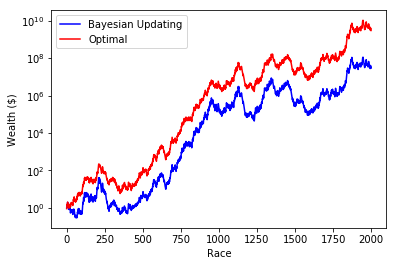

In [47]:
plot_wealth(bayesian_portfolio_history, optimal_portfolio_history, num_races)

### Probability estimates

Since the Bayesian updating portfolio keeps a running estimate of the probabilities $p(i)$, we can plot the final estimates of the portfolio, together with the uncertainty on those estimates. Note that because we'

In [87]:
from scipy.stats import norm

mean = bayesian_portfolio.mean()
std_dev = np.sqrt(dirichlet.var(bayesian_portfolio.concentration_params()))
x = np.linspace(norm.ppf(0.6), norm.ppf(0.8), 100)
pdf = []
for i in range(len(odds)):
    pdf.append(norm.pdf(x, mean[i], std_dev[i]) / 100)

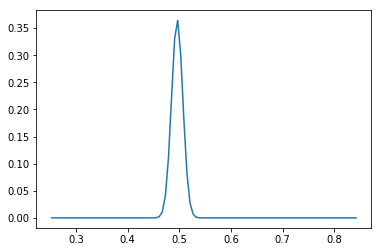

In [92]:
# example: probability of horse 1 winning the race with uncertainty
plt.plot(x, pdf[0])